<a href="https://colab.research.google.com/github/vuchicago/Python/blob/master/MSA_Invest_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
####MOUNT DRIVE
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
###################### INSTALL TENSORFLOW 2.0 ##############################
!pip install tensorflow==2.0


     |████████████████████████████████| 86.3MB 56kB/s 
     |████████████████████████████████| 3.8MB 43.0MB/s 
     |████████████████████████████████| 450kB 43.9MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=e5e24604625a534388466c3e55026faefcde41eed96451fd5076defd8987709e
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorflow 1.15.2
    Uninstalling tensorflow-1.15.2:
      Successfully uninstalled tensorflow-1.15.2


In [5]:
import tensorflow as tf


print(tf.__version__) ###Make sure tensorflow >= version 2.0
!python3 --version ##Latest python

2.0.0
Python 3.6.9


In [6]:
##strategy, tactics, analysis, review (STAR 2024)
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from datetime import datetime as dt

base_dir="/content/gdrive/My Drive/Python/MSA_Invest"
msa_dir=os.path.join(base_dir,"CAGDP11")
grad_boost_img=os.path.join(base_dir,"Gradient_boost_img")
LSTM_img=os.path.join(base_dir,"LSTM_img")
deep_learning_img=os.path.join(base_dir,"Deep_learning_img")
os.chdir(base_dir)
PCA="PCA_Winter_2019-20_State_Forecast.xlsx"

PCA_sheet=pd.ExcelFile(PCA)
PCA_sheet.sheet_names ##List of all the sheets within excel file

#########################################################################################


['Output',
 'Res',
 'West North Central',
 'Iowa',
 'Kansas',
 'Minnesota',
 'Missouri',
 'Nebraska',
 'North Dakota',
 'South Dakota',
 'East North Central',
 'Illinois',
 'Indiana',
 'Michigan',
 'Ohio',
 'Wisconsin',
 'East South Central',
 'Alabama',
 'Kentucky',
 'Mississippi',
 'Tennessee',
 'Middle Atlantic',
 'New Jersey',
 'New York',
 'Pennsylvania',
 'Mountain',
 'Arizona',
 'Colorado',
 'Idaho',
 'Montana',
 'Nevada',
 'New Mexico',
 'Utah',
 'Wyoming',
 'New England',
 'Connecticut',
 'Maine',
 'Massachusetts',
 'New Hampshire',
 'Rhode Island',
 'Vermont',
 'Pacific',
 'California',
 'Hawaii',
 'Oregon',
 'Washington',
 'South Atlantic',
 'Delaware',
 'Florida',
 'Georgia',
 'District of Columbia',
 'Maryland',
 'North Carolina',
 'South Carolina',
 'Virginia',
 'West Virginia',
 'West South Central',
 'Arkansas',
 'Louisiana',
 'Oklahoma',
 'Texas']

In [0]:
sheet_keep=[
 'Iowa',
 'Kansas',
 'Minnesota',
 'Missouri',
 'Nebraska',
 'North Dakota',
 'South Dakota',
 'Illinois',
 'Indiana',
 'Michigan',
 'Ohio',
 'Wisconsin',
 'Alabama',
 'Kentucky',
 'Mississippi',
 'Tennessee',
 'New Jersey',
 'New York',
 'Pennsylvania',
 'Mountain',
 'Arizona',
 'Colorado',
 'Idaho',
 'Montana',
 'Nevada',
 'New Mexico',
 'Utah',
 'Wyoming',
 'New England',
 'Connecticut',
 'Maine',
 'Massachusetts',
 'New Hampshire',
 'Rhode Island',
 'Vermont',
 'California',
 'Hawaii',
 'Oregon',
 'Washington',
 'Delaware',
 'Florida',
 'Georgia',
 'District of Columbia',
 'Maryland',
 'North Carolina',
 'South Carolina',
 'Virginia',
 'West Virginia',
 'Arkansas',
 'Louisiana',
 'Oklahoma',
 'Texas']

In [7]:
idx=0
df_pca=pd.DataFrame()
for states in sheet_keep:
  df=pd.read_excel(PCA,sheet_name=states,header=1)
  keep_indices=[4,7,11,18,21,29,32,36,40,48,51,53,56,61,62,63]
  df=df.iloc[keep_indices,:]
  df=df.T
  df=df.rename(columns=df.iloc[0]).drop(df.index[0])
  df.insert(loc=idx, column='State', value=states)
  df=df.rename(columns={"States":"State","- Unemployment Rate":"Unemployment Rate","Total Portland Cement ":"Total Portland Cement","Cement Per Capita ":"Cement Per Capita"})
  df_pca=pd.concat([df_pca,df],axis=0,sort=True)

df_pca.head()

- Unemployment Rate, %  ... Unemployment Rate (%)
2000                    NaN  ...                   NaN
2001                    NaN  ...             0.0333213
2002                    NaN  ...             0.0399316
2003                    NaN  ...             0.0449228
2004                    NaN  ...             0.0449686

[5 rows x 19 columns]

In [0]:
os.chdir(base_dir)
BED="CAGDP11__ALL_AREAS_2002_2018.csv"
df_bed=pd.read_csv(BED, encoding='latin-1')
column_keep=["MSA","State","Description_fixed", "2002",'2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017',"2018"]
df_bed=df_bed[column_keep][(pd.notna(df_bed["MSA"]))& (df_bed["MSA"]!='0')] ##get rid of NA's from geoname column

df_bed.head()

MSA State  ...   2017   2018
10846  Dover, DE    DE  ...   -0.5    1.2
10847  Dover, DE    DE  ...  -0.66      1
10848  Dover, DE    DE  ...   0.16  -0.11
10849  Dover, DE    DE  ...      0      0
10850  Dover, DE    DE  ...    (D)  -0.15

[5 rows x 20 columns]

In [0]:
df_bed=df_bed.melt(["MSA","State","Description_fixed"],var_name="Year",value_name="Value") ###Turns dataset into a flat file.  Each year column (2002-2018) unpivots into 1 column named 'Year'
df_bed["Value"]=df_bed["Value"].replace('(D)',np.NaN).replace("(NA)",np.nan).replace("(L)",np.nan).replace("--",np.nan).astype(float)
df_bed=df_bed.groupby(["MSA","State","Description_fixed","Year"]).mean().reset_index()
df_bed.head()


MSA State                Description_fixed  Year     Value
0  Abilene, TX    TX  Accommodation and food services  2002 -0.116667
1  Abilene, TX    TX  Accommodation and food services  2003 -0.053333
2  Abilene, TX    TX  Accommodation and food services  2004 -0.136667
3  Abilene, TX    TX  Accommodation and food services  2005 -0.046667
4  Abilene, TX    TX  Accommodation and food services  2006 -0.010000

In [0]:
df_bed_piv=pd.pivot_table(df_bed,index=["MSA","State","Year"],columns="Description_fixed",values="Value",aggfunc=np.mean) #Re-pivots data where the description columns creates multiple columns bbased on grouping
df_bed_piv.head()

Description_fixed       Accommodation and food services  ...  Wholesale trade
MSA         State Year                                   ...                 
Abilene, TX TX    2002                        -0.116667  ...         0.383333
                  2003                        -0.053333  ...         0.583333
                  2004                        -0.136667  ...         0.976667
                  2005                        -0.046667  ...        -0.503333
                  2006                        -0.010000  ...         0.536667

[5 rows x 34 columns]

In [0]:
df_bed_piv.to_csv("df_bed_piv.csv")
df_pca.to_csv("df_pca.csv")


In [0]:
####################################################################################
import pandas as pd
import numpy as np

var_bed=  ['Accommodation and food services', #####BUREAU OF ECONOMIC DEVELOPMENT DATA
          'Administrative and support and waste management and remediation services',
          'Agriculture, forestry, fishing and hunting',
          'All industry total (percent change)',
          'Arts, entertainment, and recreation',
          'Arts, entertainment, recreation, accommodation, and food services',
          'Construction', 
          'Durable goods manufacturing', 
          'Educational services',
          'Educational services, health care, and social assistance',
          'Finance and insurance',
          'Finance, insurance, real estate, rental, and leasing',
          'Government and government enterprises',
          'Health care and social assistance', 
          'Information',
          'Management of companies and enterprises', 
          'Manufacturing',
          'Manufacturing and information',
          'Mining, quarrying, and oil and gas extraction',
          'Natural resources and mining', 
          'Nondurable goods manufacturing',
          'Other services (except government and government enterprises)',
          'Private goods-producing industries', 
          'Private industries',
          'Private services-providing industries',
          'Professional and business services',
          'Professional, scientific, and technical services',
          'Real estate and rental and leasing', 
          'Retail trade', 'Trade',
          'Transportation and utilities', 
          'Transportation and warehousing',
          'Utilities', 
          'Wholesale trade']

df_bed_draft=pd.read_csv("df_bed_piv.csv")
df_bed_draft=df_bed_draft.rename(columns={'Private goods-producing industries 2/':'Private goods-producing industries','Private services-providing industries 3/':'Private services-providing industries'})
df_bed_draft.head()

for var in var_bed:
  df_bed_draft[var]=df_bed_draft[var].replace('(D)',np.NaN).replace("(NA)",np.nan).replace("(L)",np.nan).replace("--",np.nan)*1 #replaces char str with numeric or nan
  df_bed_draft[var]=df_bed_draft[var].apply(lambda x: np.nan if isinstance(np.float(x),str) else x)*1 ###if np.float(x) is a string then returns np.nan, else it returns x
  df_bed_draft[var]=df_bed_draft[var].ffill() ##Forward fills data if NA
  df_bed_draft[var]=df_bed_draft[var].bfill()
  df_bed_draft[var]=df_bed_draft[var].astype(float)
  df_bed_draft[var]=df_bed_draft[var]*1.0

In [104]:
################################################ START HERE

State_acro={
'Colorado':'CO',
'Idaho':'ID',
'Montana':'MT',
'New Mexico':'NM',
'Nevada':'NV',
'Oregon':'OR',
'Utah':'UT',
'Washington':'WA',
'Wyoming':'WY',
'Iowa':'IA',
'Illinois':'IL',
'Kansas':'KS',
'Minnesota':'MN',
'Missouri':'MO',
'North Dakota':'ND',
'Nebraska':'NE',
'South Dakota':'SD',
'Wisconsin':'WI',
'Indiana':'IN',
'Kentucky':'KY',
'Michigan':'MI',
'Ohio':'OH',
'West Virginia':'WV',
'Connecticut':'CT',
'District of Columbia':'DC',
'Delaware':'DE',
'Massachusetts':'MA',
'Maryland':'MD',
'Maine':'ME',
'New Hampshire':'NH',
'New Jersey':'NJ',
'New York':'NY',
'Pennsylvania':'PA',
'Rhode Island':'RI',
'Virginia':'VA',
'Vermont':'VT',
'Alabama':'AL',
'Arkansas':'AR',
'Florida':'FL',
'Georgia':'GA',
'Louisiana':'LA',
'Mississippi':'MS',
'North Carolina':'NC',
'South Carolina':'SC',
'Tennessee':'TN',
'Texas':'TX',
'Oklahoma':'OK'}	


df_pca=pd.read_csv("df_pca.csv")
df_pca["State_acro"]=df_pca["State"].map(State_acro)
#df_pca=df_pca.rename(columns={"Unnamed: 0":"Year"})
df_pca.columns
normal_col=["Agricultural Cement","Commercial Cement Consumption","Commercial Construction Spending","Government Cement Consumption","Gross State Product, Real ($2012, Millions)",
            "Multi Family Permits","Public Construction Spending","Residential Cement Consumption","Residential Construction Spending","Single Family Permits","Total Construction Spending",
            "Total Portland Cement"]

keep_col=["Year",'Agricultural Cement',
       'Cement Intensity (MT/Mil$2009)', 'Cement Per Capita','Cement Per GSP (MT/Mil$2009)',
       'Commercial Cement Consumption', 'Commercial Construction Spending',
       'Government Cement Consumption',
       'Gross State Product, Real ($2012, Millions)', 'Multi Family Permits',
       'Public Construction Spending', 'Residential Cement Consumption',
       'Residential Construction Spending', 'Single Family Permits', 
       'Total Construction Spending', 'Total Portland Cement',
       'Unemployment Rate (%)', 'State_acro']
df_pca=df_pca[keep_col]
df_pca=df_pca.rename(columns={"State_acro":"State"})
df_pca

Year Agricultural Cement  ... Unemployment Rate (%)  State
0     2000  147149.40318896345  ...                   NaN     IA
1     2001   79004.84769859431  ...              0.033321     IA
2     2002   115873.1995722488  ...              0.039932     IA
3     2003    185728.200635495  ...              0.044923     IA
4     2004  182451.22810265736  ...              0.044969     IA
...    ...                 ...  ...                   ...    ...
1295  2020   302290.1672969495  ...              0.034889     TX
1296  2021   302759.1416197087  ...              0.038185     TX
1297  2022   303499.5032569127  ...              0.042061     TX
1298  2023   303728.1253356687  ...              0.040975     TX
1299  2024  304871.26961635443  ...              0.039876     TX

[1300 rows x 18 columns]

In [0]:
df_dodge=pd.read_excel("Dodge Data_v2.xlsx",sheet_name="Dodge Data")
df_dodge=df_dodge[(df_dodge["Geo (MSA)"]!="Unassigned") & (df_dodge["Geo (MSA)"]!=0)]
dodge_keep=["Geo (MSA)","State","Time Period","Measure"]
df_dodge=df_dodge[dodge_keep]
df_dodge=df_dodge.rename(columns={"Time Period":"Year"})


In [147]:
#####################MERGE PCA DATA WITH DODGE DATA
df_pca_dodge=pd.merge(df_dodge,df_pca,left_on=["State","Year"],right_on=["State","Year"],how='inner')
df_pca_dodge=df_pca_dodge.rename(columns={"Measure":"Dodge Starts"})
df_pca_dodge=df_pca_dodge.sort_values(["Geo (MSA)","Year"])

df_pca_dodge.head()

Geo (MSA) State  ...  Total Portland Cement  Unemployment Rate (%)
450  Abilene, TX    TX  ...            14620068.10               0.049025
425  Abilene, TX    TX  ...            14879227.70               0.042755
400  Abilene, TX    TX  ...            14237866.54               0.048247
375  Abilene, TX    TX  ...             9591863.70               0.075658
350  Abilene, TX    TX  ...            10110556.51               0.081293

[5 rows x 20 columns]

In [0]:
var_pca=['Dodge Starts', 'Agricultural Cement',
       'Cement Intensity (MT/Mil$2009)', 'Cement Per Capita',
       'Cement Per GSP (MT/Mil$2009)', 'Commercial Cement Consumption',
       'Commercial Construction Spending', 'Government Cement Consumption',
       'Gross State Product, Real ($2012, Millions)', 'Multi Family Permits',
       'Public Construction Spending', 'Residential Cement Consumption',
       'Residential Construction Spending', 'Single Family Permits',
       'Total Construction Spending', 'Total Portland Cement',
       'Unemployment Rate (%)']
for var in var_pca:
  df_pca_dodge[var]=df_pca_dodge[var].replace('(D)',np.NaN).replace("(NA)",np.nan).replace("(L)",np.nan).replace("--",np.nan)*1 #replaces char str with numeric or nan
  df_pca_dodge[var]=df_pca_dodge[var].apply(lambda x: np.nan if isinstance(np.float(x),str) else x)*1 ###if np.float(x) is a string then returns np.nan, else it returns x
  df_pca_dodge[var]=df_pca_dodge[var].ffill() ##Forward fills data if NA
  df_pca_dodge[var]=df_pca_dodge[var].bfill()
  df_pca_dodge[var]=df_pca_dodge[var].astype(float)
  df_pca_dodge[var]=df_pca_dodge[var]*1.0



In [149]:
################################################ WE WILL NORMALIZE THESE INDEPENDENT VARIABLES 
col_norm=['Dodge Starts', 'Agricultural Cement',
       'Cement Intensity (MT/Mil$2009)',
       'Commercial Cement Consumption',
       'Commercial Construction Spending', 'Government Cement Consumption',
       'Gross State Product, Real ($2012, Millions)', 'Multi Family Permits',
       'Public Construction Spending', 'Residential Cement Consumption',
       'Residential Construction Spending', 'Single Family Permits',
       'Total Construction Spending', 'Total Portland Cement']
for col in col_norm:
  df_pca_dodge[col]=(df_pca_dodge[col].subtract(df_pca_dodge[col].mean())).divide(df_pca_dodge[col].std()) ##SUBTRACT MEAN THEN DIVIDE BY STD

df_pca_dodge.to_csv("df_pca_dodge.csv",index=False)
df_pca_dodge.head()

Geo (MSA) State  ...  Total Portland Cement  Unemployment Rate (%)
450  Abilene, TX    TX  ...               3.219914               0.049025
425  Abilene, TX    TX  ...               3.291765               0.042755
400  Abilene, TX    TX  ...               3.113950               0.048247
375  Abilene, TX    TX  ...               1.825860               0.075658
350  Abilene, TX    TX  ...               1.969666               0.081293

[5 rows x 20 columns]

In [0]:
df_complete=pd.merge(df_pca_dodge,df_bed_draft,how='inner',left_on=["Geo (MSA)","Year"],right_on=["MSA","Year"])
df_complete=df_complete.rename(columns={"State_x":"State"})
df_complete=df_complete.drop(["State_y"],axis=1)
df_final=df_complete[df_complete["Year"].astype(float)<2019]


df_complete_pca_test=df_pca_dodge[df_pca_dodge["Year"].astype(float)>2018]
df_complete_pca_test.to_csv("df_complete_pca_test.csv")


In [0]:
df_complete.to_csv("df_complete.csv",index=False)



In [0]:
###### KEEP THESE COLUMNS FROM DF_COMPLETE
var_pca= ["Dodge Starts",
          'Cement Intensity (MT/Mil$2009)', ####PCA DATA
          'Cement Per Capita',
          'Cement Per GSP (MT/Mil$2009)',
          'Commercial Cement Consumption', 
          'Commercial Construction Spending',
          'Government Cement Consumption',
          'Gross State Product, Real ($2012, Millions)', 
          'Multi Family Permits',
          'Public Construction Spending', 
          'Residential Cement Consumption',
          'Residential Construction Spending', 
          'Single Family Permits', 
          'Total Construction Spending', 
          'Total Portland Cement',
          'Unemployment Rate (%)'
          ] 

var_bed=  ['Accommodation and food services', #####BUREAU OF ECONOMIC DEVELOPMENT DATA
          'Administrative and support and waste management and remediation services',
          'Agriculture, forestry, fishing and hunting',
          'All industry total (percent change)',
          'Arts, entertainment, and recreation',
          'Arts, entertainment, recreation, accommodation, and food services',
          'Construction', 
          'Durable goods manufacturing', 
          'Educational services',
          'Educational services, health care, and social assistance',
          'Finance and insurance',
          'Finance, insurance, real estate, rental, and leasing',
          'Government and government enterprises',
          'Health care and social assistance', 
          'Information',
          'Management of companies and enterprises', 
          'Manufacturing',
          'Manufacturing and information',
          'Mining, quarrying, and oil and gas extraction',
          'Natural resources and mining', 
          'Nondurable goods manufacturing',
          'Other services (except government and government enterprises)',
          'Private goods-producing industries', 
          'Private industries',
          'Private services-providing industries',
          'Professional and business services',
          'Professional, scientific, and technical services',
          'Real estate and rental and leasing', 
          'Retail trade', 'Trade',
          'Transportation and utilities', 
          'Transportation and warehousing',
          'Utilities', 
          'Wholesale trade']
var_keep=var_pca+var_bed

In [38]:
#########################################################DON'T RUN 
var_keep_complete=["MSA","Year"]+var_keep
df_final=df_final[var_keep_complete]
for var in var_keep:
  df_final[var]=df_final[var].replace('(D)',np.NaN).replace("(NA)",np.nan).replace("(L)",np.nan).replace("--",np.nan)*1 #replaces char str with numeric or nan
  df_final[var]=df_final[var].apply(lambda x: np.nan if isinstance(np.float(x),str) else x)*1 ###if np.float(x) is a string then returns np.nan, else it returns x
  df_final[var]=df_final[var].ffill() ##Forward fills data if NA
  df_final[var]=df_final[var].bfill()
  df_final[var]=df_final[var].astype(float)
  df_final[var]=df_final[var]*1.0
  
df_final=df_final.replace('(D)',np.nan)

df_final.columns

Index(['MSA', 'Year', 'Dodge Starts', 'Cement Intensity (MT/Mil$2009)',
       'Cement Per Capita', 'Cement Per GSP (MT/Mil$2009)',
       'Commercial Cement Consumption', 'Commercial Construction Spending',
       'Government Cement Consumption',
       'Gross State Product, Real ($2012, Millions)', 'Multi Family Permits',
       'Public Construction Spending', 'Residential Cement Consumption',
       'Residential Construction Spending', 'Single Family Permits',
       'Total Construction Spending', 'Total Portland Cement',
       'Unemployment Rate (%)', 'Accommodation and food services',
       'Administrative and support and waste management and remediation services',
       'Agriculture, forestry, fishing and hunting',
       'All industry total (percent change)',
       'Arts, entertainment, and recreation',
       'Arts, entertainment, recreation, accommodation, and food services',
       'Construction', 'Durable goods manufacturing', 'Educational services',
       'Educational 

In [0]:
df_final.to_csv("df_final.csv",index=False)

In [0]:

df_complete_pca_test=pd.read_csv("df_complete_pca_test.csv")
df_final=pd.read_csv("df_final.csv")


In [40]:
df_complete_pca_test

Geo (MSA)  ... Unemployment Rate (%)
13                          Abilene, TX  ...              0.035333
14                          Abilene, TX  ...              0.034889
15                          Abilene, TX  ...              0.038185
16                          Abilene, TX  ...              0.042061
17                          Abilene, TX  ...              0.040975
...                                 ...  ...                   ...
6531  Youngstown-Warren-Boardman, OH-PA  ...              0.038062
6532  Youngstown-Warren-Boardman, OH-PA  ...              0.040901
6533  Youngstown-Warren-Boardman, OH-PA  ...              0.045375
6534  Youngstown-Warren-Boardman, OH-PA  ...              0.044132
6535  Youngstown-Warren-Boardman, OH-PA  ...              0.000000

[2064 rows x 20 columns]

In [22]:
################################# CREATE TRAINING AND VALIDATION DATASET
df_final_rand=df_final.sample(frac=1,random_state=3) ###Samples data with same random state
df_train=df_final_rand[:np.int(.8*len(df_final_rand))]
df_val=df_final_rand[np.int(.8*len(df_final_rand)):]
print("Train has {} samples; val has {} samples".format(len(df_train),len(df_val)))



#################################  CREATE TEST DATASET 
df_pca_test=df_complete_pca_test[var_pca]
for var in var_pca:
  df_pca_test[var]=df_pca_test[var].replace('g',np.NaN).replace("(NA)",np.nan).replace("(L)",np.nan).replace("--",np.nan)*1 #replaces char str with numeric or nan
  df_pca_test[var]=df_pca_test[var].apply(lambda x: np.nan if isinstance(np.float(x),str) else x)*1 ###if np.float(x) is a string then returns np.nan, else it returns x
  df_pca_test[var]=df_pca_test[var].ffill() ##Forward fills data if NA
  df_pca_test[var]=df_pca_test[var].bfill()

df_pca_test=df_pca_test.astype(float) ###CREATE PREDICTIONS


Train has 3276 samples; val has 819 samples


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



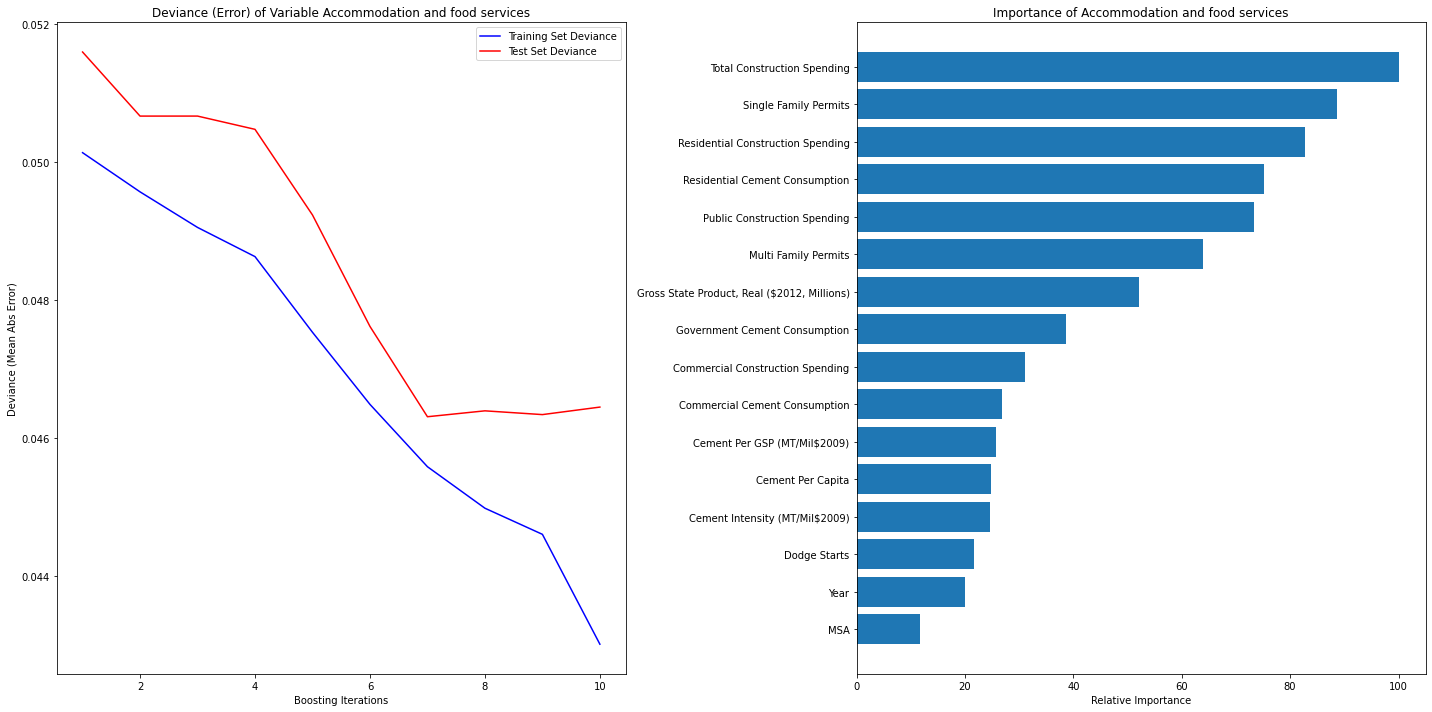

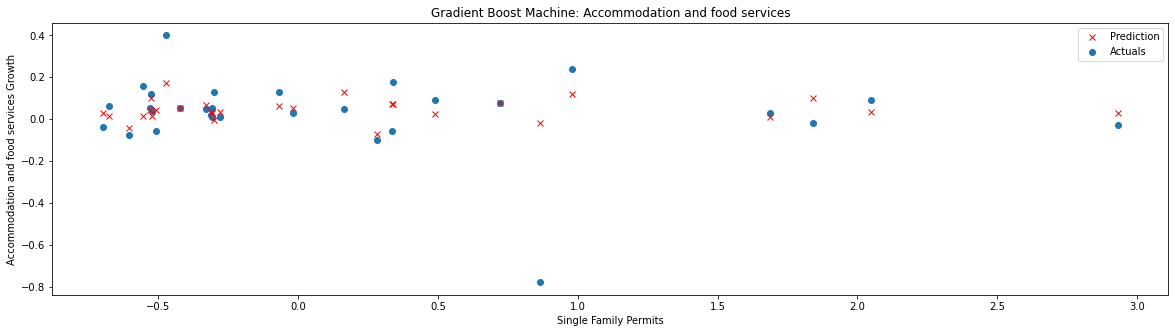

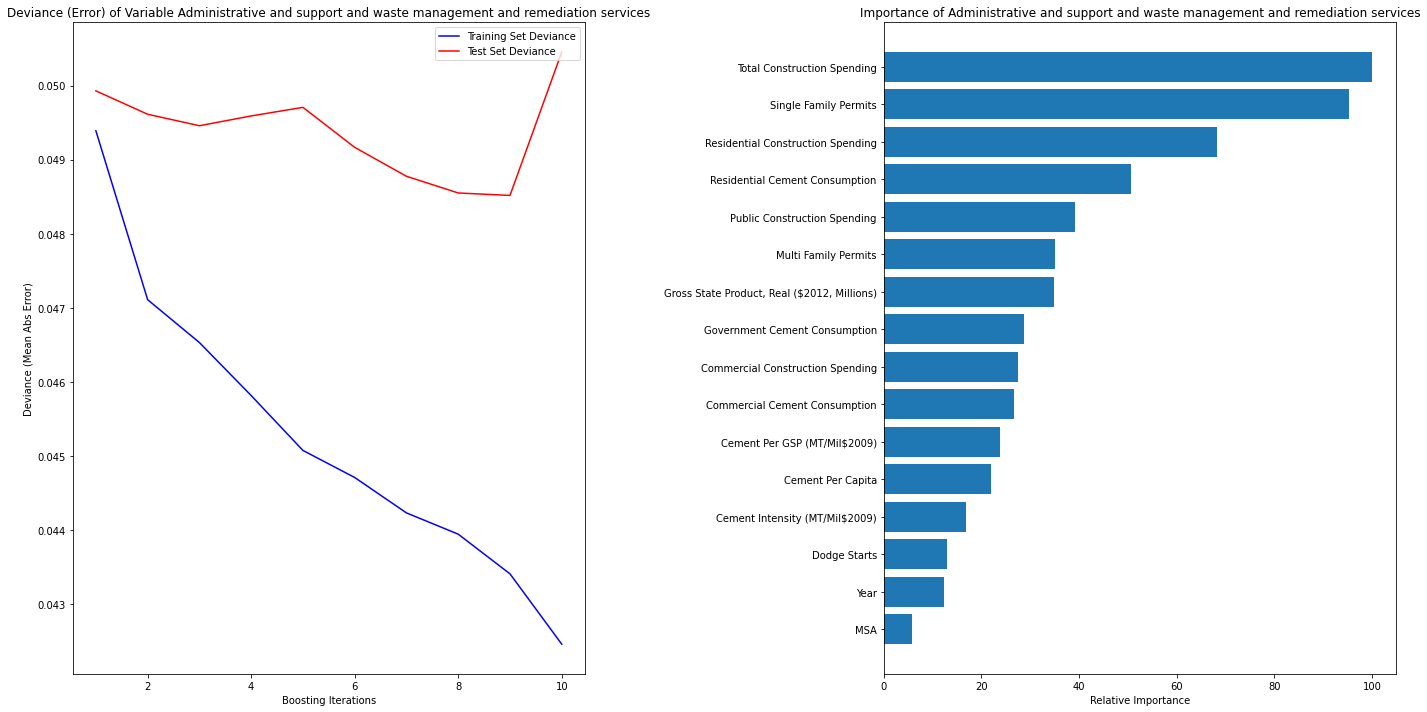

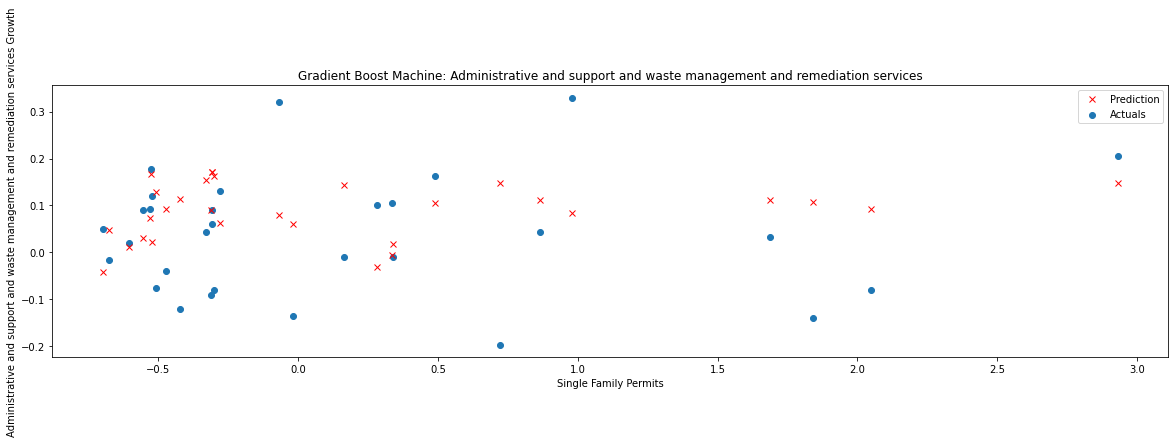

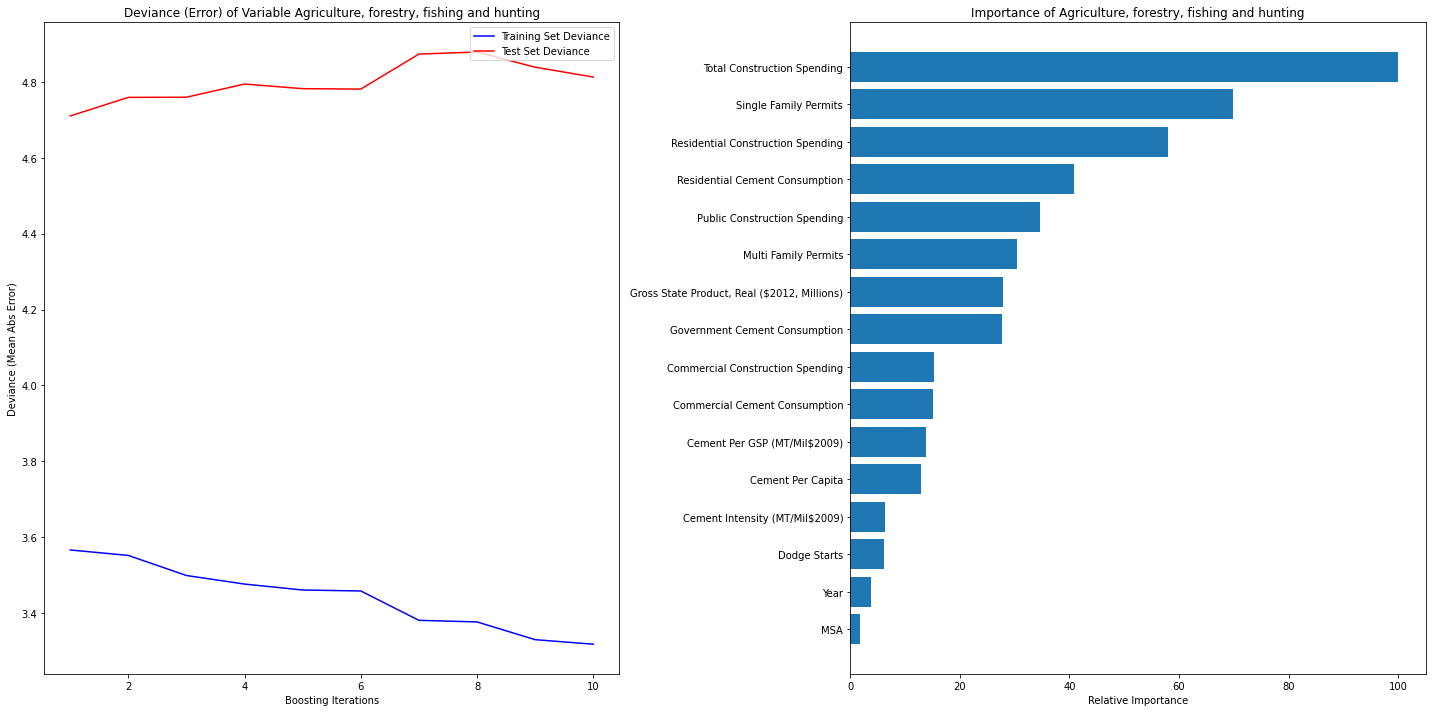

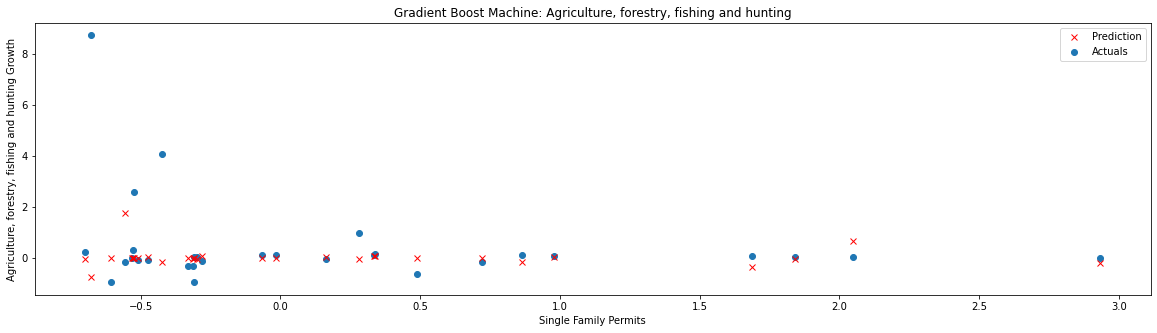

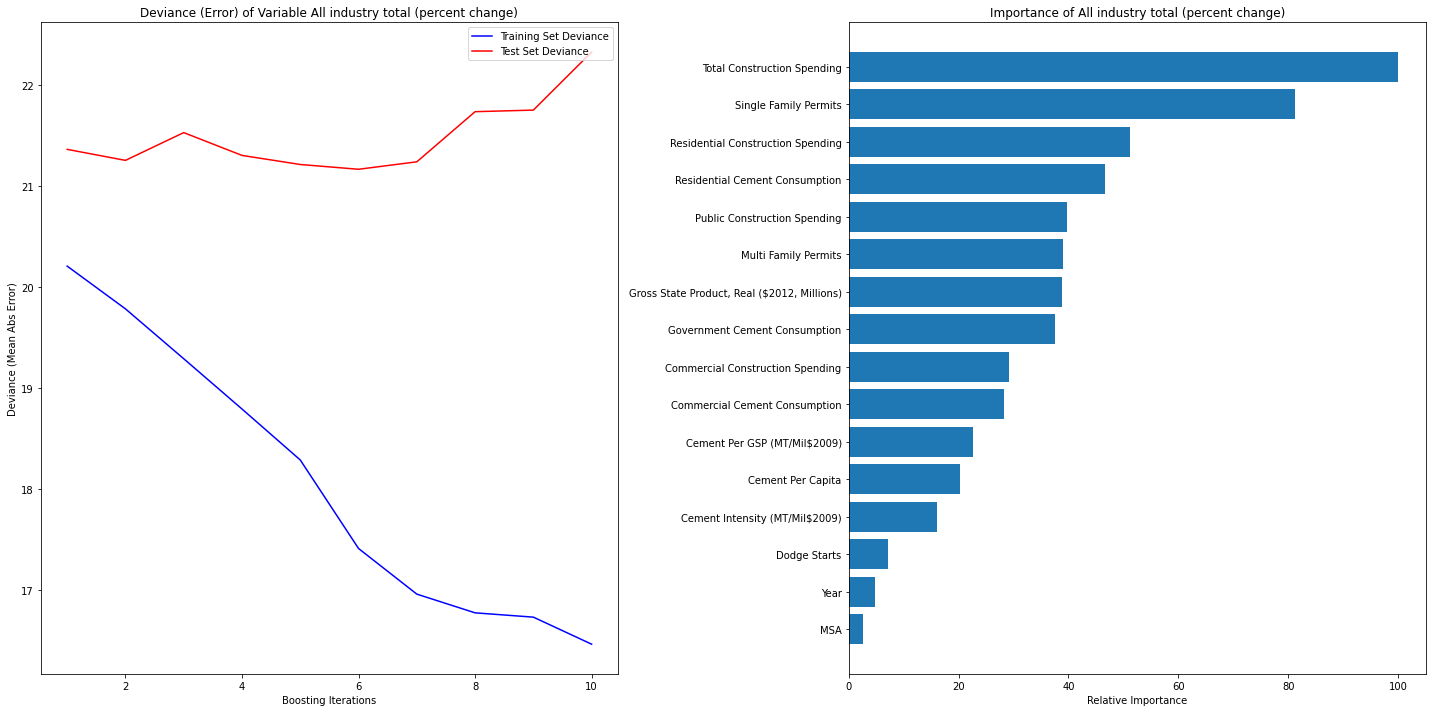

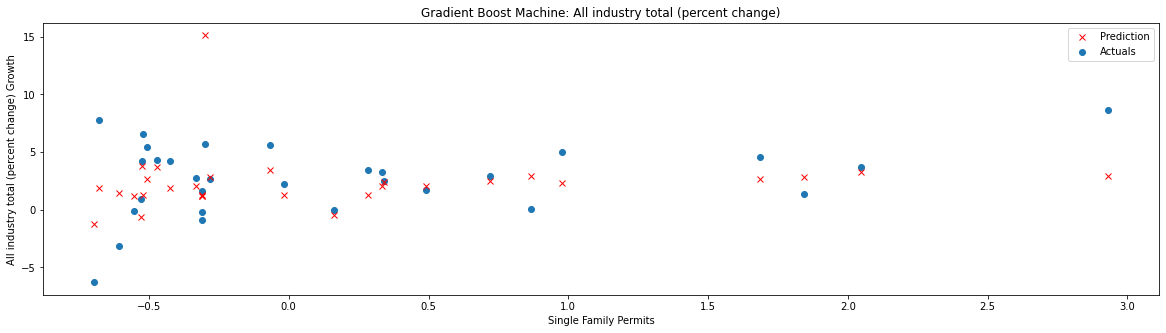

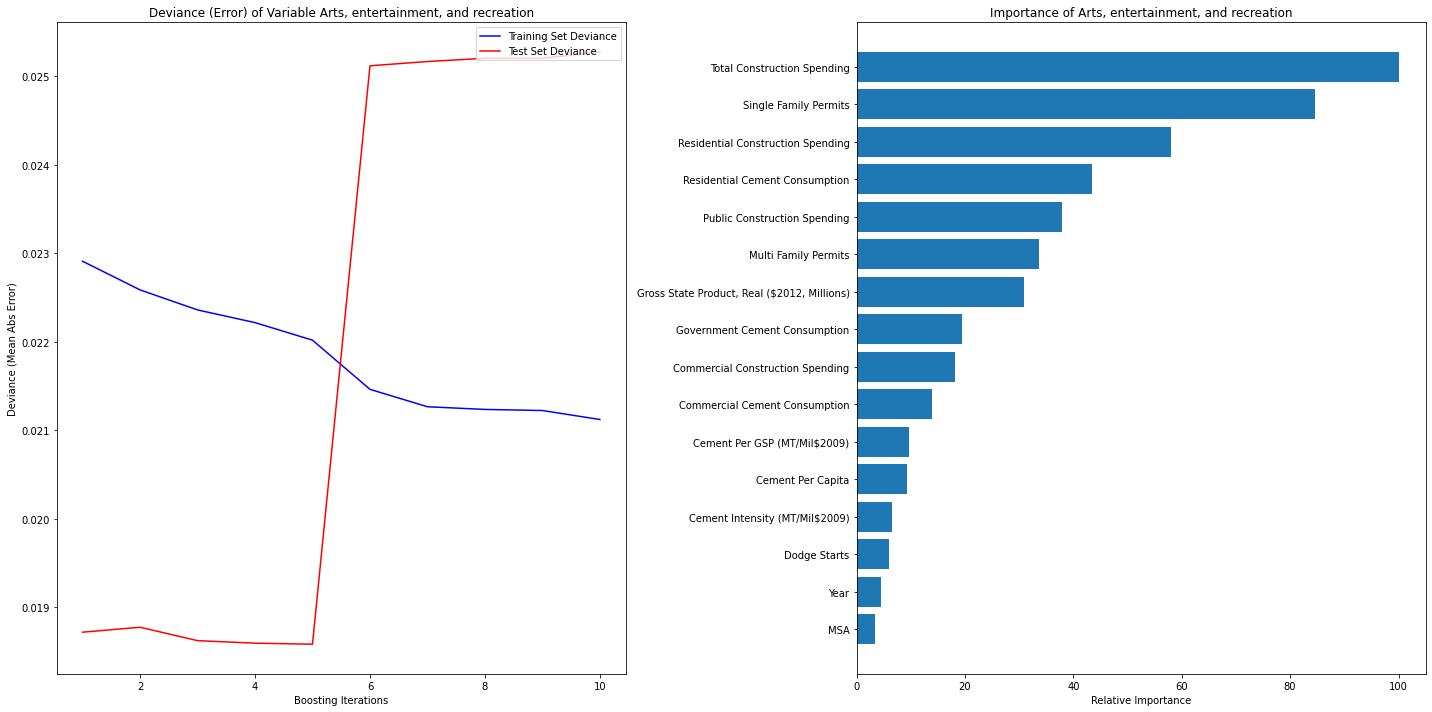

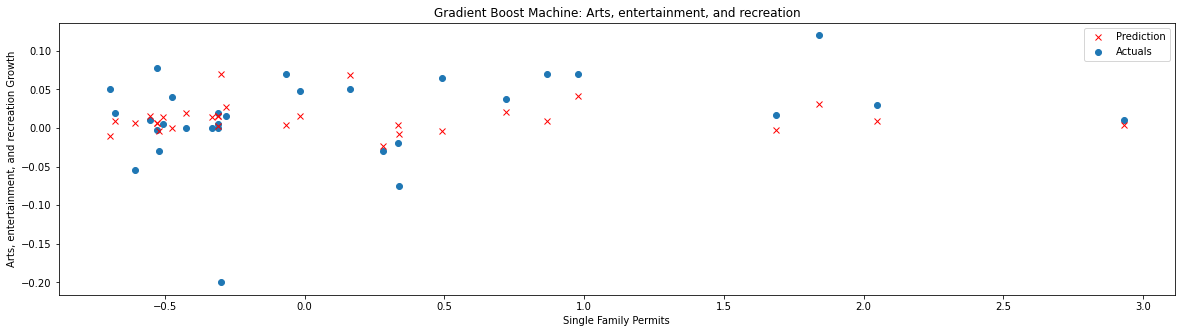

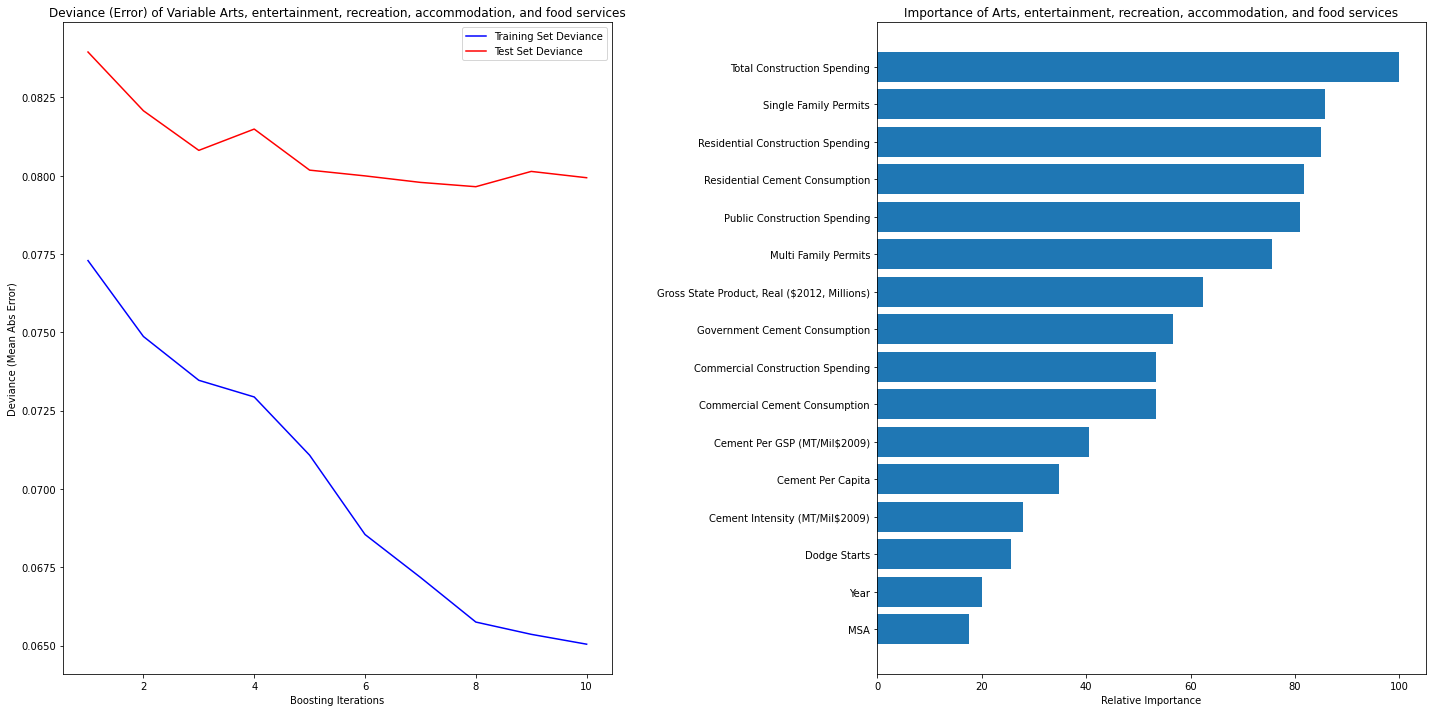

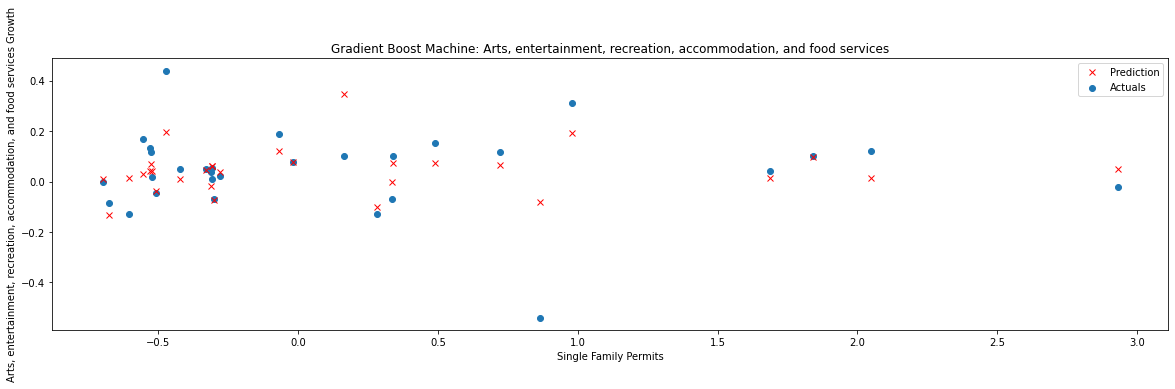

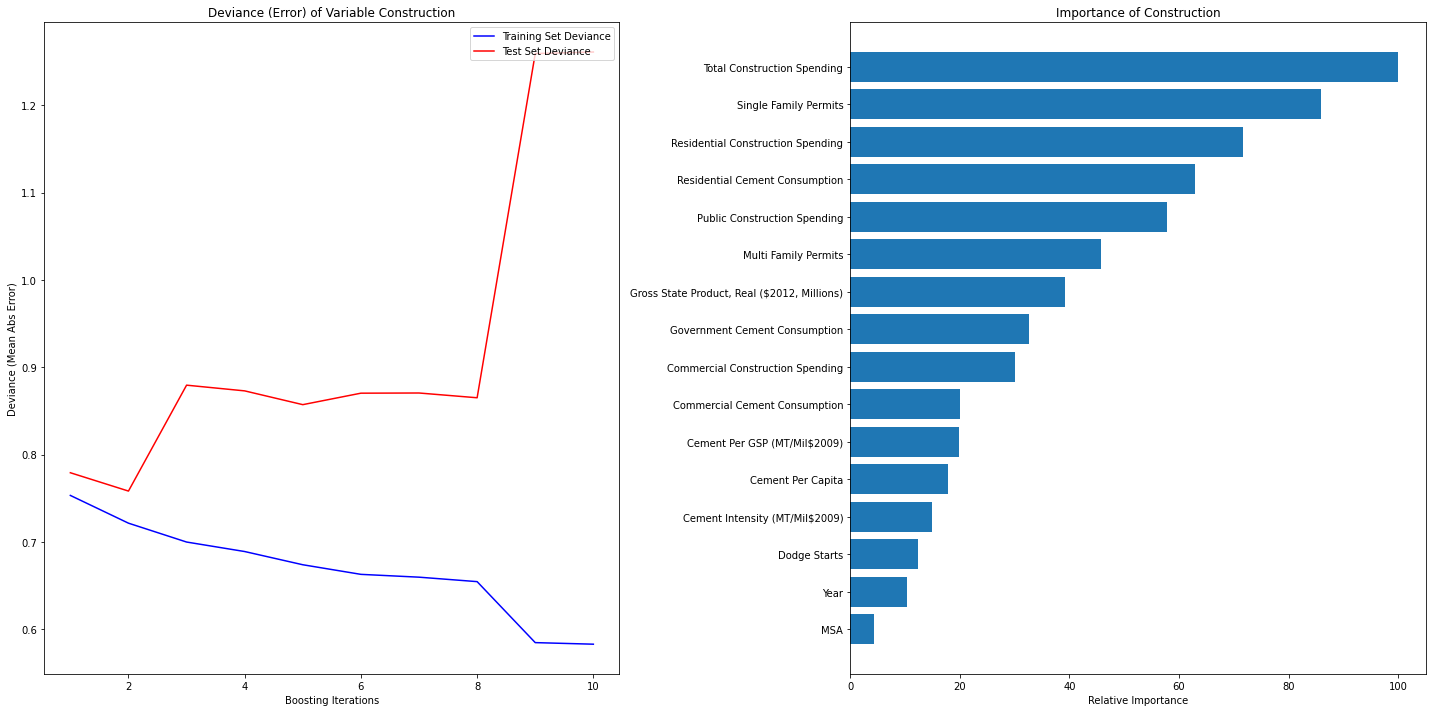

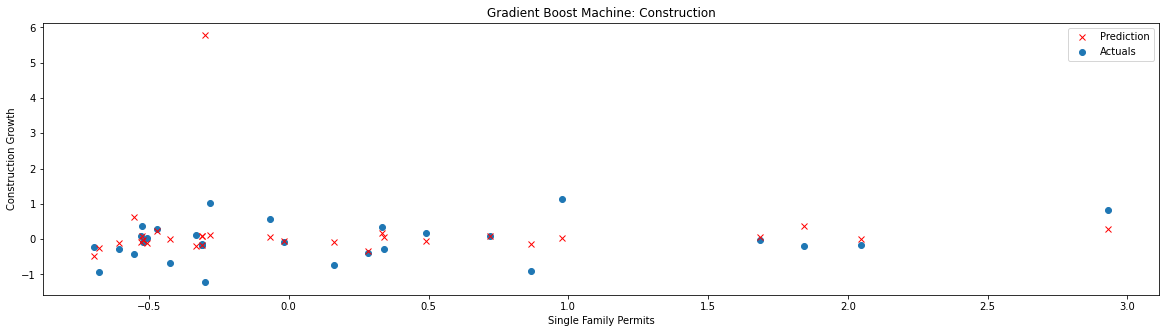

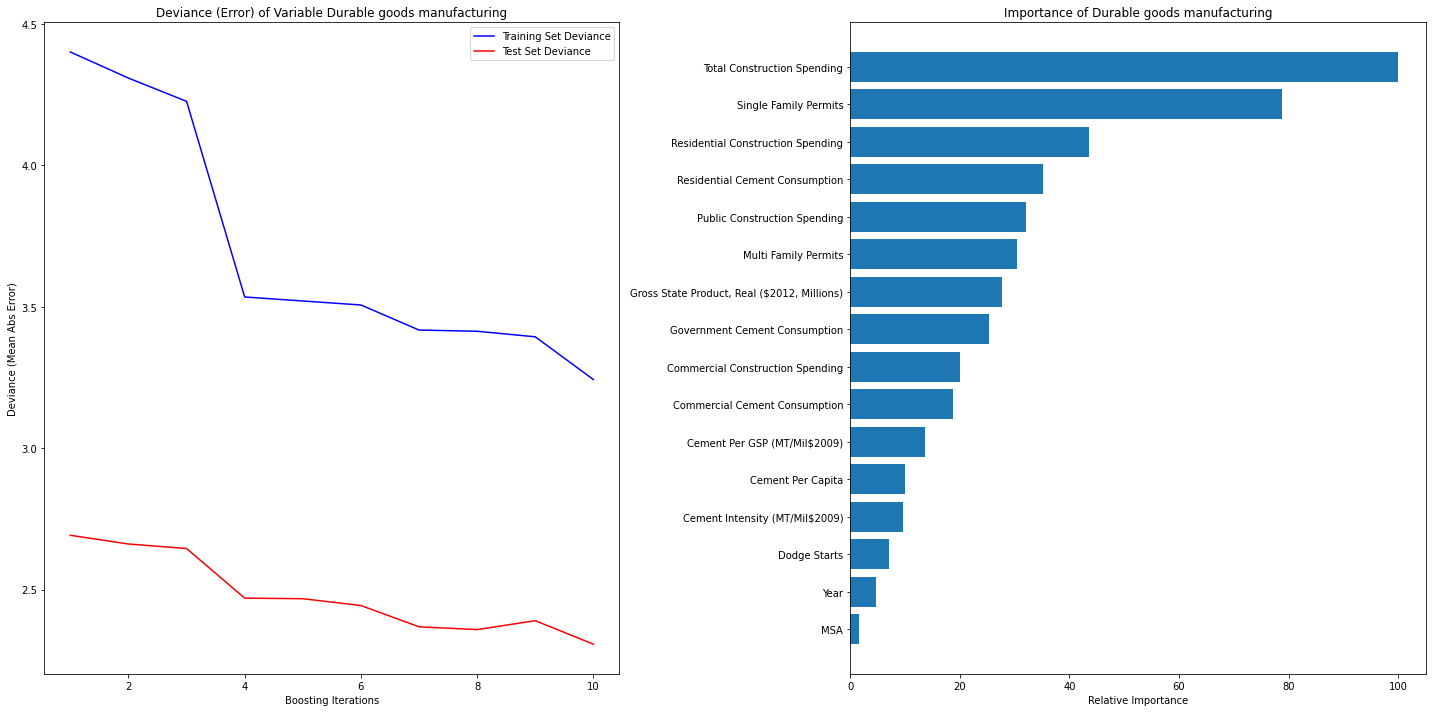

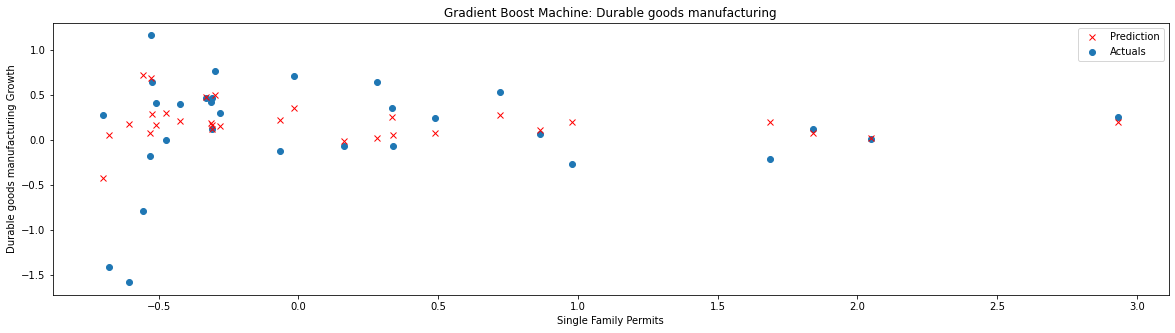

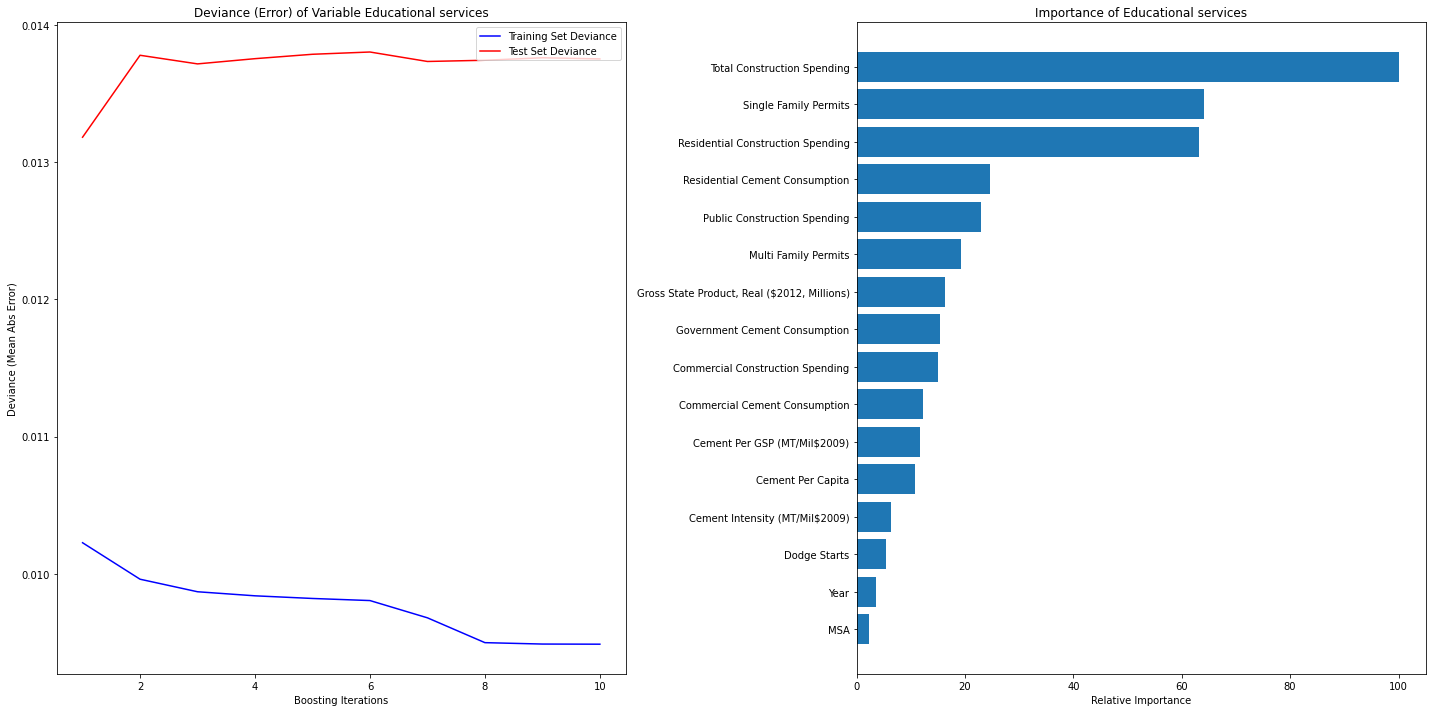

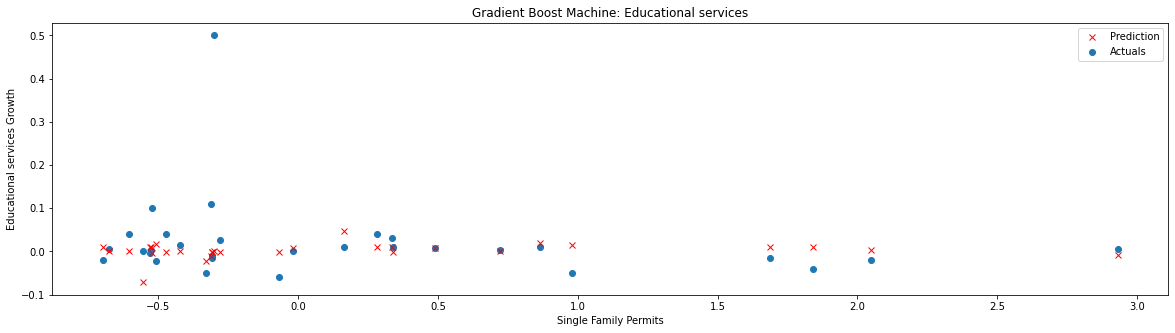

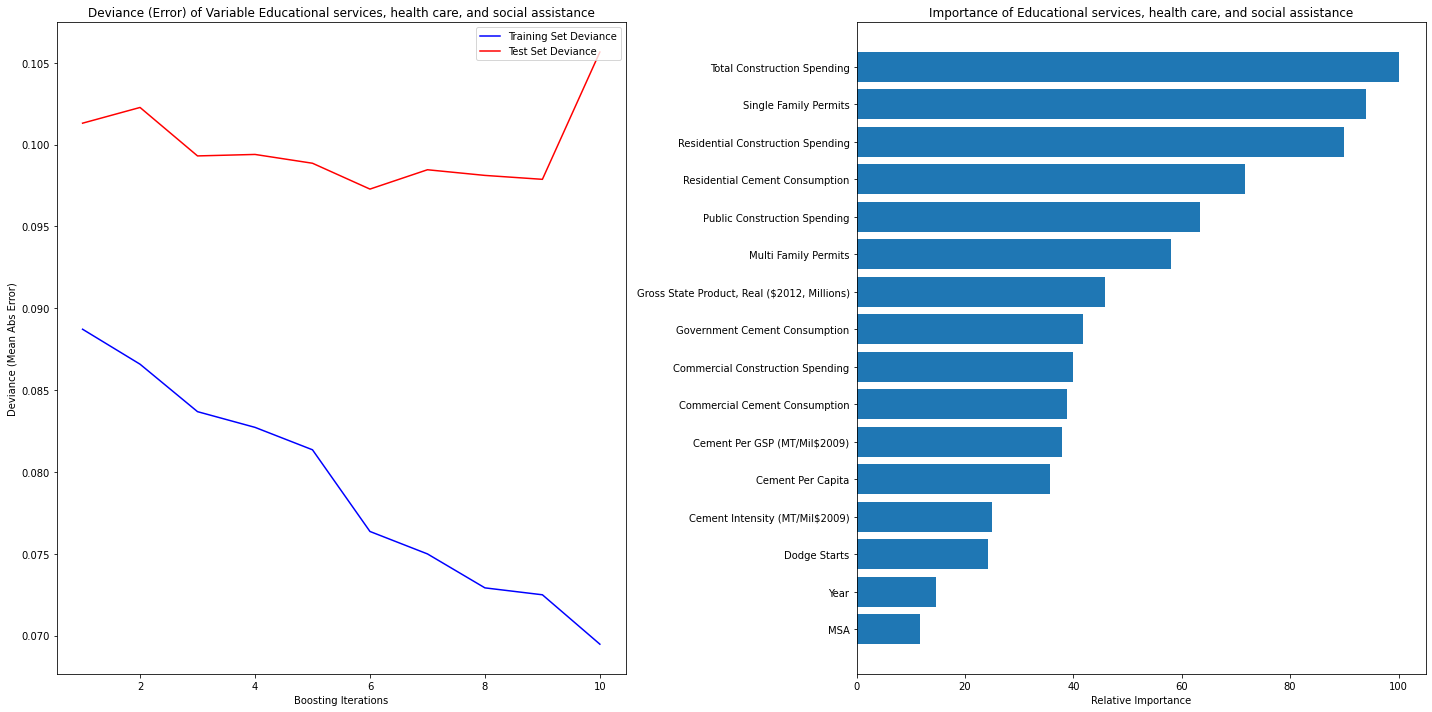

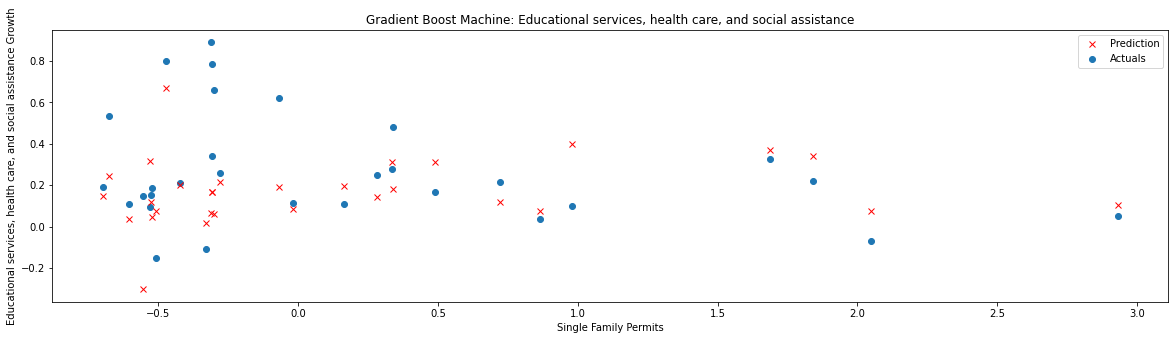

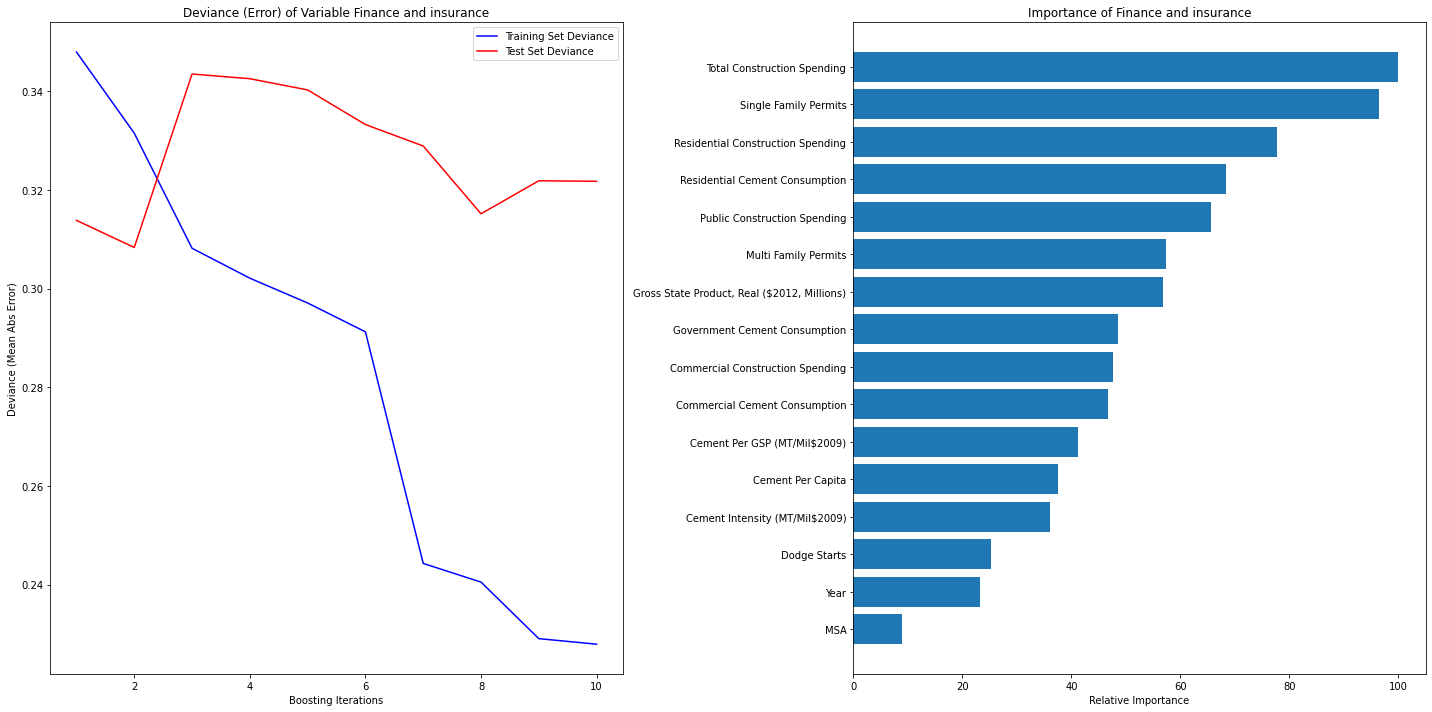

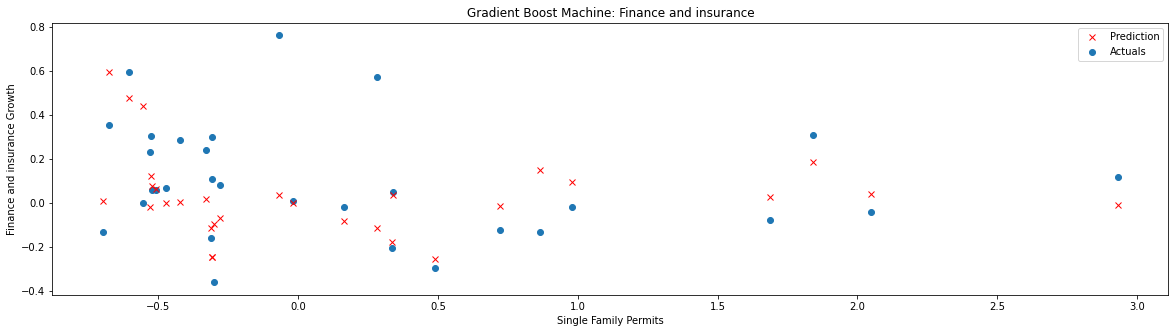

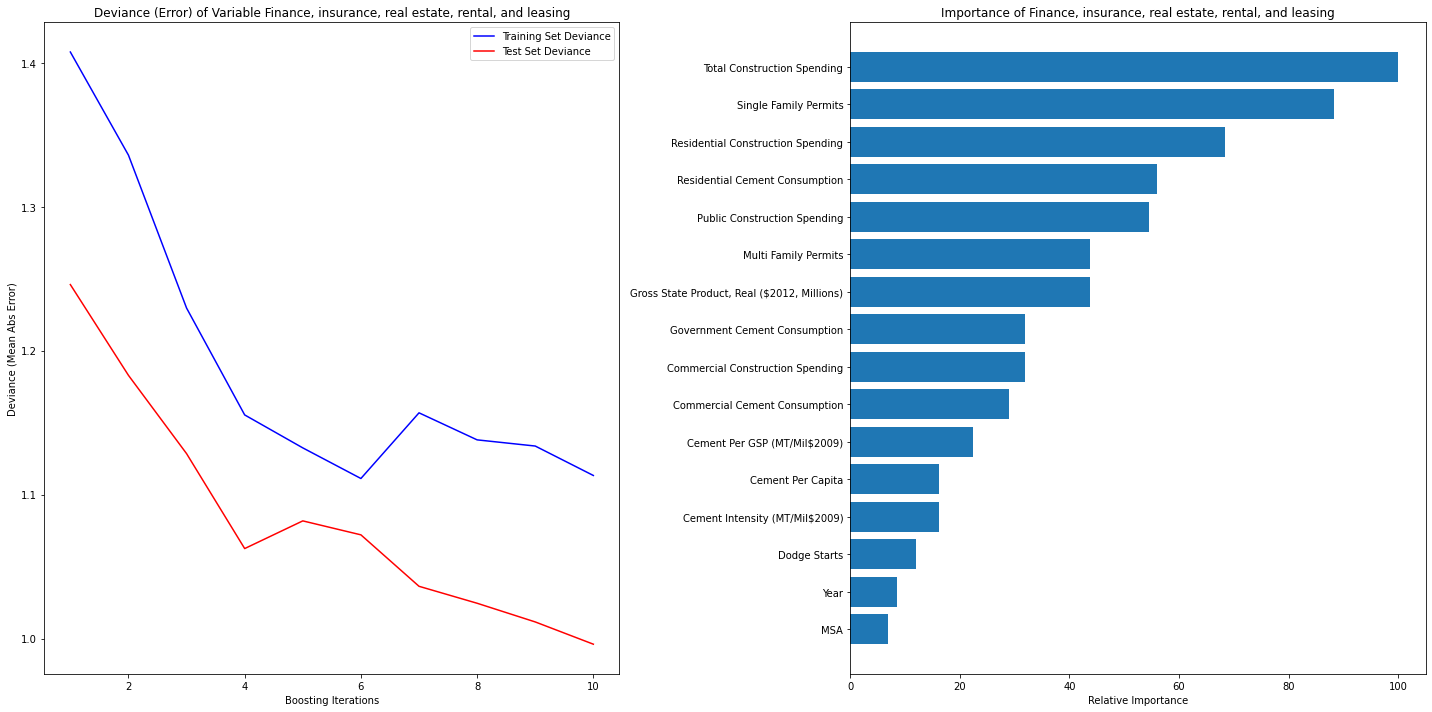

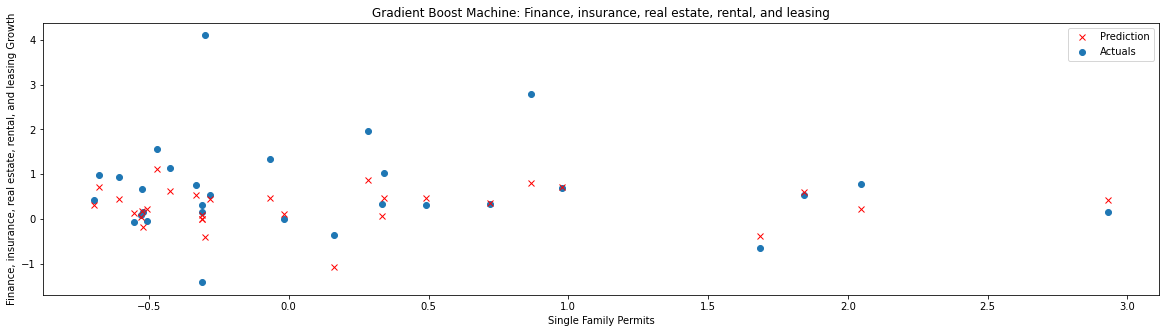

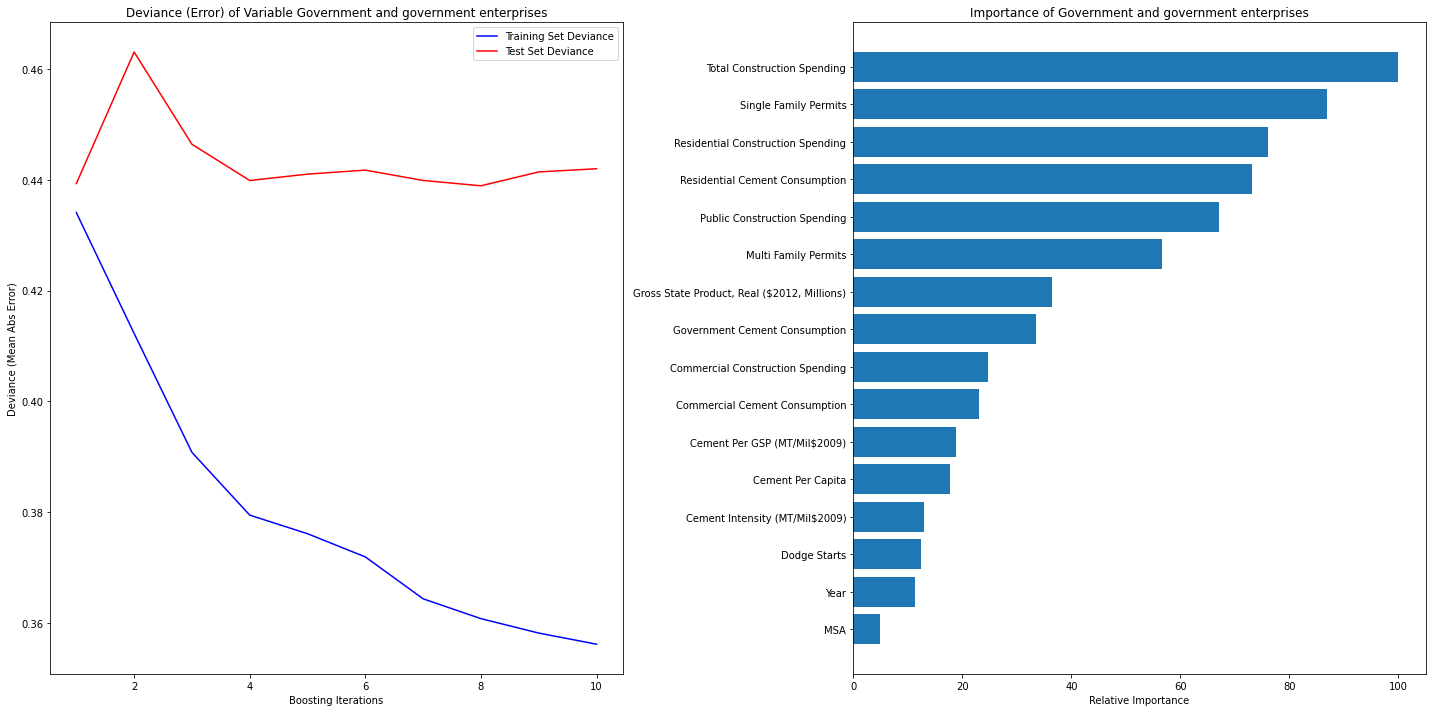

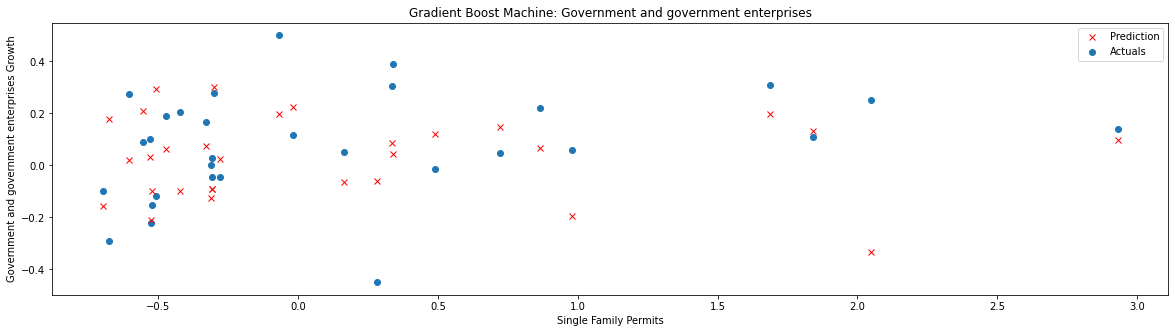

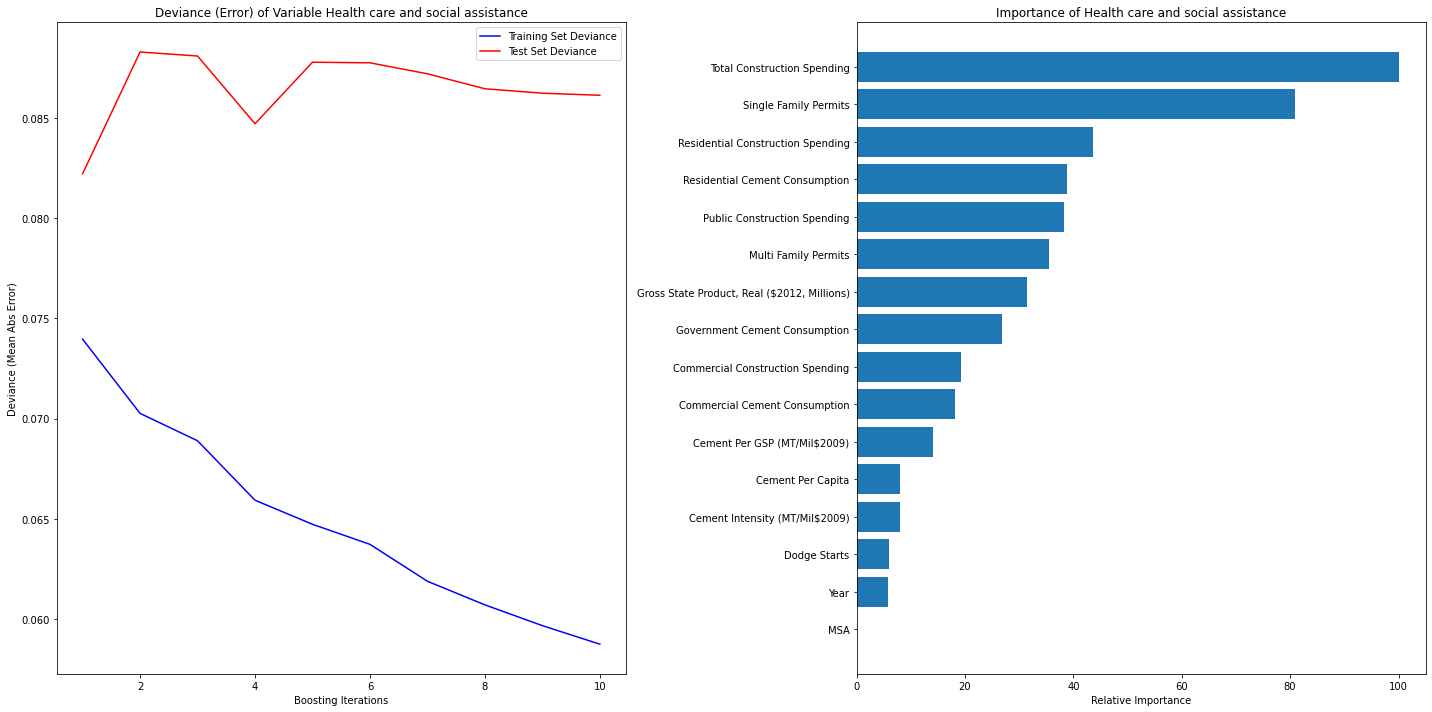

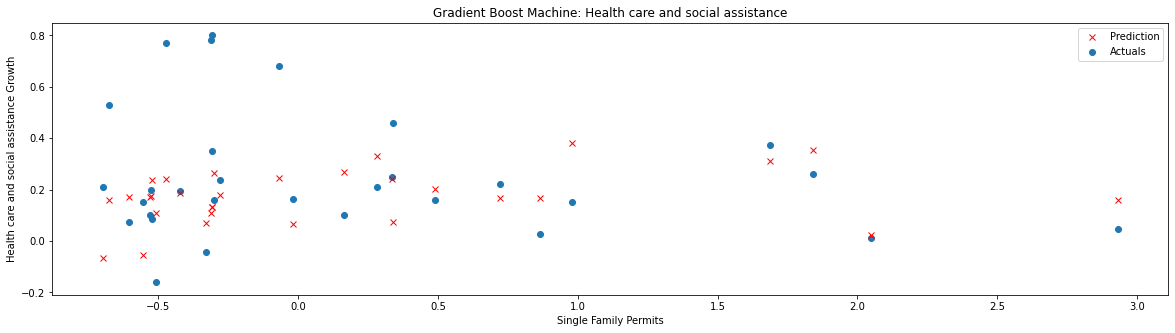

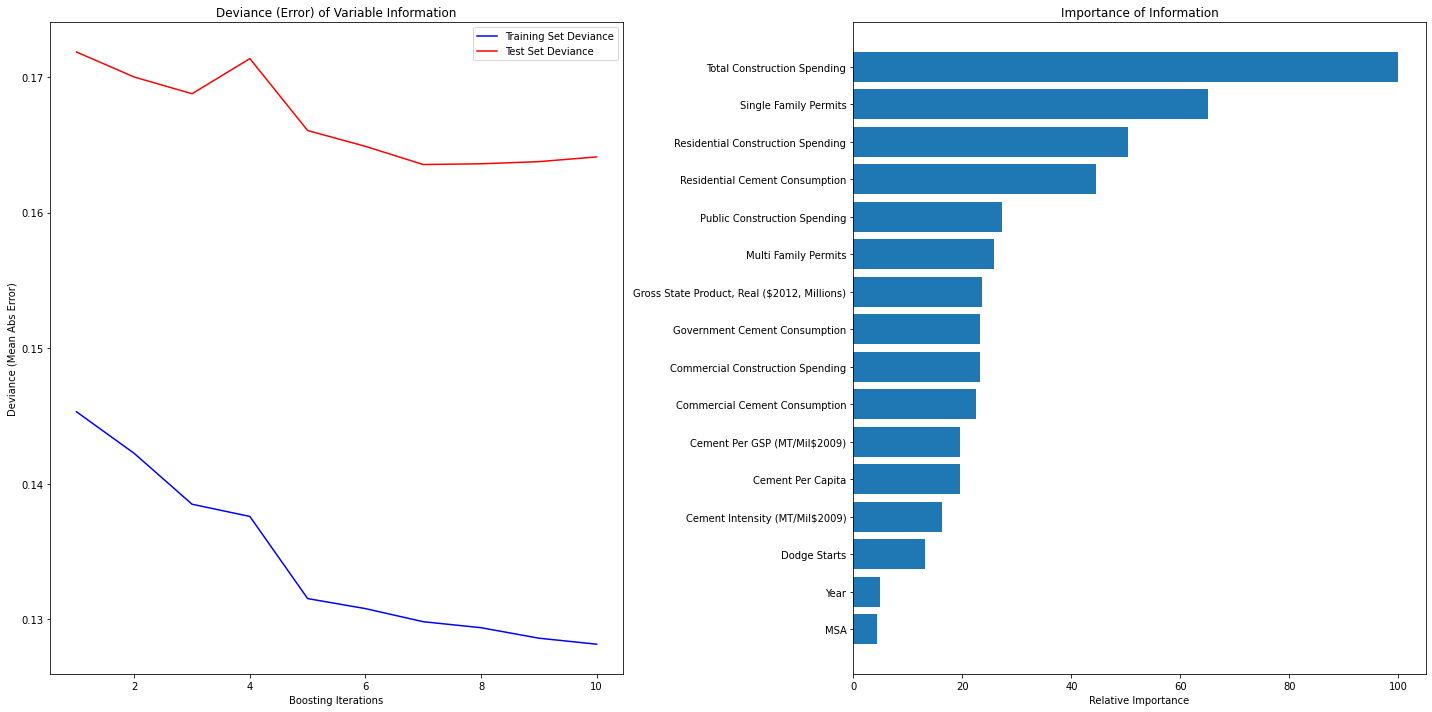

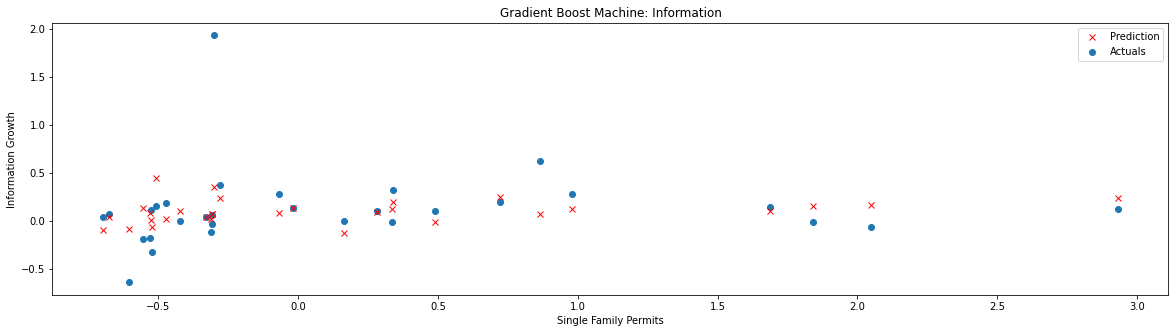

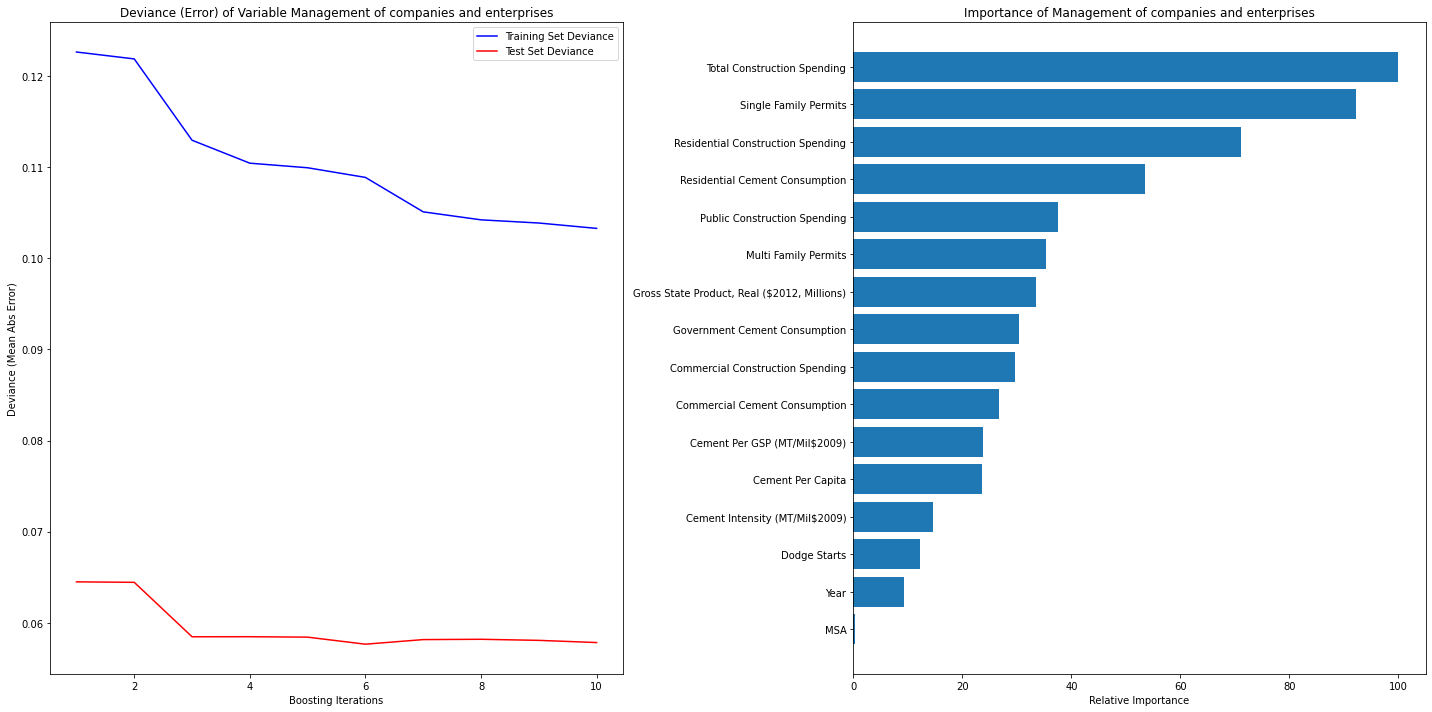

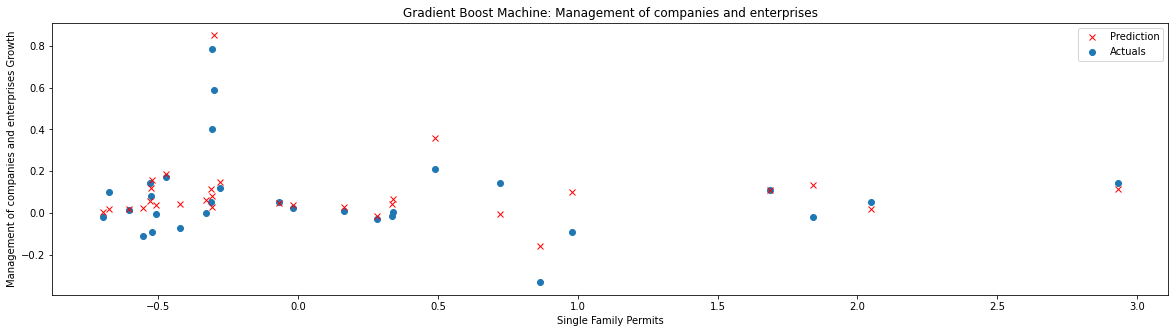

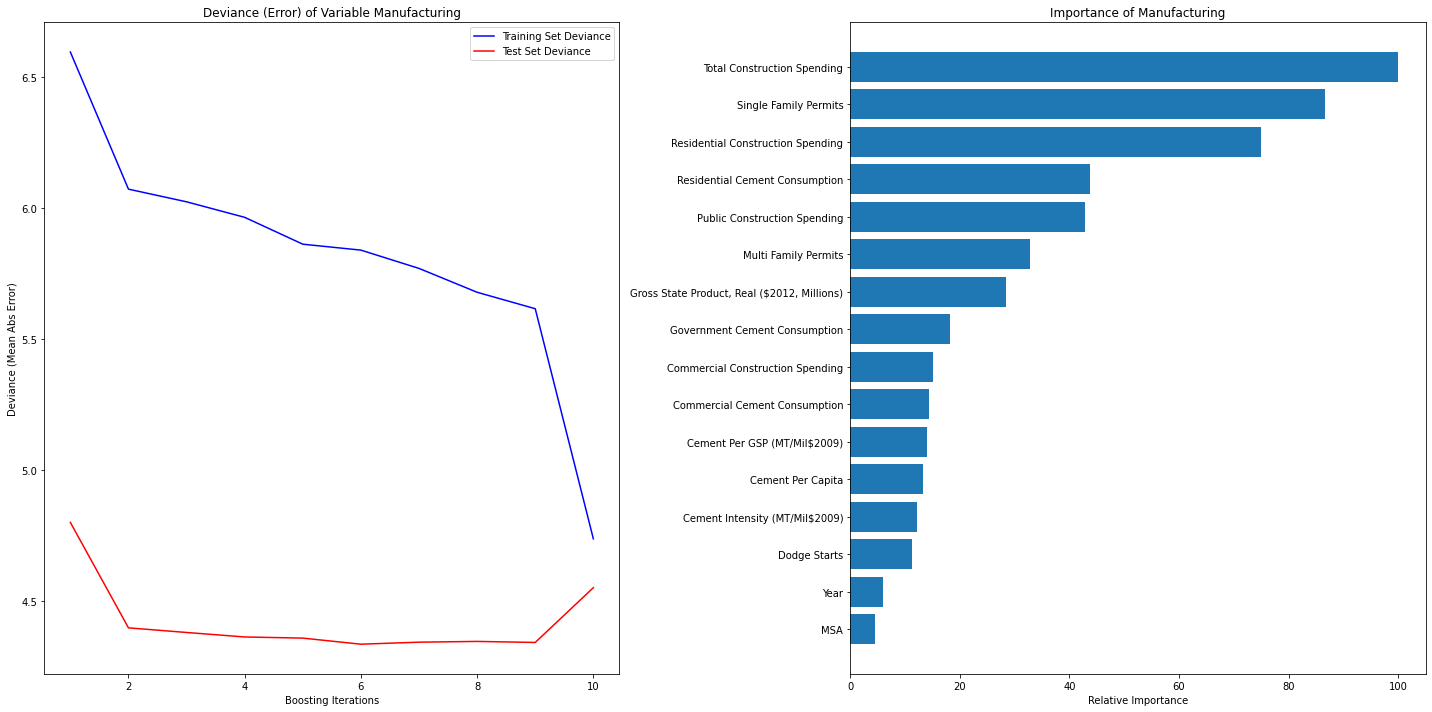

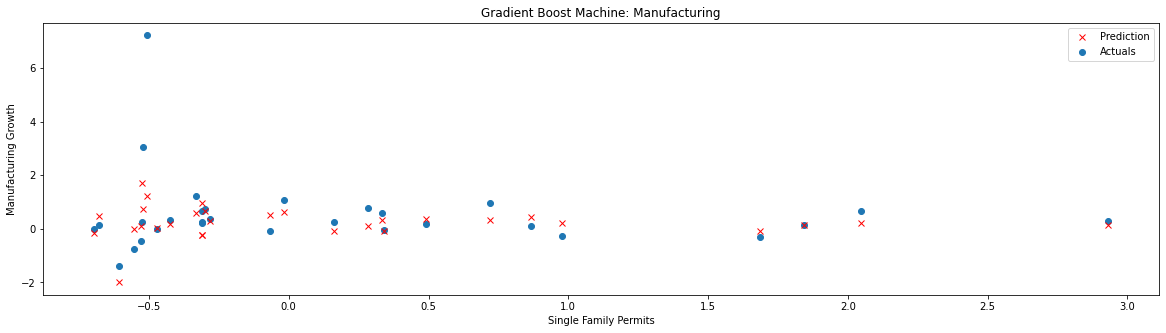

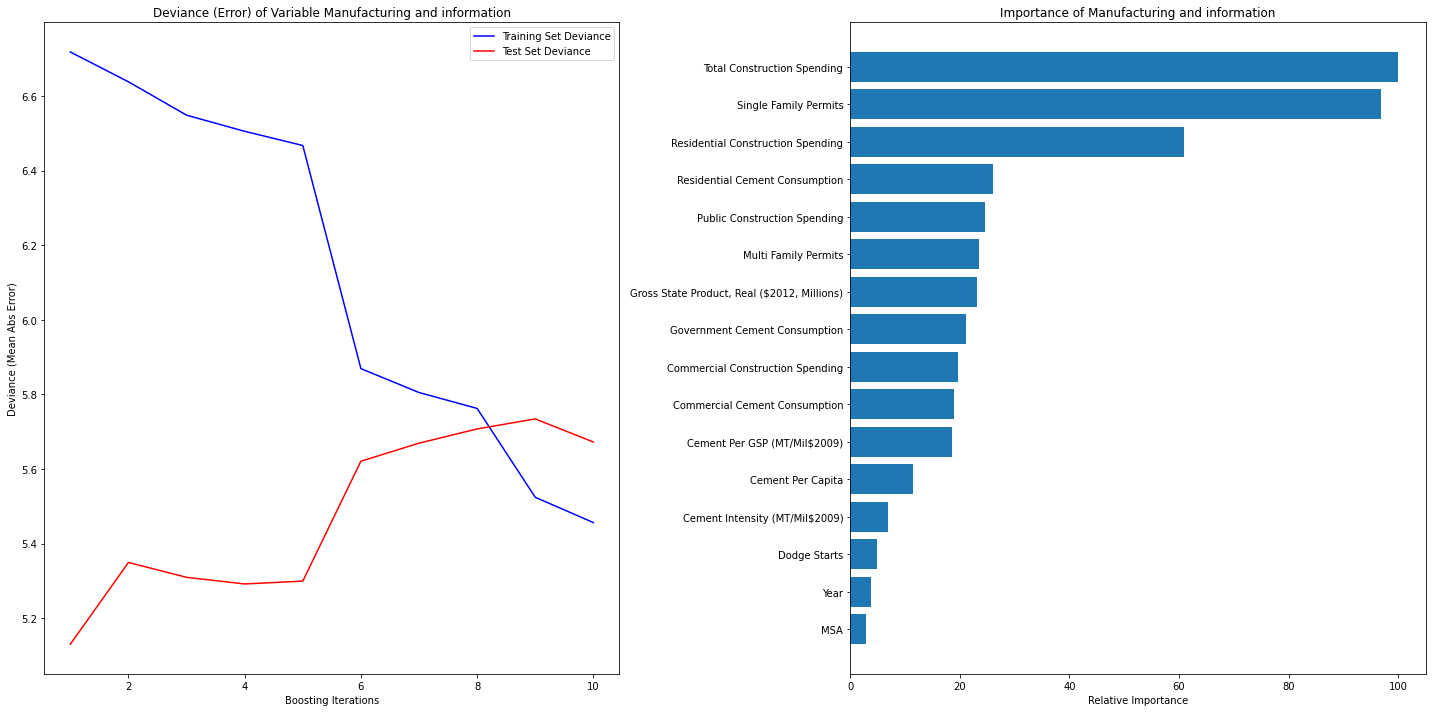

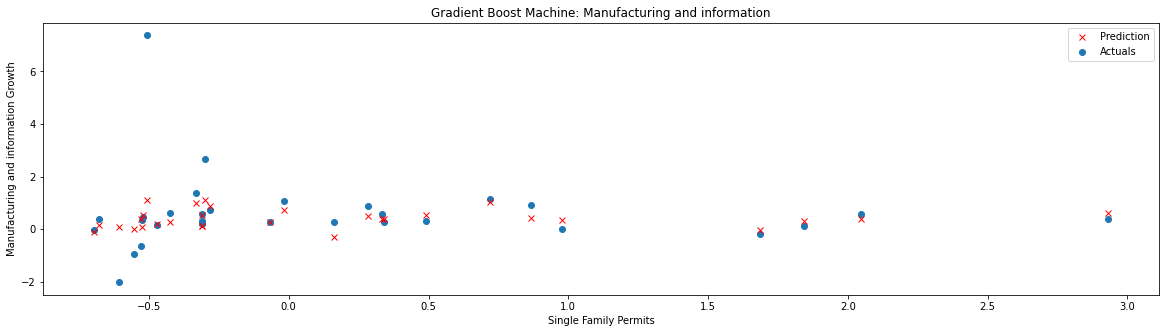

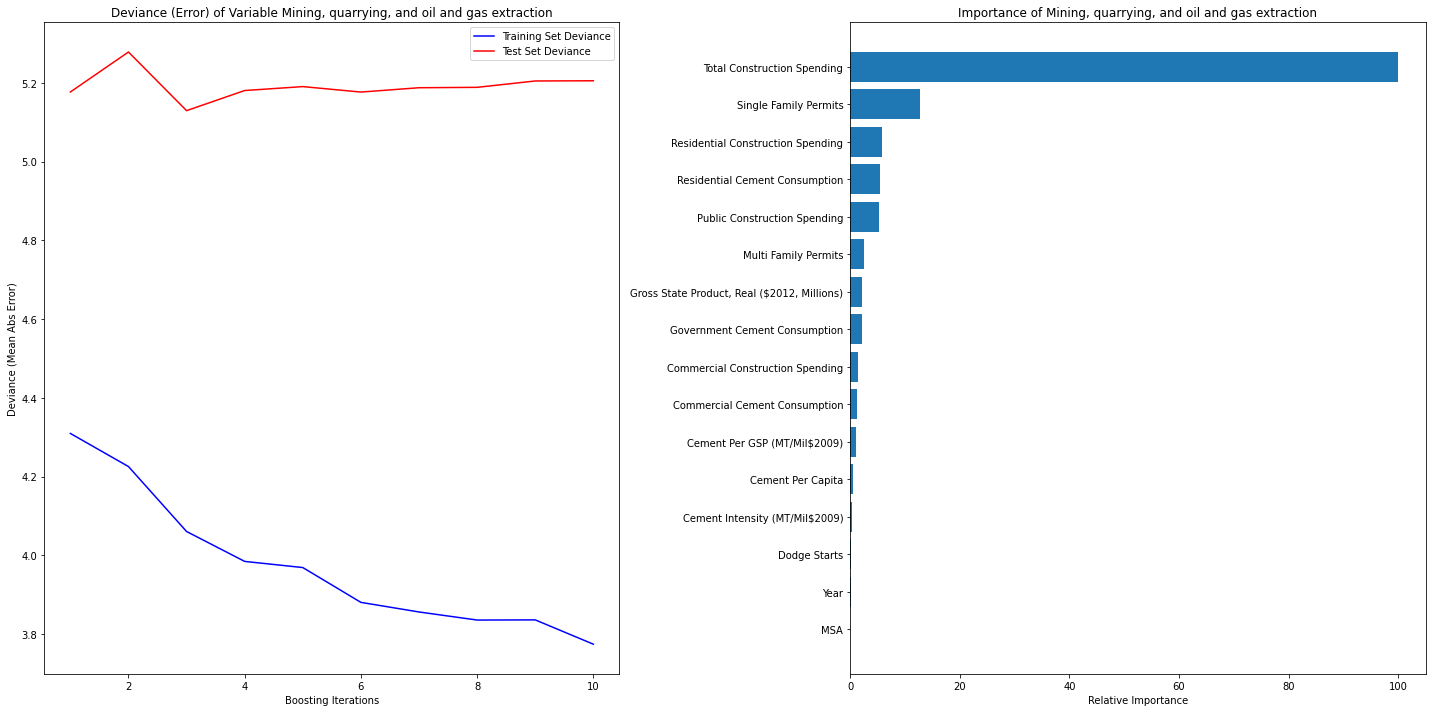

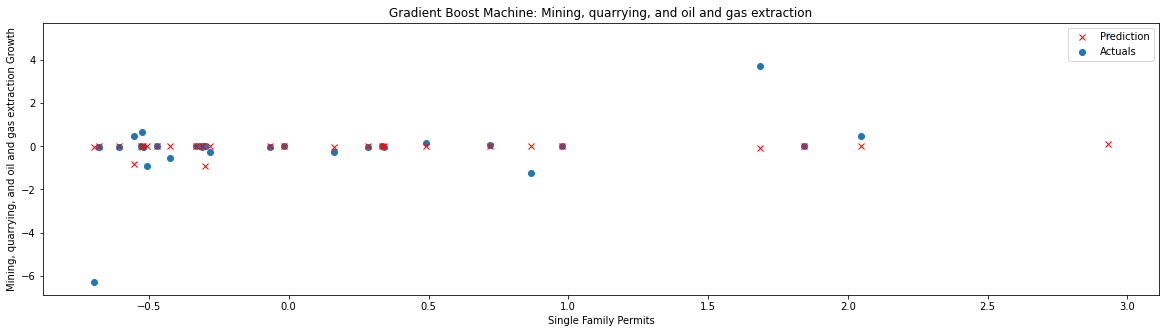

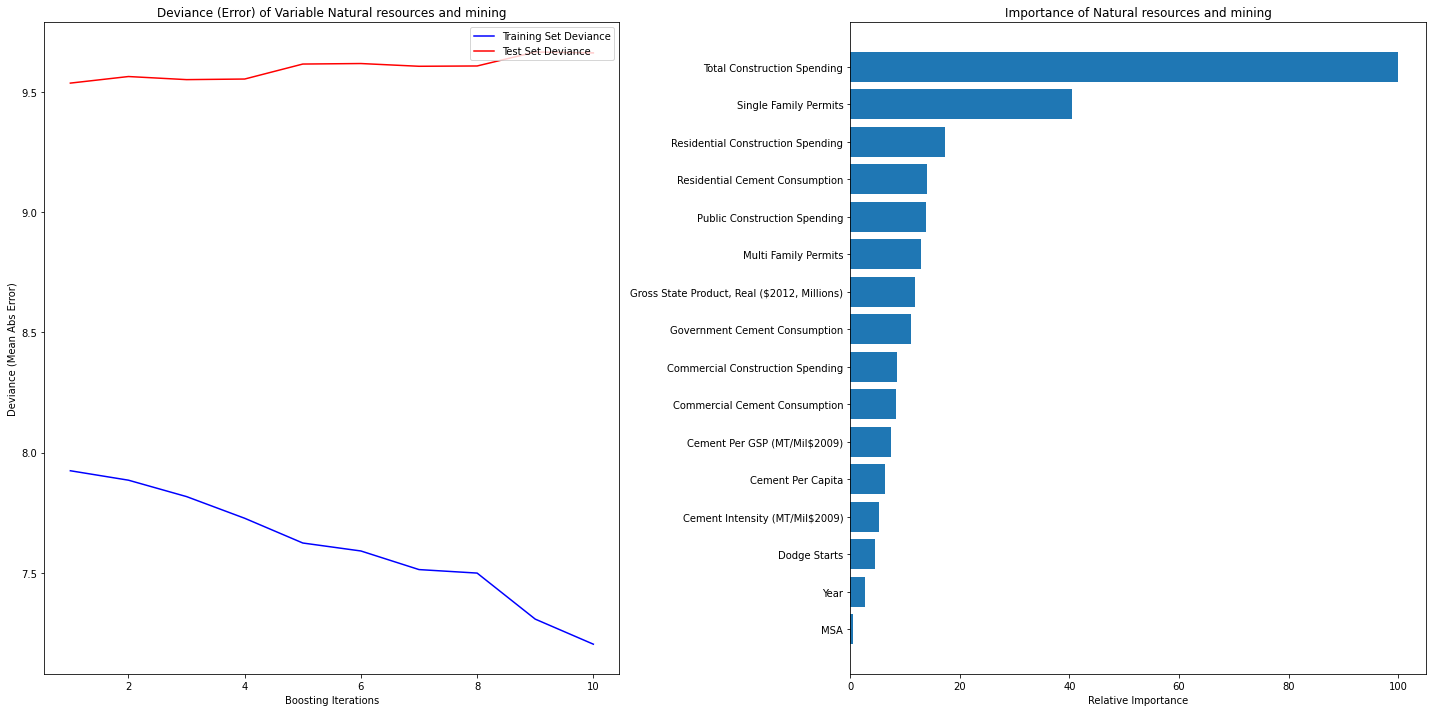

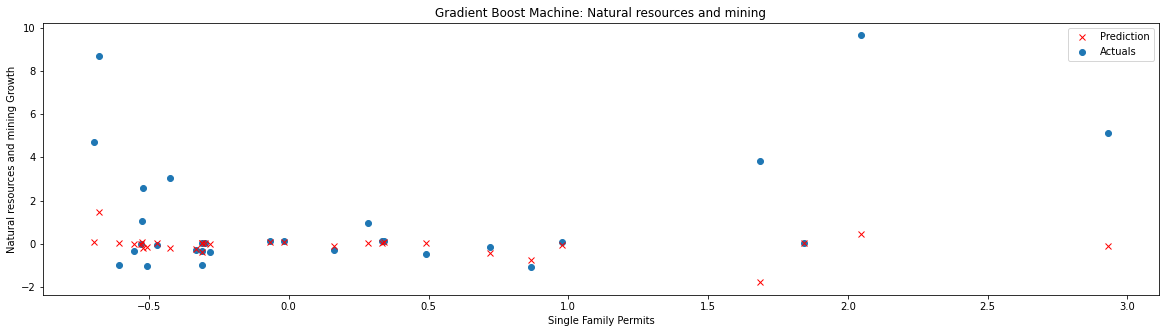

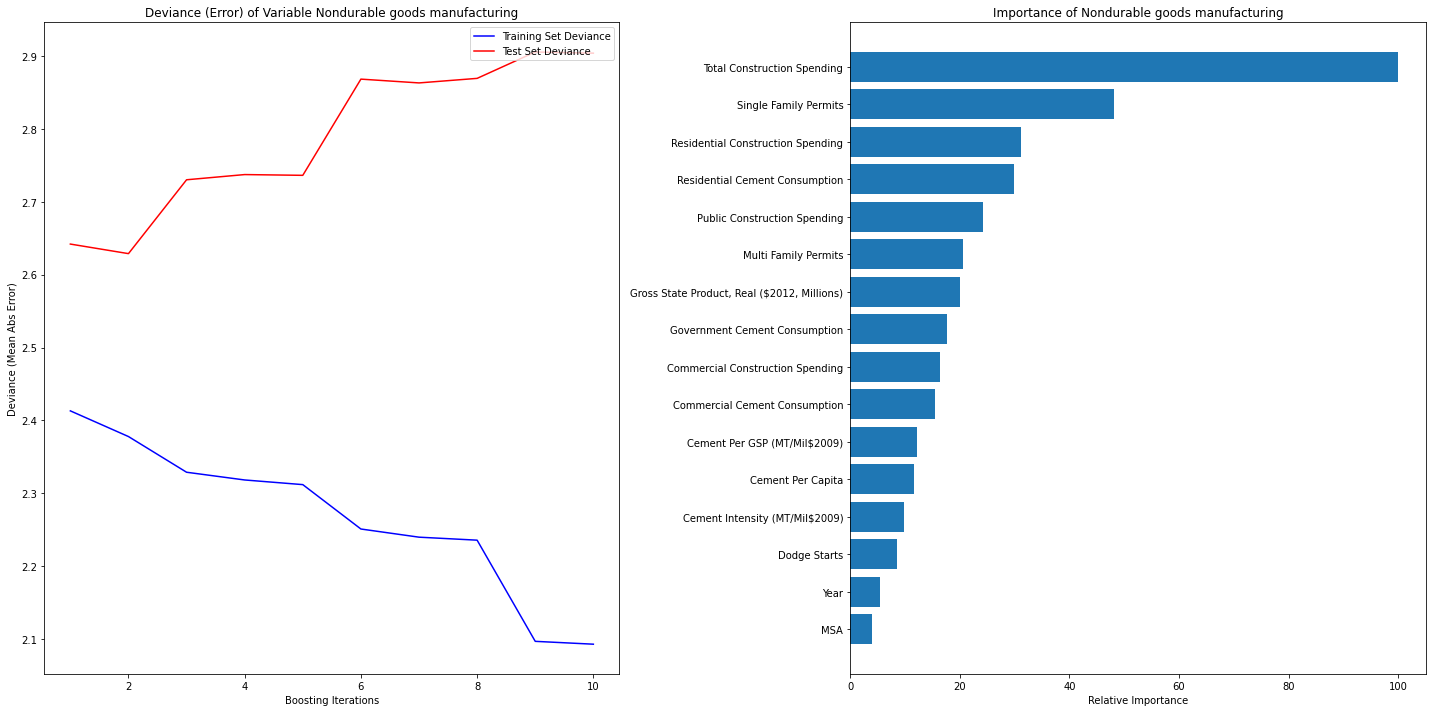

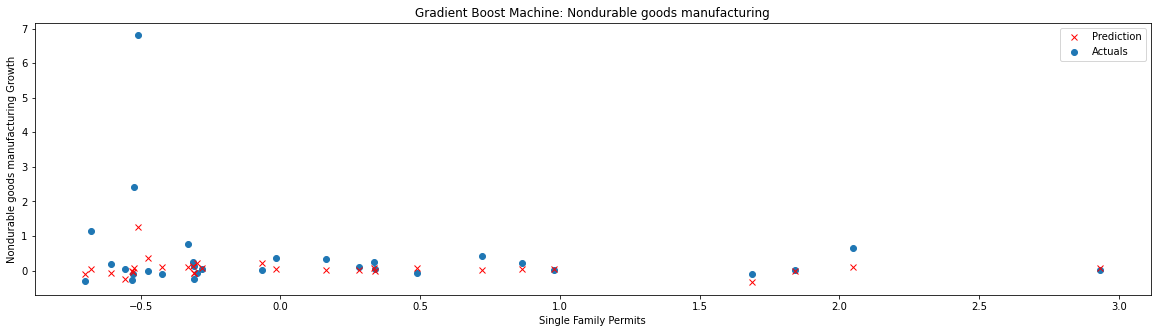

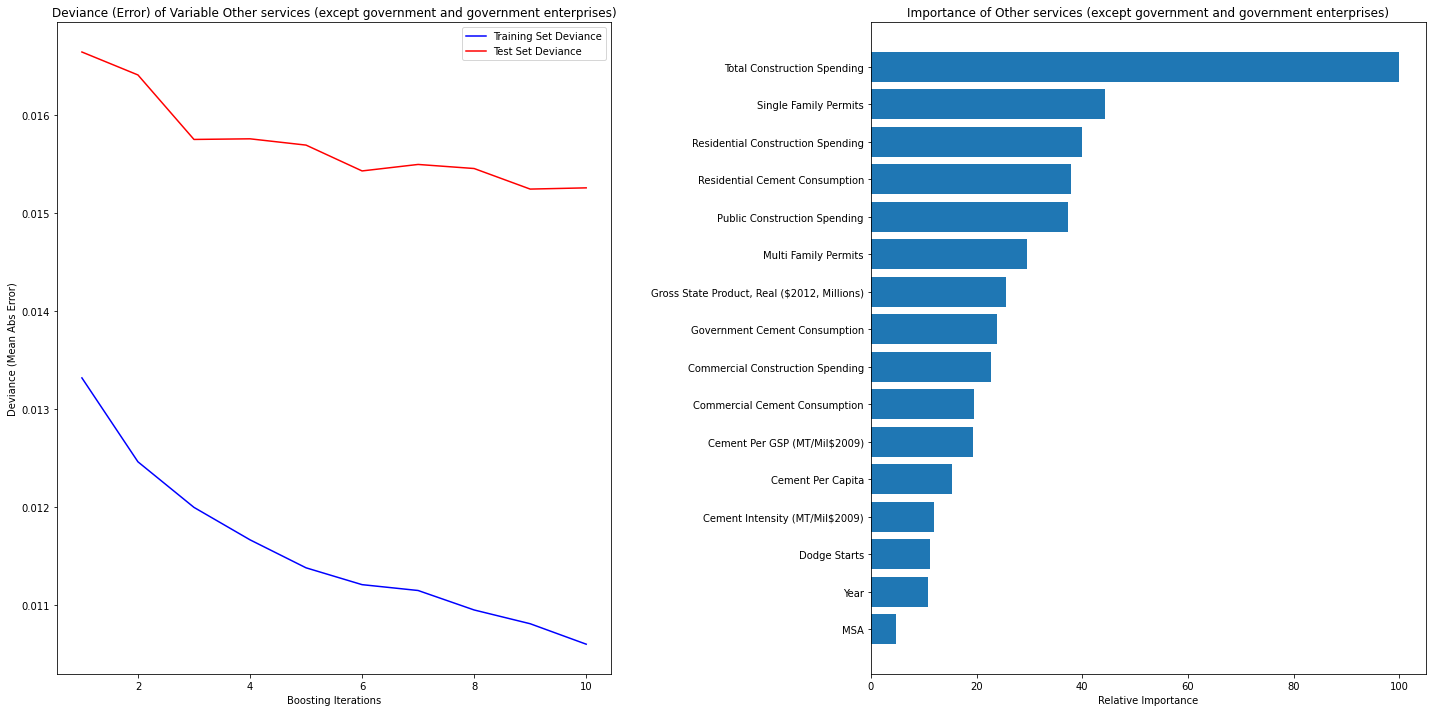

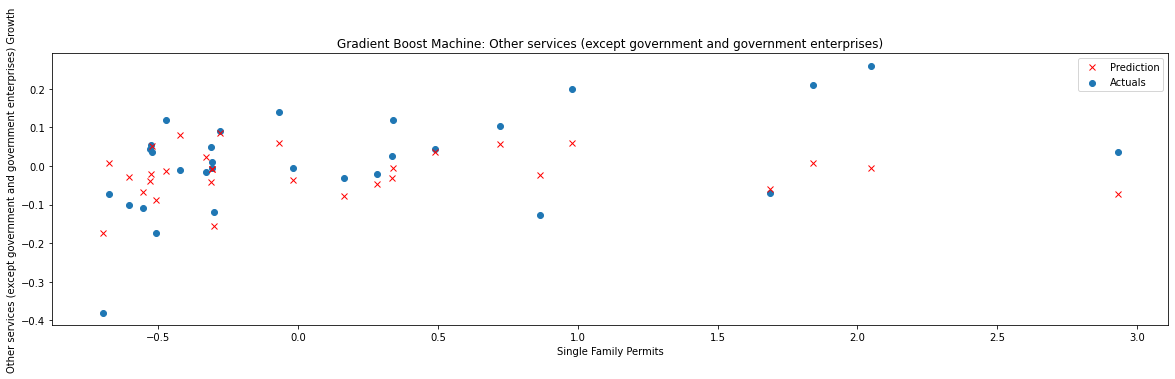

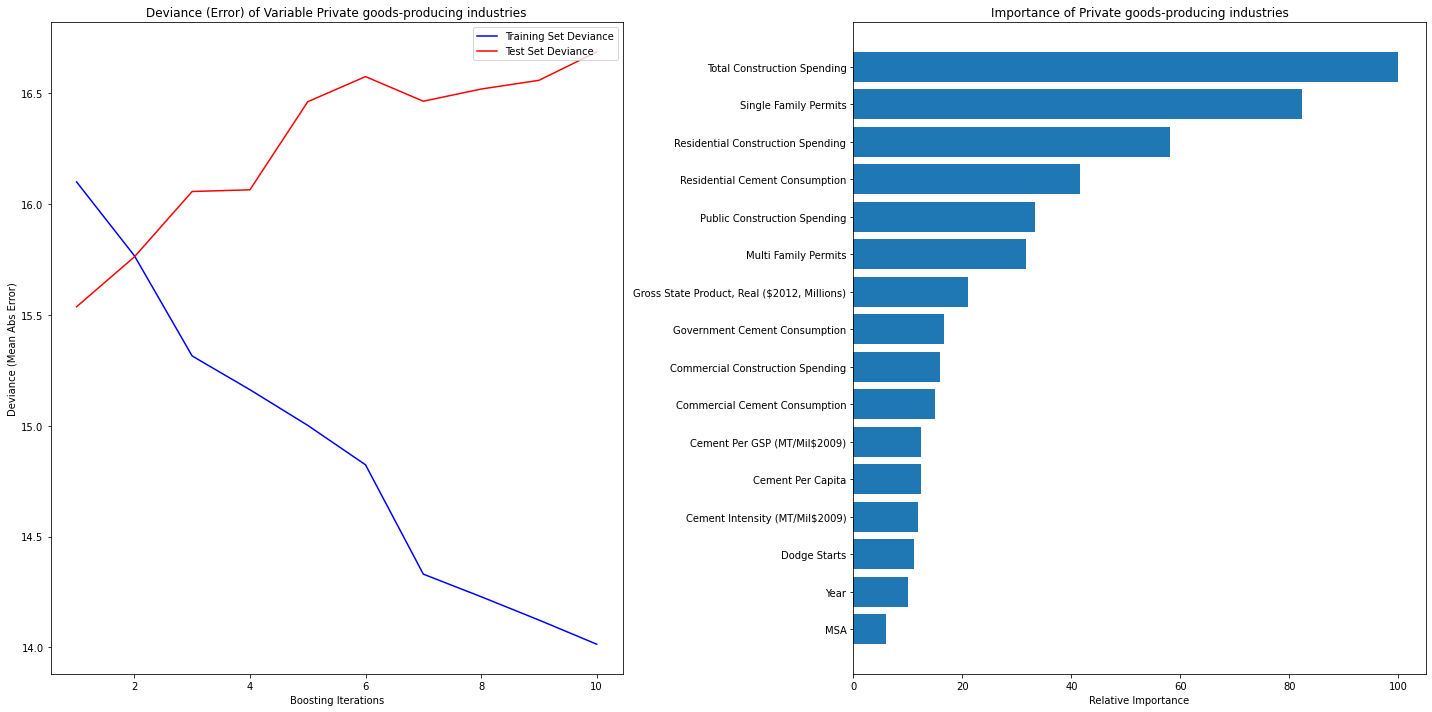

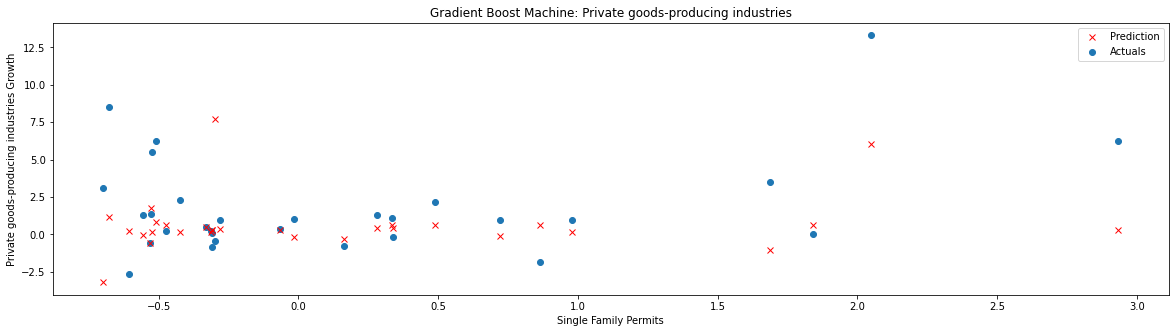

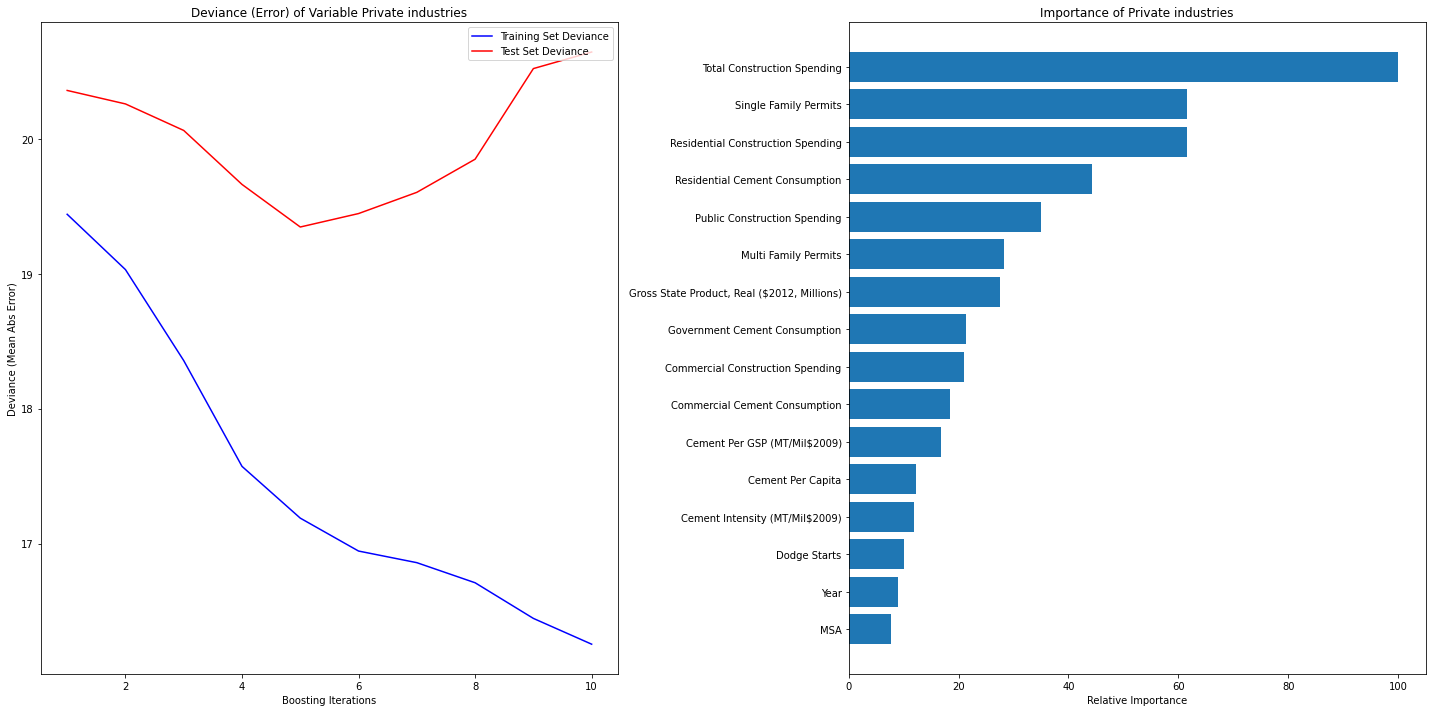

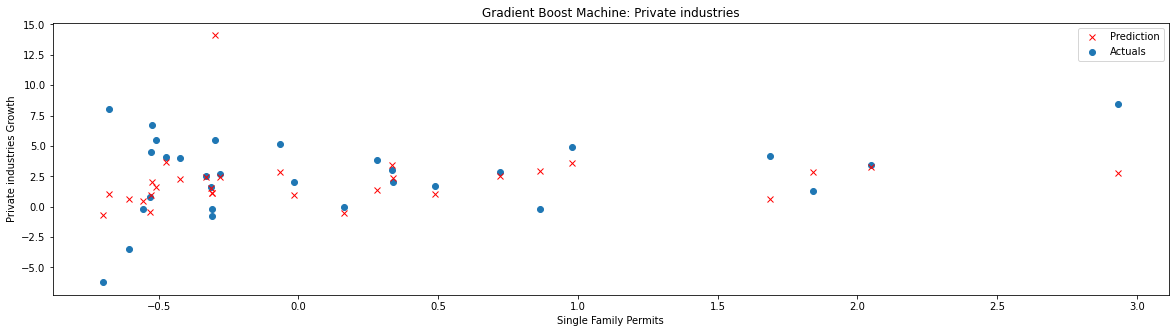

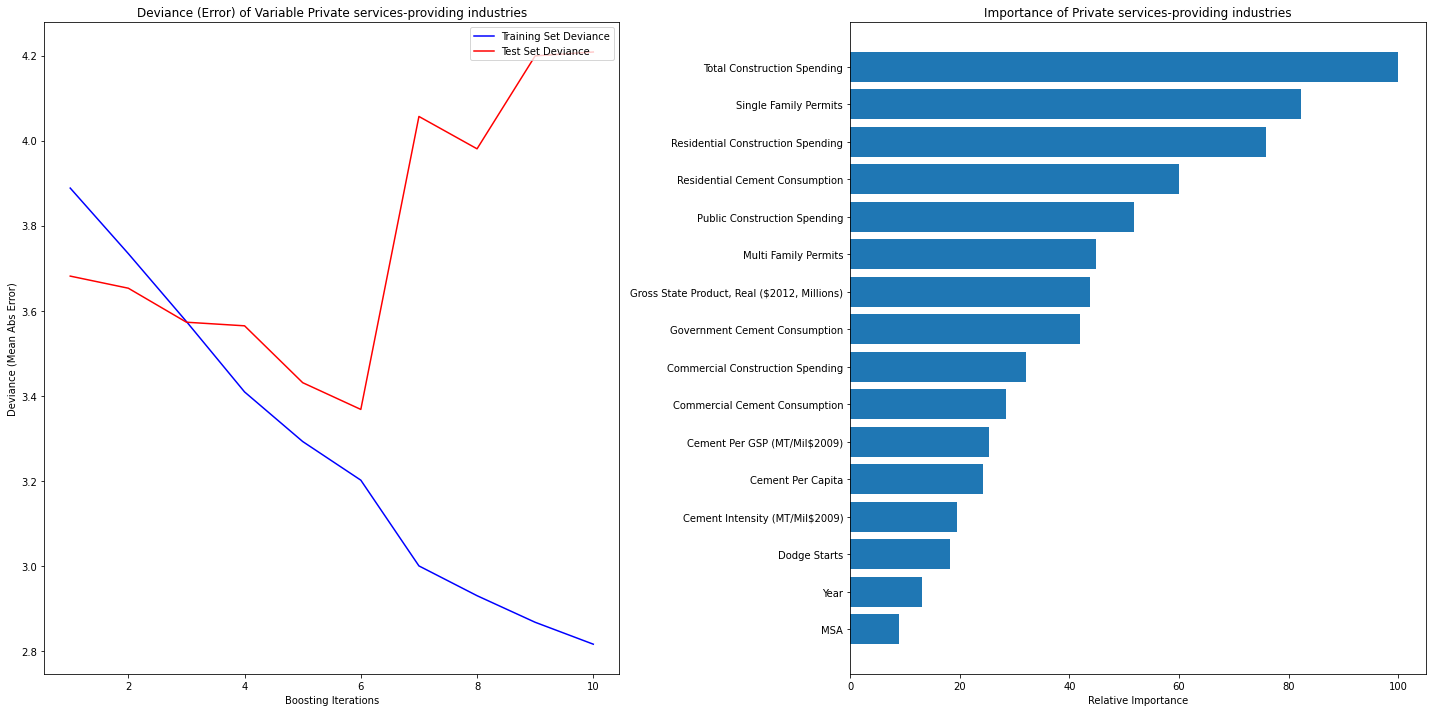

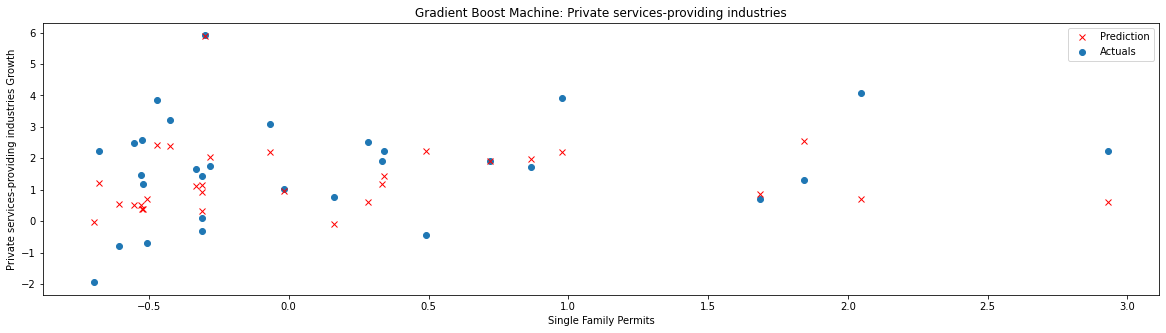

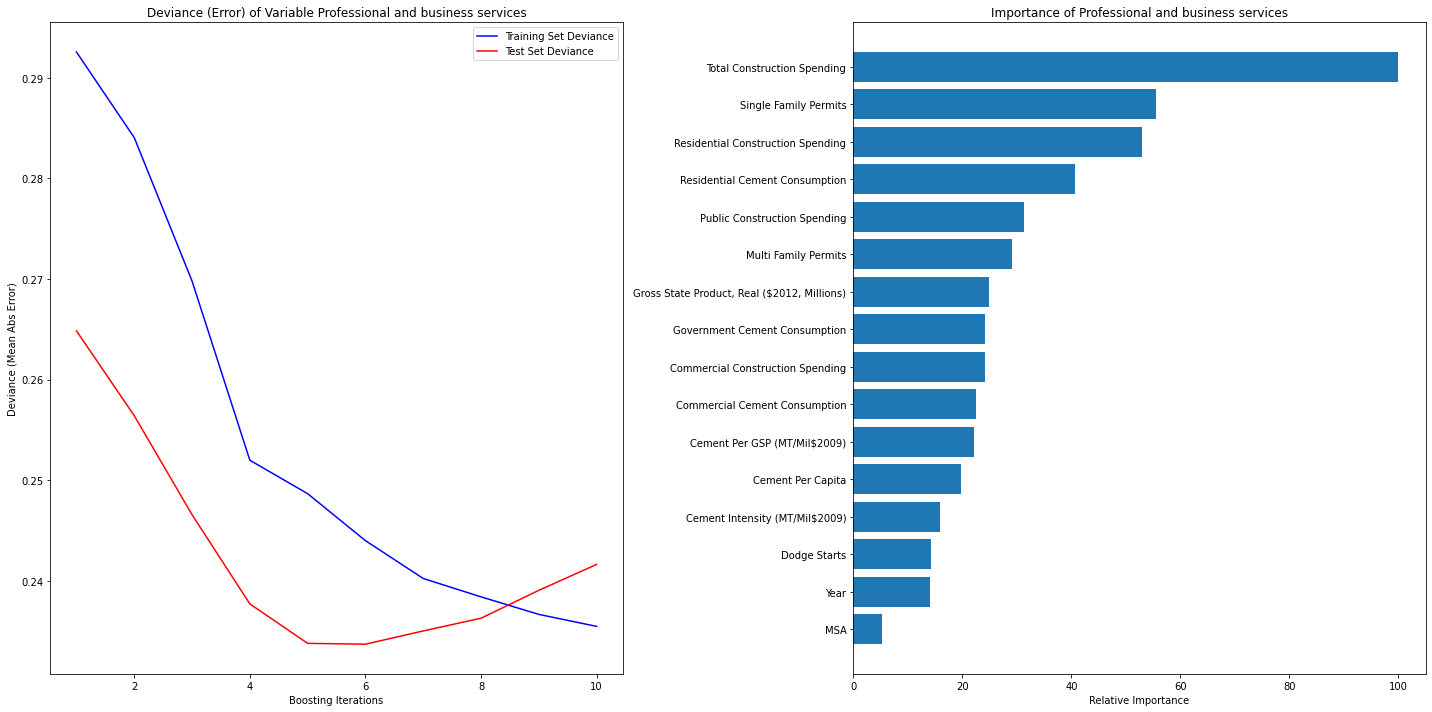

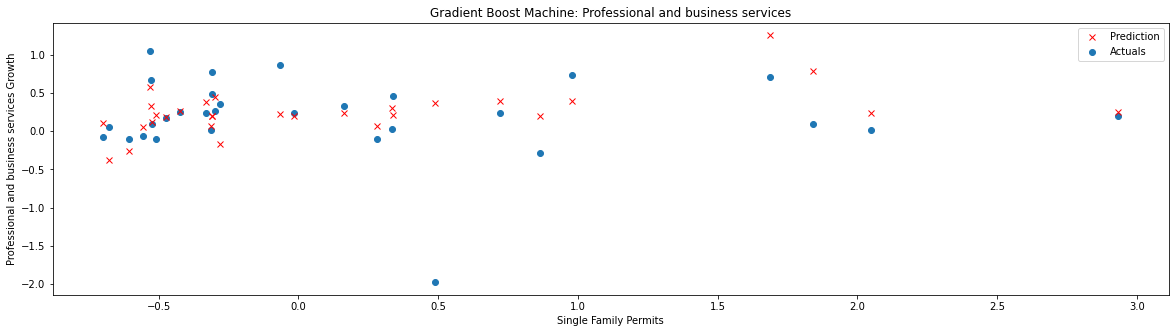

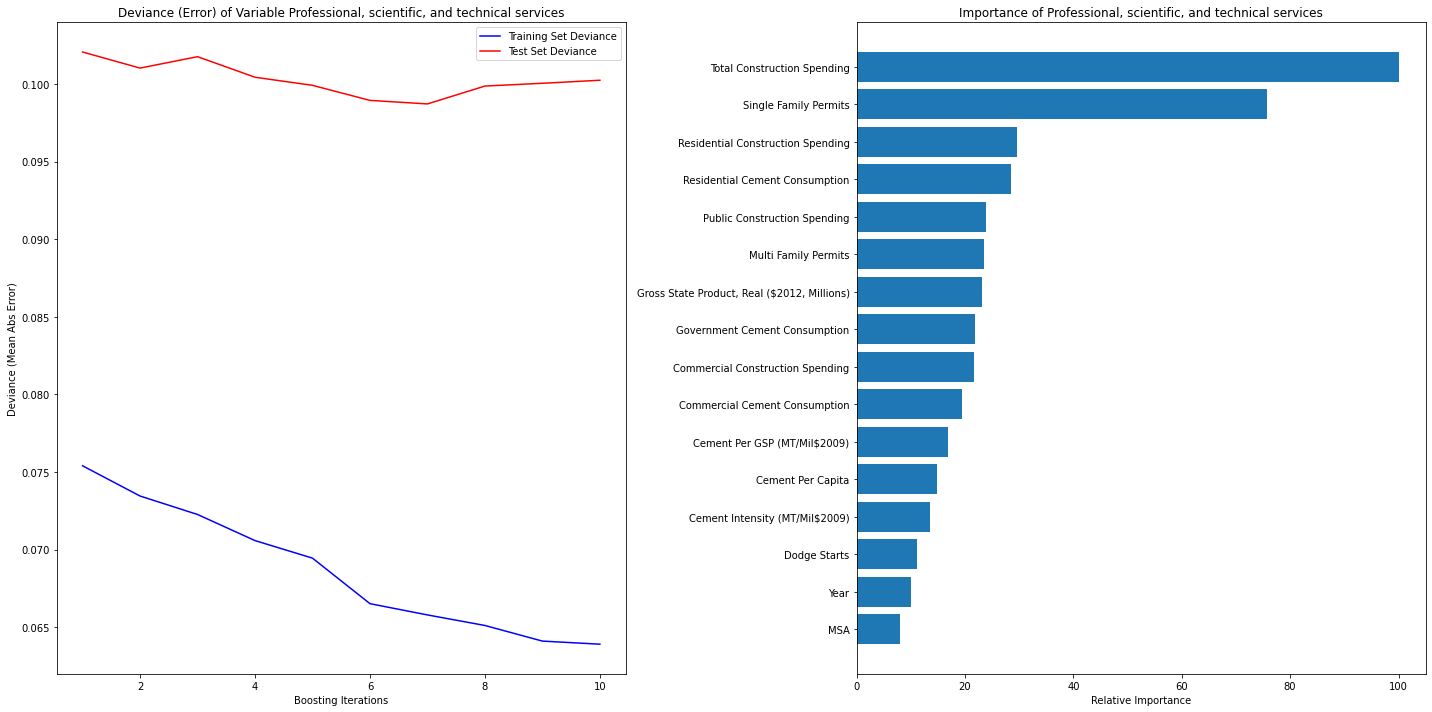

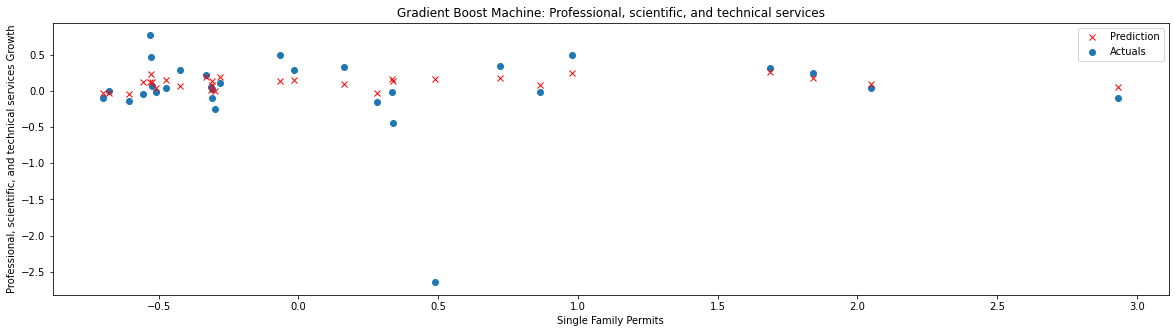

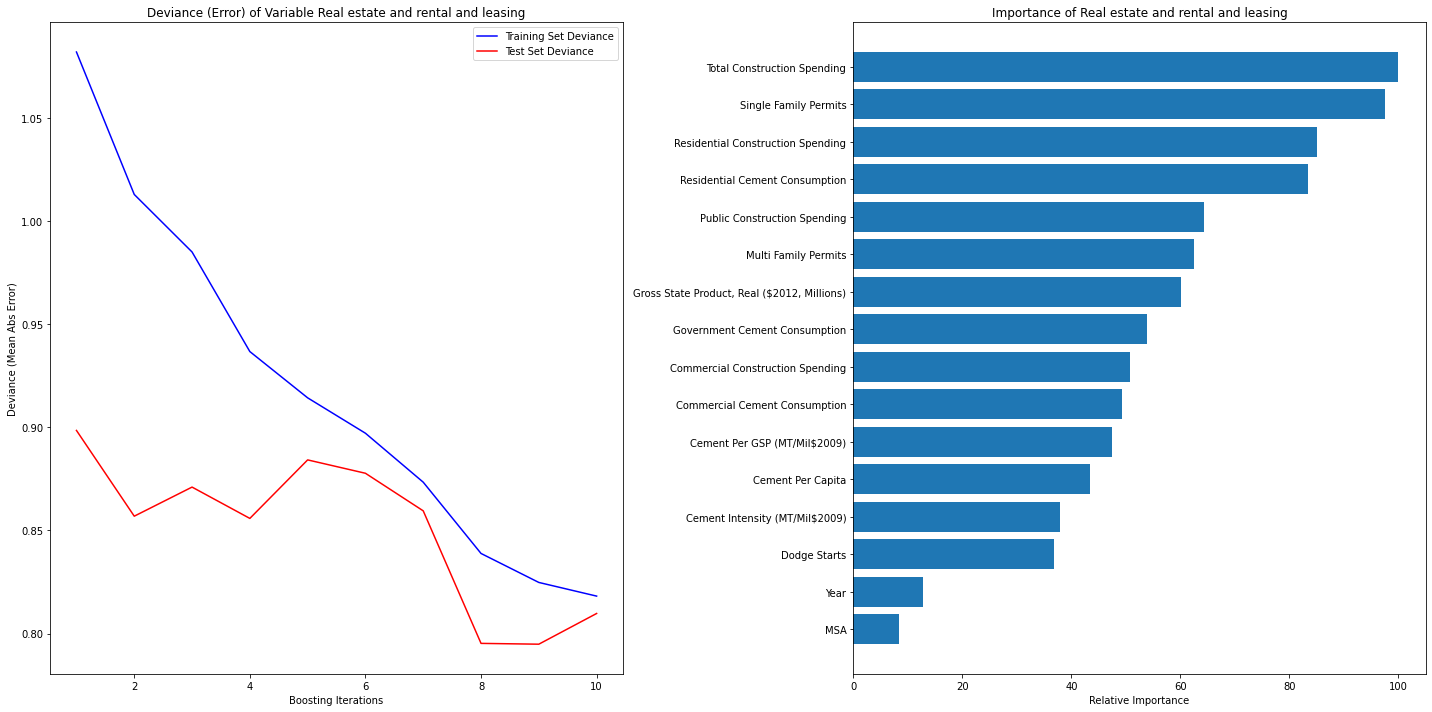

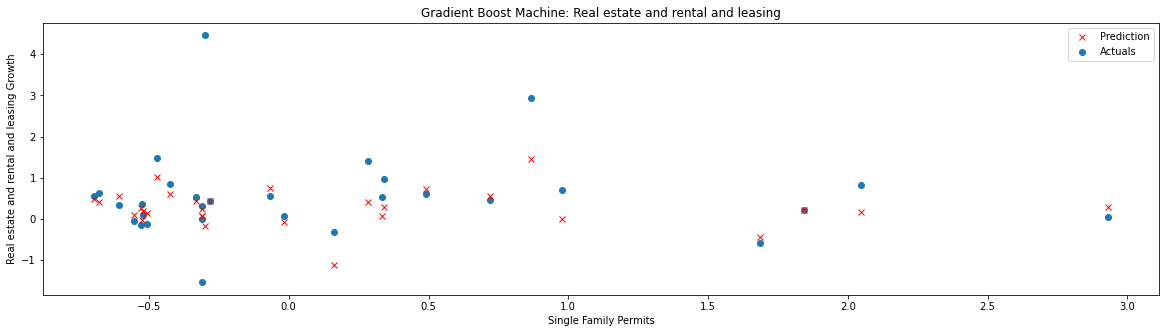

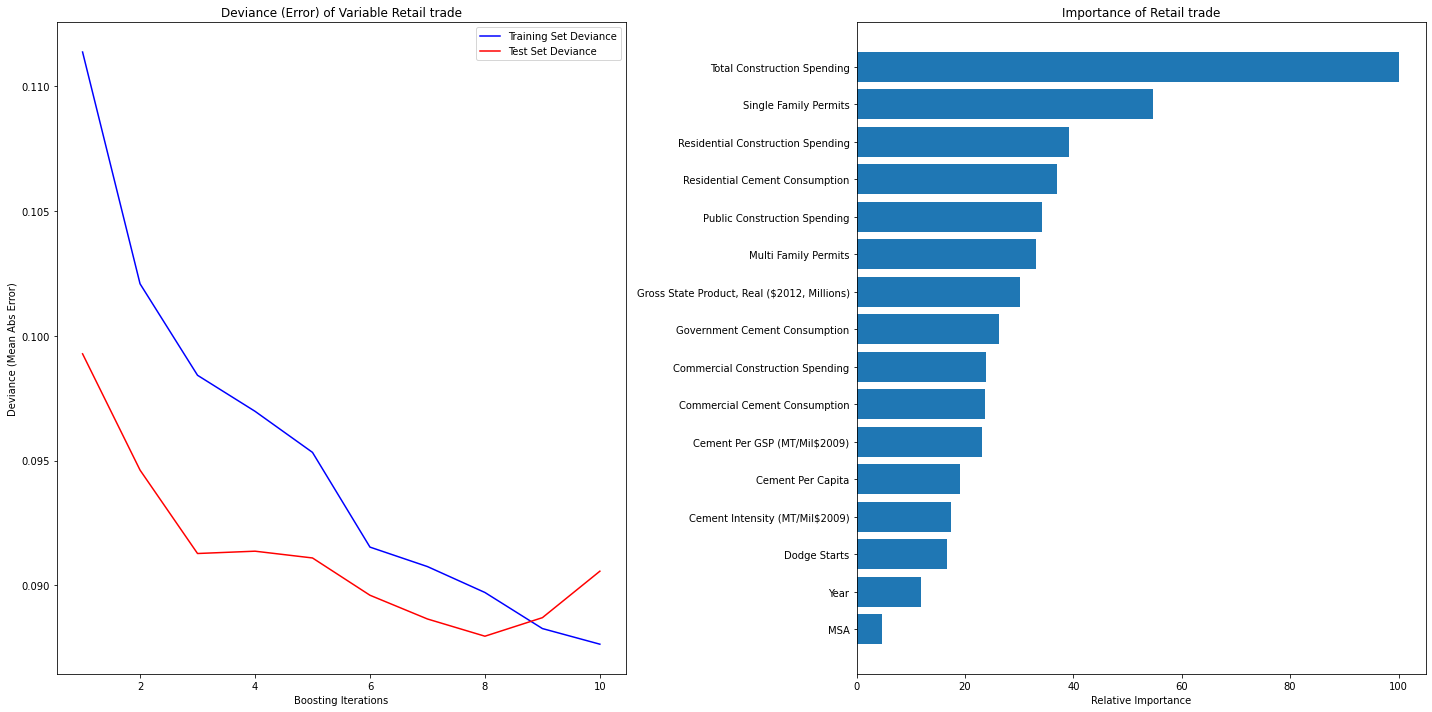

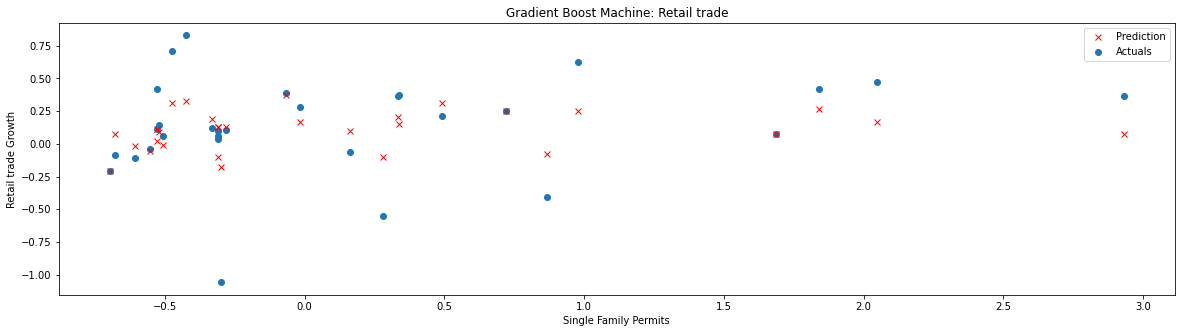

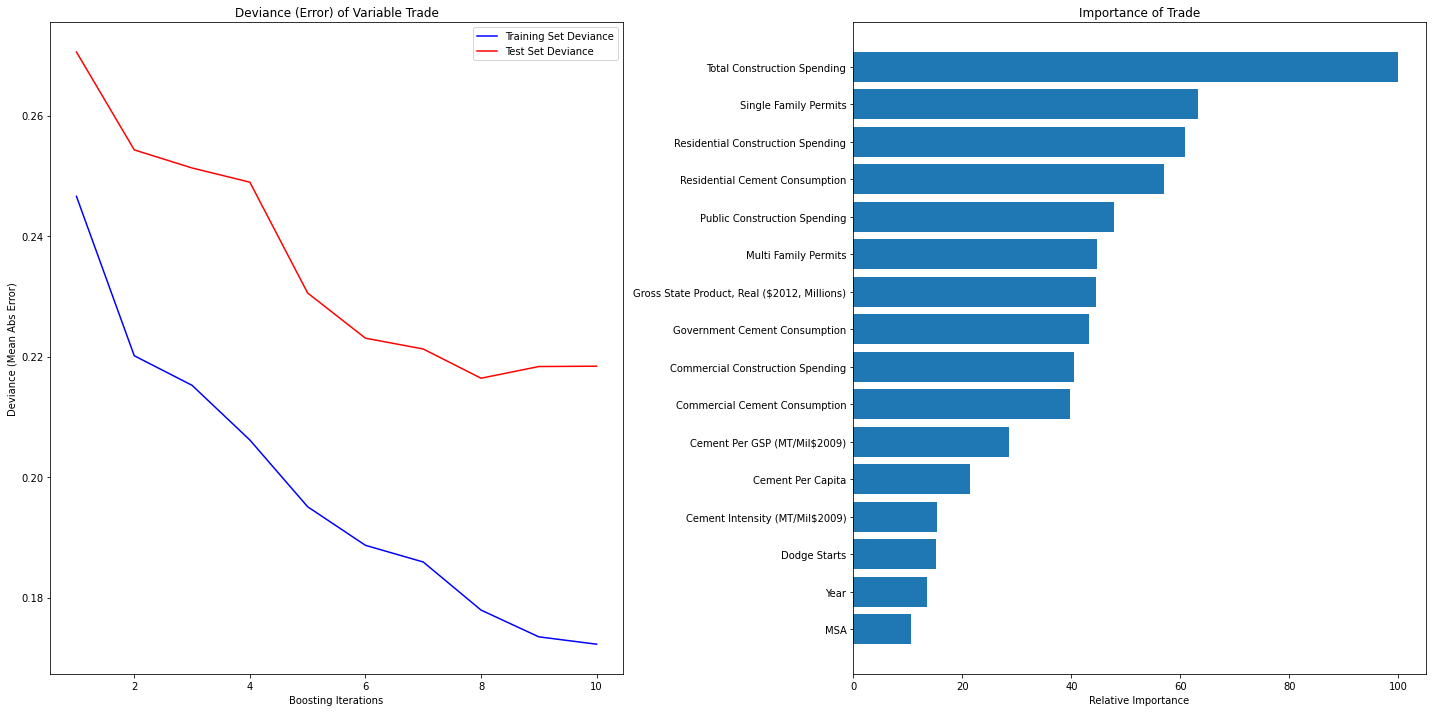

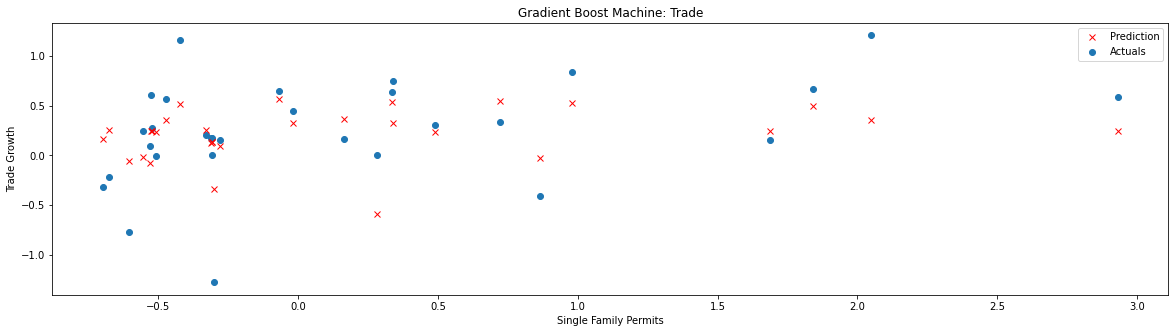

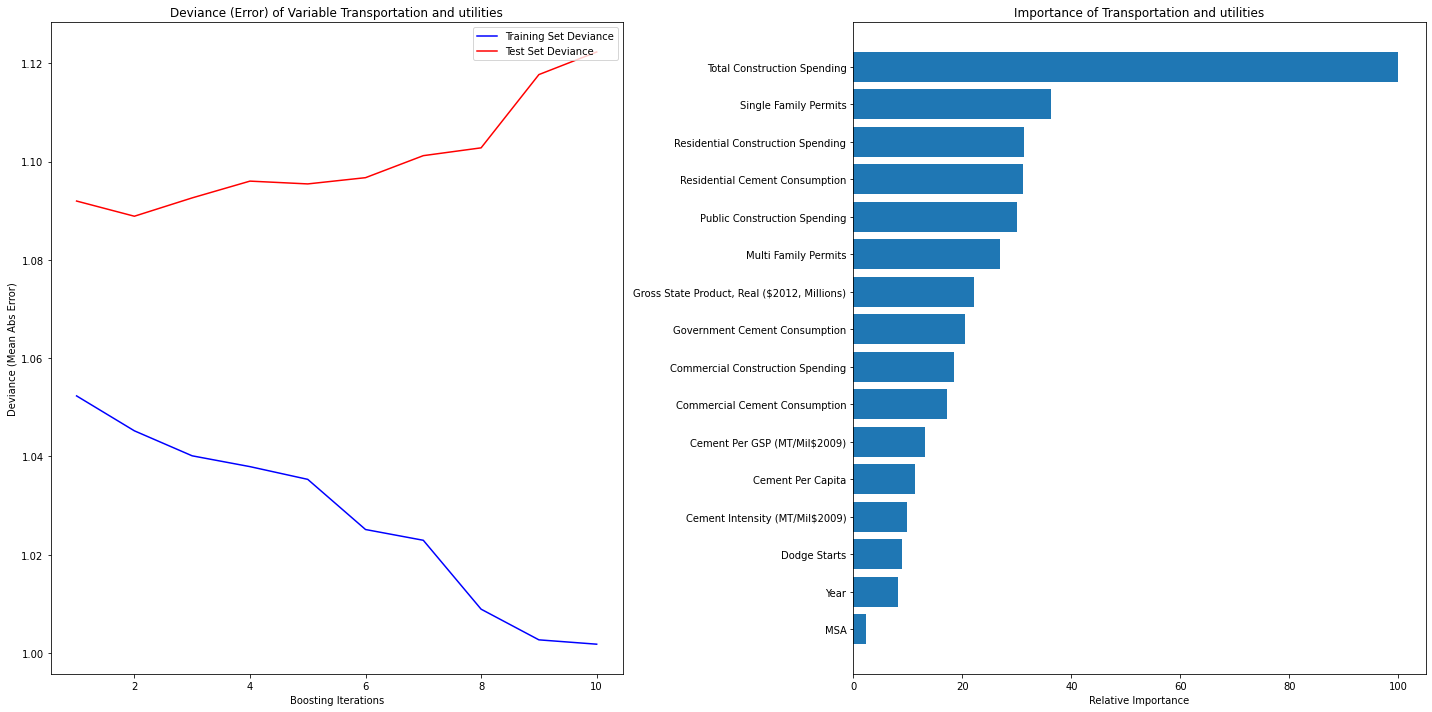

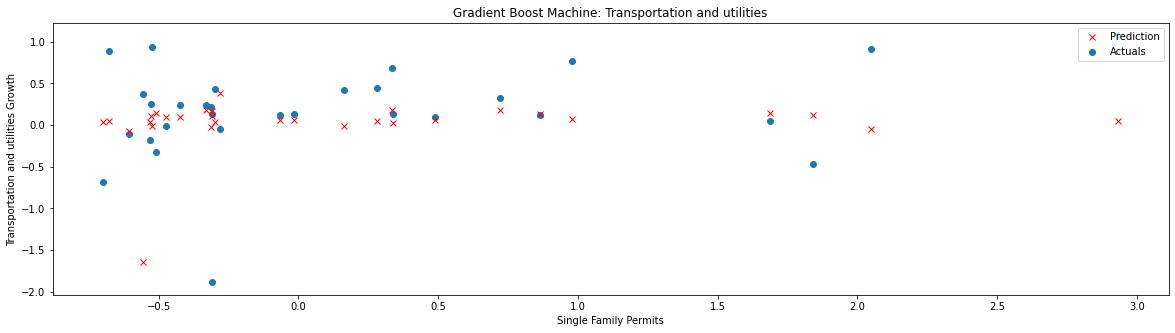

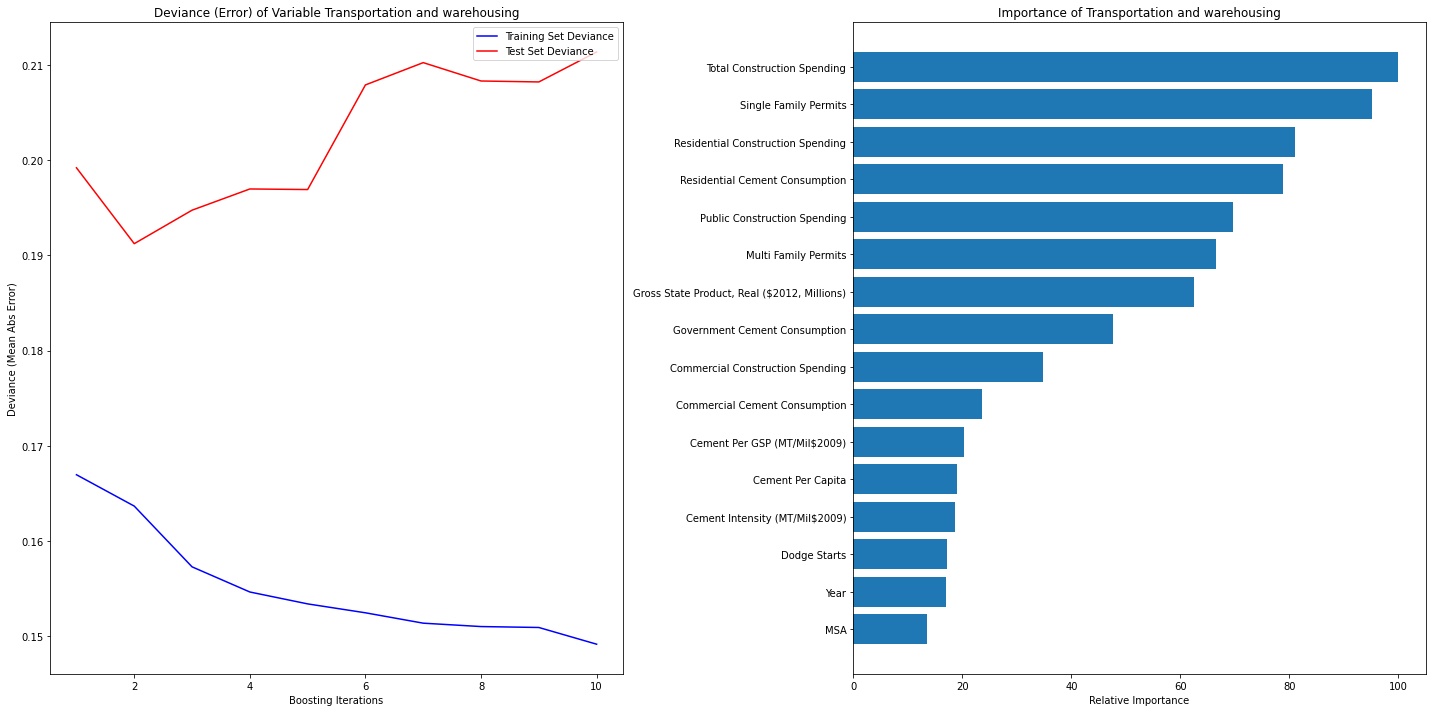

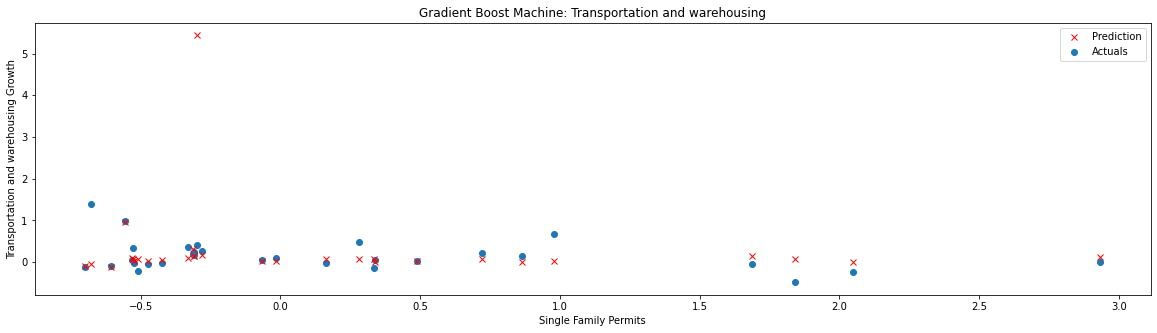

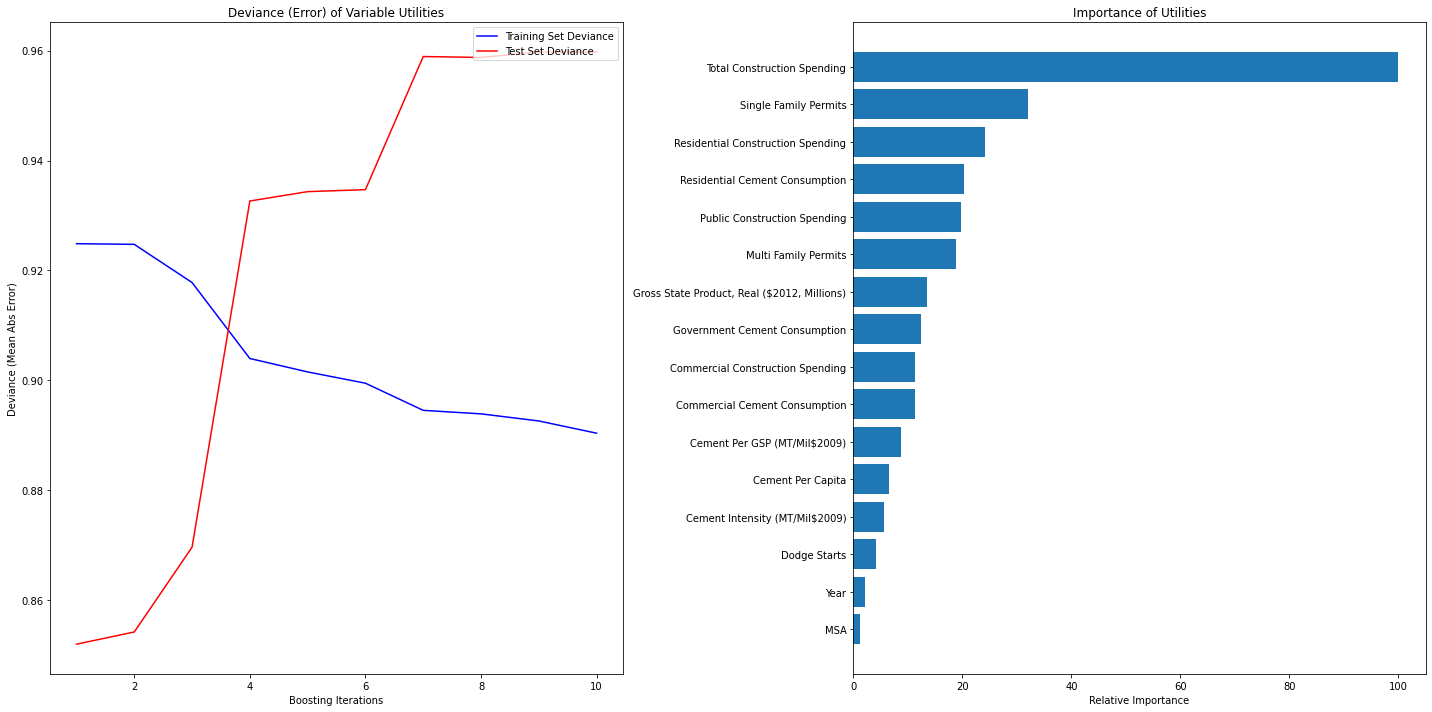

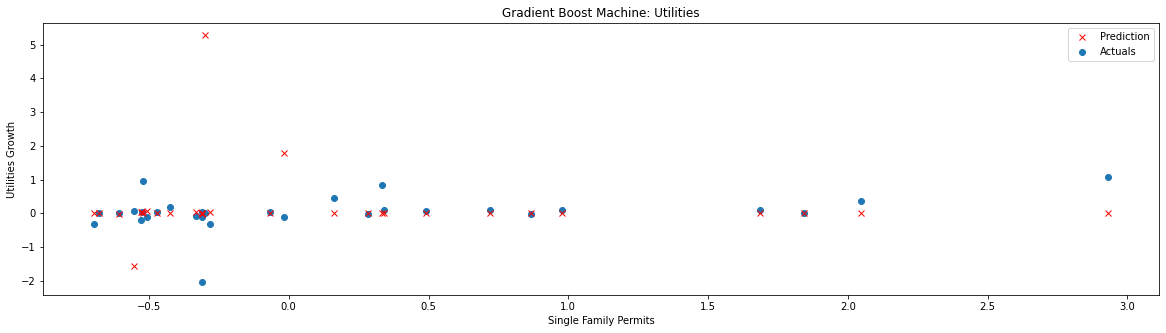

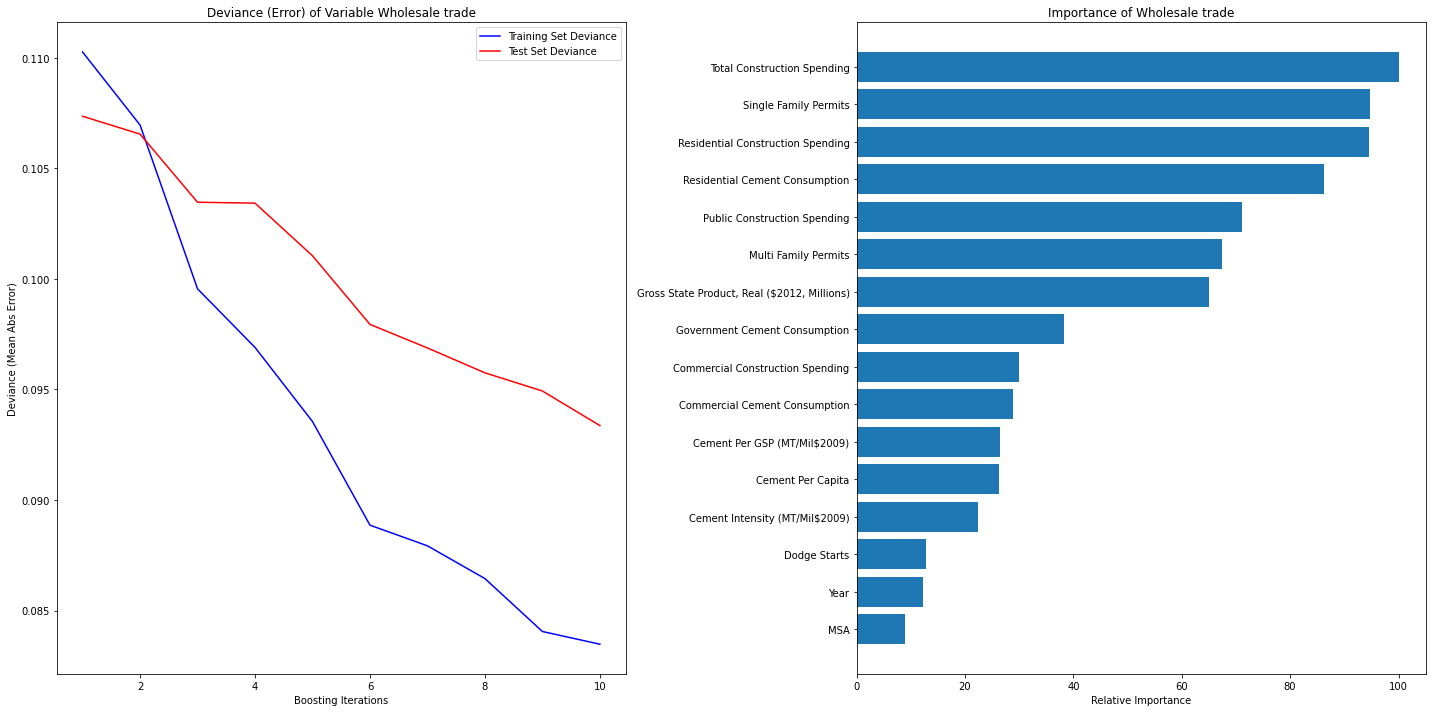

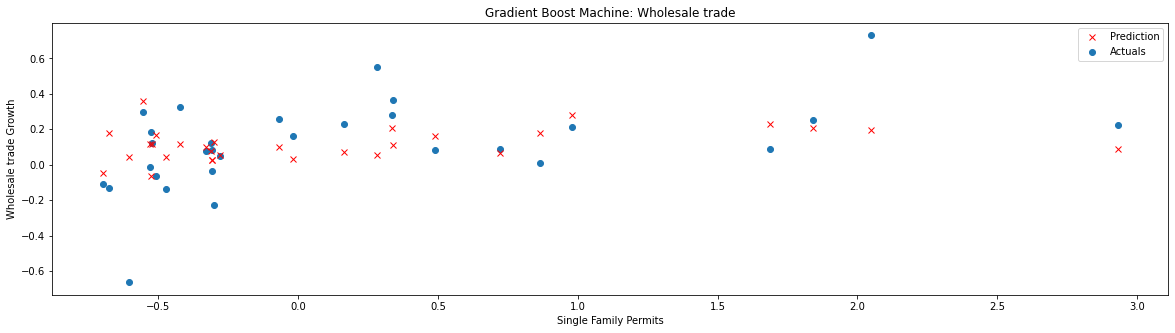

In [46]:
#####using statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.discrete import discrete_model
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

#var=['Cement Per Capita','Commercial Construction Spending',"Unemployment Rate (%)",'Gross State Product, Real ($2012, Millions)','Transportation and utilities','Transportation and warehousing',]

#label="Construction"
os.chdir(grad_boost_img) ###CHANGE DIRECTORY OF IMAGES
########################################
params = {
    'n_estimators': 10,
    'max_depth': 4,
    'learning_rate': .9,
    'criterion': 'mae'}
#########################################
var=var_pca
df_pred_grad_boost=pd.DataFrame()
for label in var_bed:
  df_train_var=df_train[var_pca]
  df_train_label=df_train[label]
  df_val_var=df_val[var_pca]
  df_val_label=df_val[label]
  
  clf = ensemble.GradientBoostingRegressor(**params)
  clf.fit(df_train_var, df_train_label)
  # compute test set deviance
  test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

  for i, y_pred in enumerate(clf.staged_predict(df_val_var)):
      test_score[i] = clf.loss_(df_val_label, y_pred)

  plt.figure(figsize=(20, 10))
  plt.subplot(1, 2, 1)
  plt.title('Deviance (Error) of Variable {}'.format(label))
  plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
          label='Training Set Deviance')
  plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
          label='Test Set Deviance')
  plt.legend(loc='upper right')
  plt.xlabel('Boosting Iterations')
  plt.ylabel('Deviance (Mean Abs Error)')
  #axes=plt.gca()
  #axes.set_ylim([0,1.8])

# #############################################################################
# Plot feature importance
#plt.figure(figsize=(10,5))
  feature_importance = clf.feature_importances_
# make importances relative to max importance
  feature_importance = 100.0 * (feature_importance / feature_importance.max())
  sorted_idx = np.argsort(feature_importance)
  pos = np.arange(sorted_idx.shape[0]) + .5
  plt.subplot(1, 2, 2)
  plt.barh(pos, feature_importance[sorted_idx], align='center')
  plt.yticks(pos, df_final.columns)
  plt.xlabel('Relative Importance')
  plt.title('Importance of {}'.format(label))
  plt.tight_layout()

  plt.savefig("Gradient_boost_{}.png".format(label))
  plt.show()

  #'Total Construction Spending',
  plt_var='Single Family Permits'
  plt.figure(figsize=(20, 5))
  plt.title('Gradient Boost Machine: {}'.format(label))
  plt.scatter(df_val[plt_var][0:30], df_val_label[0:30],label="Actuals")
  plt.plot(df_val[plt_var][0:30], clf.predict(df_val_var[0:30]),'x',color='r',label="Prediction")
  plt.xlabel(plt_var)
  plt.ylabel("{} Growth".format(label))
  plt.legend(loc="upper right")
  plt.savefig("Gradient_boost_predictions_{}.png".format(label))
  plt.show()
  clf.fit(df_final_rand[var_pca], df_final_rand[label])
  df_pred_grad_boost=pd.concat([df_pred_grad_boost,pd.DataFrame(clf.predict(df_pca_test),columns=[label])],axis=1)
  

In [0]:
df_pred_grad_boost_final=pd.concat([df_complete_pca_test.reset_index()[["Year","Geo (MSA)","State"]],df_pred_grad_boost,],axis=1)
df_pred_grad_boost_final=df_pred_grad_boost_final.sort_values(["Geo (MSA)","Year"])

In [48]:
os.chdir(base_dir)
df_pred_grad_boost_final.to_csv("df_pred_gb_v2.csv",index=False)
df_pred_grad_boost_final

Year                          Geo (MSA)  ... Utilities  Wholesale trade
0     2019                        Abilene, TX  ... -0.027499         0.225577
1     2020                        Abilene, TX  ... -0.000499         0.225577
2     2021                        Abilene, TX  ... -0.000499         0.225577
3     2022                        Abilene, TX  ... -0.000499         0.225577
4     2023                        Abilene, TX  ...  0.003854         0.171577
...    ...                                ...  ...       ...              ...
2059  2020  Youngstown-Warren-Boardman, OH-PA  ...  0.009854         0.056204
2060  2021  Youngstown-Warren-Boardman, OH-PA  ...  0.009854         0.056204
2061  2022  Youngstown-Warren-Boardman, OH-PA  ...  0.009854         0.056204
2062  2023  Youngstown-Warren-Boardman, OH-PA  ...  0.009854         0.056204
2063  2024  Youngstown-Warren-Boardman, OH-PA  ...  0.009854         0.211699

[2064 rows x 37 columns]

In [49]:
mean_squared_error(df_val_label,clf.predict(df_val_var))

0.08247300929182198

In [0]:
######################################### DATA PREP FOR DEEP NEURAL NETWORKS & LSTM

df_train_label=np.array(df_train[label]) ###Training data label
df_val_label=np.array(df_val[label]) #Validation label
df_train_array=np.array(df_train[var_pca]) ##Train data numpy array
df_val_array=np.array(df_val[var_pca]) #Validation data numpy array
df_pca_test_array=np.array(df_pca_test)

dt=tf.expand_dims(df_train_array,axis=-1)
dv=tf.expand_dims(df_val_array,axis=-1)

dt_whole=tf.expand_dims(np.array(df_final_rand[var_pca]),axis=-1) ####Used to train entire dataset


dtest=tf.expand_dims(df_pca_test_array,axis=-1)

In [51]:
dv[0:30].shape
#df_val[label][0:30].shape

TensorShape([30, 16, 1])

Train on 3276 samples, validate on 819 samples
Epoch 1/100
3276/3276 [==============================] - 6s 2ms/sample - loss: 0.0219 - mae: 0.1233 - val_loss: 0.0254 - val_mae: 0.1301
Epoch 2/100
3276/3276 [==============================] - 2s 469us/sample - loss: 0.0218 - mae: 0.1231 - val_loss: 0.0254 - val_mae: 0.1298
Epoch 3/100
3276/3276 [==============================] - 2s 463us/sample - loss: 0.0218 - mae: 0.1228 - val_loss: 0.0253 - val_mae: 0.1294
Epoch 4/100
3276/3276 [==============================] - 2s 464us/sample - loss: 0.0217 - mae: 0.1224 - val_loss: 0.0253 - val_mae: 0.1290
Epoch 5/100
3276/3276 [==============================] - 2s 460us/sample - loss: 0.0217 - mae: 0.1221 - val_loss: 0.0252 - val_mae: 0.1286
Epoch 6/100
3276/3276 [==============================] - 2s 467us/sample - loss: 0.0216 - mae: 0.1218 - val_loss: 0.0252 - val_mae: 0.1283
Epoch 7/100
3276/3276 [==============================] - 2s 463us/sample - loss: 0.0216 - mae: 0.1215 - val_loss: 0.0251 

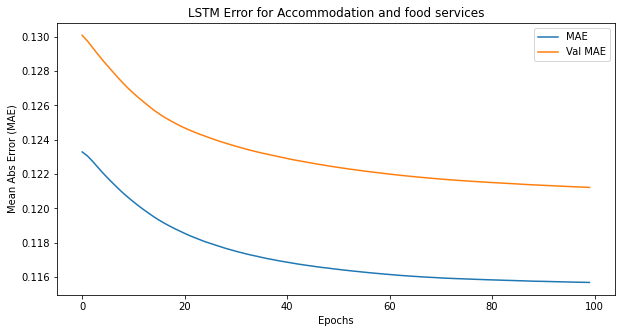

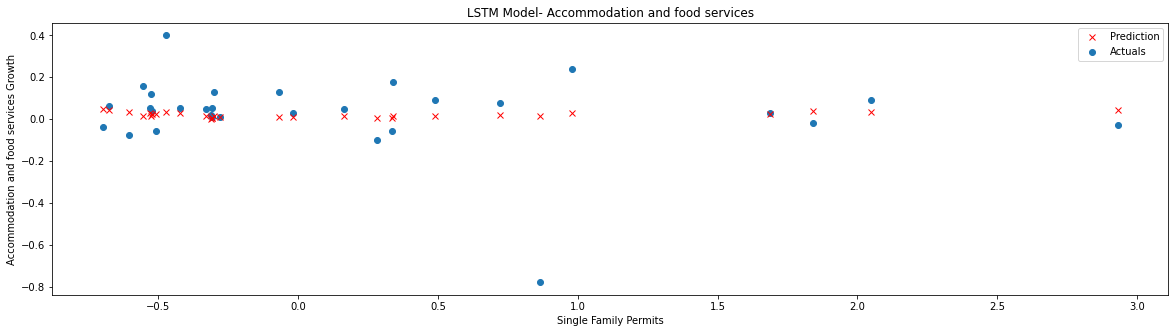

Train on 4095 samples
Epoch 1/100
4095/4095 [==============================] - 2s 429us/sample - loss: 0.0212 - mae: 0.1168
Epoch 2/100
4095/4095 [==============================] - 2s 426us/sample - loss: 0.0212 - mae: 0.1168
Epoch 3/100
4095/4095 [==============================] - 2s 425us/sample - loss: 0.0212 - mae: 0.1168
Epoch 4/100
4095/4095 [==============================] - 2s 424us/sample - loss: 0.0212 - mae: 0.1168
Epoch 5/100
4095/4095 [==============================] - 2s 435us/sample - loss: 0.0212 - mae: 0.1167
Epoch 6/100
4095/4095 [==============================] - 2s 426us/sample - loss: 0.0212 - mae: 0.1167
Epoch 7/100
4095/4095 [==============================] - 2s 425us/sample - loss: 0.0212 - mae: 0.1167
Epoch 8/100
4095/4095 [==============================] - 2s 423us/sample - loss: 0.0212 - mae: 0.1167
Epoch 9/100
4095/4095 [==============================] - 2s 419us/sample - loss: 0.0212 - mae: 0.1167
Epoch 10/100
4095/4095 [==============================] - 2s

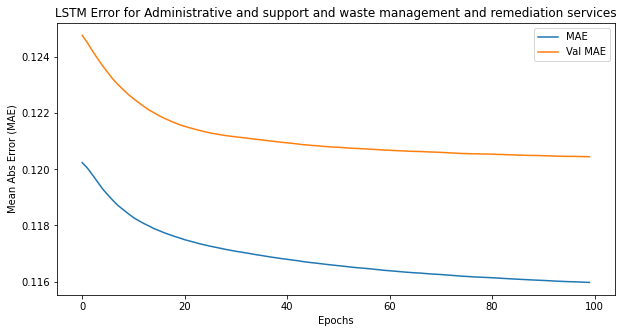

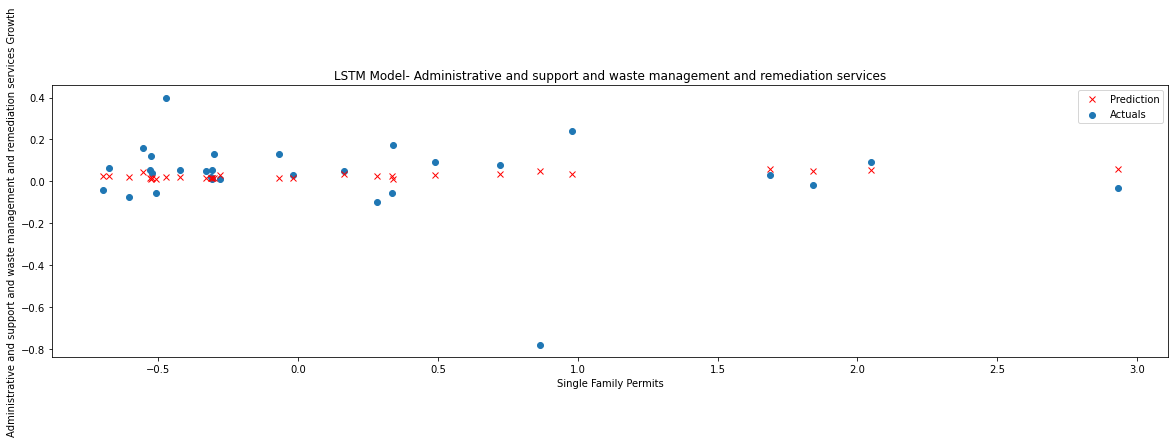

Train on 4095 samples
Epoch 1/100
4095/4095 [==============================] - 2s 404us/sample - loss: 0.0243 - mae: 0.1474
Epoch 2/100
4095/4095 [==============================] - 2s 397us/sample - loss: 0.0242 - mae: 0.1470
Epoch 3/100
4095/4095 [==============================] - 2s 395us/sample - loss: 0.0241 - mae: 0.1466
Epoch 4/100
4095/4095 [==============================] - 2s 407us/sample - loss: 0.0241 - mae: 0.1462
Epoch 5/100
4095/4095 [==============================] - 2s 411us/sample - loss: 0.0240 - mae: 0.1458
Epoch 6/100
4095/4095 [==============================] - 2s 409us/sample - loss: 0.0239 - mae: 0.1456
Epoch 7/100
4095/4095 [==============================] - 2s 403us/sample - loss: 0.0239 - mae: 0.1453
Epoch 8/100
4095/4095 [==============================] - 2s 414us/sample - loss: 0.0238 - mae: 0.1451
Epoch 9/100
4095/4095 [==============================] - 2s 411us/sample - loss: 0.0238 - mae: 0.1450
Epoch 10/100
4095/4095 [==============================] - 2s

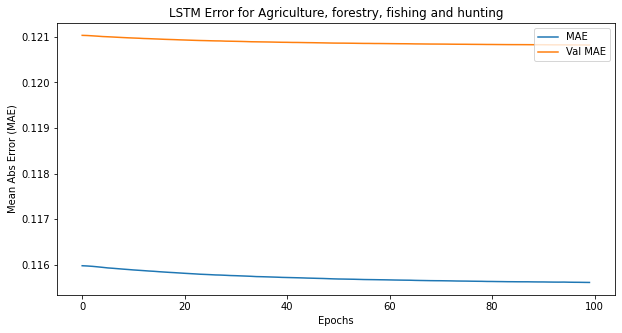

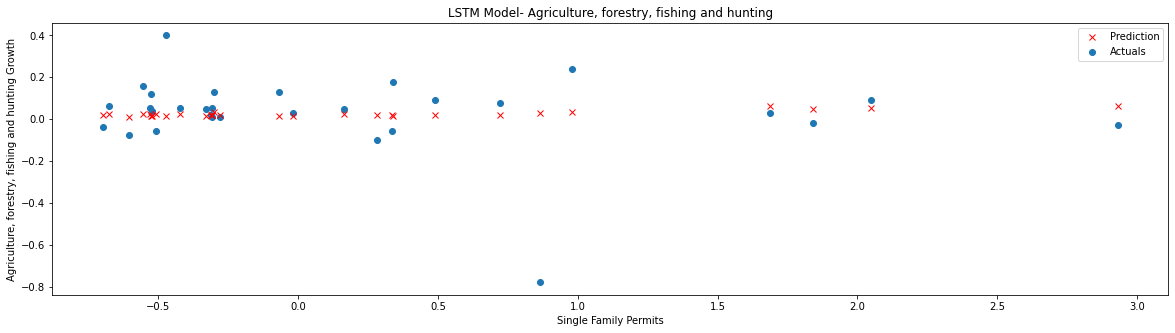

Train on 4095 samples
Epoch 1/100
4095/4095 [==============================] - 2s 457us/sample - loss: 0.5600 - mae: 0.8173
Epoch 2/100
4095/4095 [==============================] - 2s 461us/sample - loss: 0.5600 - mae: 0.8173
Epoch 3/100
4095/4095 [==============================] - 2s 457us/sample - loss: 0.5600 - mae: 0.8173
Epoch 4/100
4095/4095 [==============================] - 2s 451us/sample - loss: 0.5600 - mae: 0.8173
Epoch 5/100
4095/4095 [==============================] - 2s 480us/sample - loss: 0.5600 - mae: 0.8173
Epoch 6/100
4095/4095 [==============================] - 2s 469us/sample - loss: 0.5600 - mae: 0.8172
Epoch 7/100
4095/4095 [==============================] - 2s 419us/sample - loss: 0.5600 - mae: 0.8172
Epoch 8/100
4095/4095 [==============================] - 2s 418us/sample - loss: 0.5600 - mae: 0.8172
Epoch 9/100
4095/4095 [==============================] - 2s 414us/sample - loss: 0.5600 - mae: 0.8172
Epoch 10/100
4095/4095 [==============================] - 2s

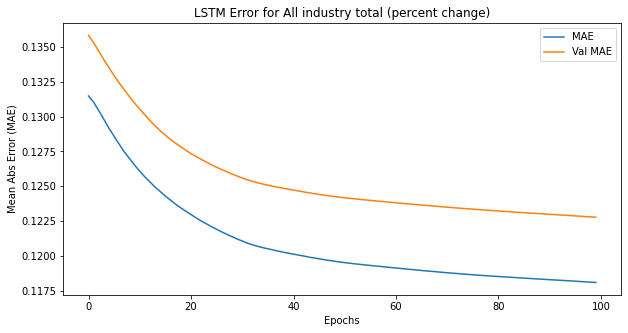

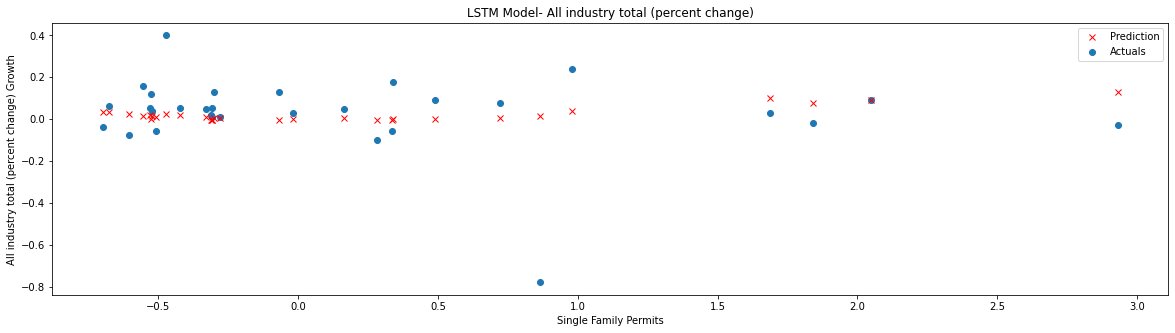

Train on 4095 samples
Epoch 1/100
4095/4095 [==============================] - 2s 419us/sample - loss: 2.8199 - mae: 3.2819
Epoch 2/100
4095/4095 [==============================] - 2s 406us/sample - loss: 2.8173 - mae: 3.2793
Epoch 3/100
4095/4095 [==============================] - 2s 416us/sample - loss: 2.8136 - mae: 3.2755
Epoch 4/100
4095/4095 [==============================] - 2s 412us/sample - loss: 2.8095 - mae: 3.2713
Epoch 5/100
4095/4095 [==============================] - 2s 417us/sample - loss: 2.8054 - mae: 3.2671
Epoch 6/100
4095/4095 [==============================] - 2s 407us/sample - loss: 2.8013 - mae: 3.2630
Epoch 7/100
4095/4095 [==============================] - 2s 409us/sample - loss: 2.7972 - mae: 3.2587
Epoch 8/100
4095/4095 [==============================] - 2s 413us/sample - loss: 2.7932 - mae: 3.2546
Epoch 9/100
4095/4095 [==============================] - 2s 412us/sample - loss: 2.7892 - mae: 3.2505
Epoch 10/100
4095/4095 [==============================] - 2s

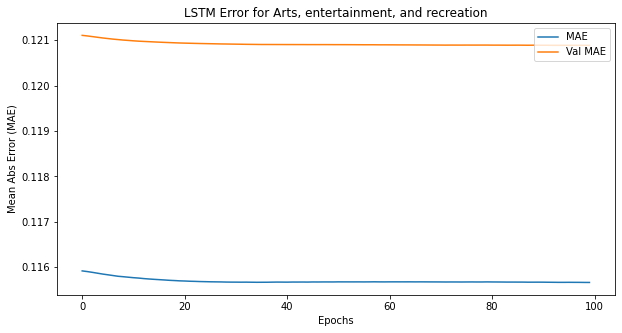

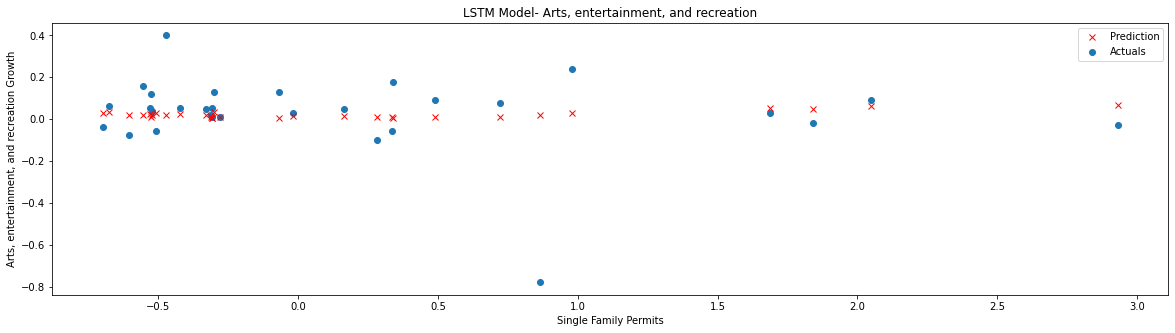

Train on 4095 samples
Epoch 1/100
4095/4095 [==============================] - 2s 417us/sample - loss: 0.0108 - mae: 0.0698
Epoch 2/100
4095/4095 [==============================] - 2s 415us/sample - loss: 0.0108 - mae: 0.0696
Epoch 3/100
4095/4095 [==============================] - 2s 411us/sample - loss: 0.0108 - mae: 0.0694
Epoch 4/100
4095/4095 [==============================] - 2s 412us/sample - loss: 0.0108 - mae: 0.0692
Epoch 5/100
4095/4095 [==============================] - 2s 423us/sample - loss: 0.0108 - mae: 0.0690
Epoch 6/100
4095/4095 [==============================] - 2s 418us/sample - loss: 0.0108 - mae: 0.0689
Epoch 7/100
4095/4095 [==============================] - 2s 412us/sample - loss: 0.0108 - mae: 0.0687
Epoch 8/100
4095/4095 [==============================] - 2s 412us/sample - loss: 0.0107 - mae: 0.0685
Epoch 9/100
4095/4095 [==============================] - 2s 418us/sample - loss: 0.0107 - mae: 0.0684
Epoch 10/100
4095/4095 [==============================] - 2s

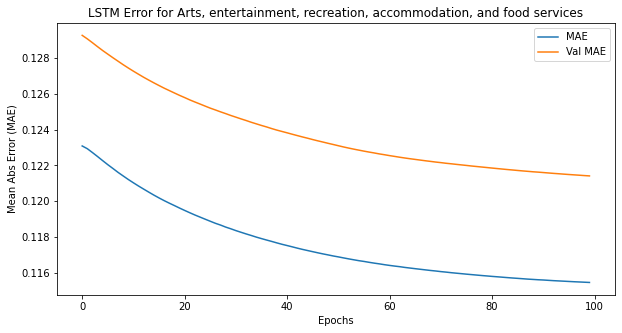

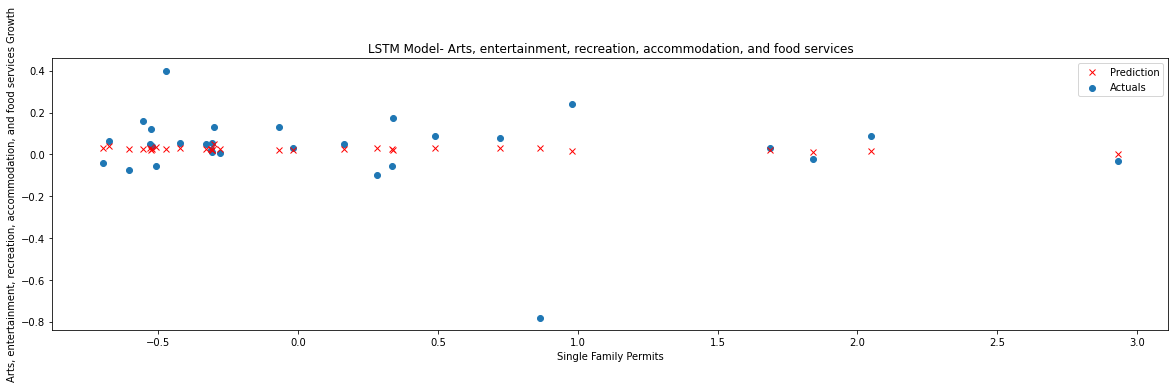

Train on 4095 samples
Epoch 1/100
4095/4095 [==============================] - 2s 421us/sample - loss: 0.0316 - mae: 0.1465
Epoch 2/100
4095/4095 [==============================] - 2s 404us/sample - loss: 0.0316 - mae: 0.1465
Epoch 3/100
4095/4095 [==============================] - 2s 408us/sample - loss: 0.0316 - mae: 0.1464
Epoch 4/100
4095/4095 [==============================] - 2s 411us/sample - loss: 0.0316 - mae: 0.1464
Epoch 5/100
4095/4095 [==============================] - 2s 412us/sample - loss: 0.0316 - mae: 0.1463
Epoch 6/100
4095/4095 [==============================] - 2s 415us/sample - loss: 0.0316 - mae: 0.1463
Epoch 7/100
4095/4095 [==============================] - 2s 411us/sample - loss: 0.0316 - mae: 0.1463
Epoch 8/100
4095/4095 [==============================] - 2s 413us/sample - loss: 0.0316 - mae: 0.1462
Epoch 9/100
4095/4095 [==============================] - 2s 412us/sample - loss: 0.0316 - mae: 0.1462
Epoch 10/100
4095/4095 [==============================] - 2s

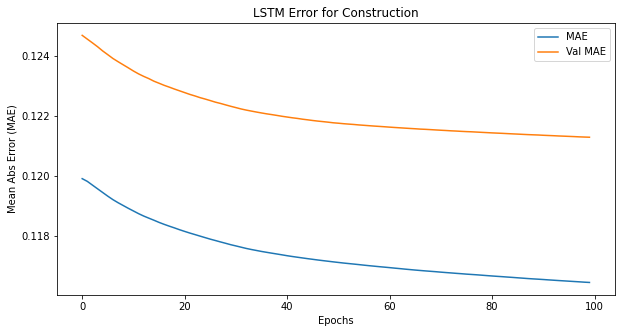

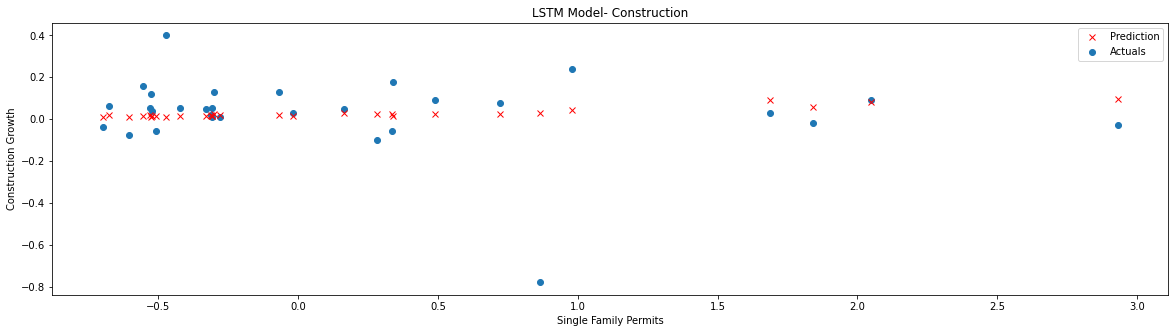

Train on 4095 samples
Epoch 1/100
4095/4095 [==============================] - 2s 429us/sample - loss: 0.2042 - mae: 0.4572
Epoch 2/100
4095/4095 [==============================] - 2s 425us/sample - loss: 0.2041 - mae: 0.4570
Epoch 3/100
4095/4095 [==============================] - 2s 427us/sample - loss: 0.2040 - mae: 0.4568
Epoch 4/100
4095/4095 [==============================] - 2s 434us/sample - loss: 0.2038 - mae: 0.4566
Epoch 5/100
4095/4095 [==============================] - 2s 427us/sample - loss: 0.2036 - mae: 0.4563
Epoch 6/100
4095/4095 [==============================] - 2s 426us/sample - loss: 0.2035 - mae: 0.4561
Epoch 7/100
4095/4095 [==============================] - 2s 431us/sample - loss: 0.2034 - mae: 0.4560
Epoch 8/100
4095/4095 [==============================] - 2s 426us/sample - loss: 0.2032 - mae: 0.4558
Epoch 9/100
4095/4095 [==============================] - 2s 426us/sample - loss: 0.2031 - mae: 0.4556
Epoch 10/100
4095/4095 [==============================] - 2s

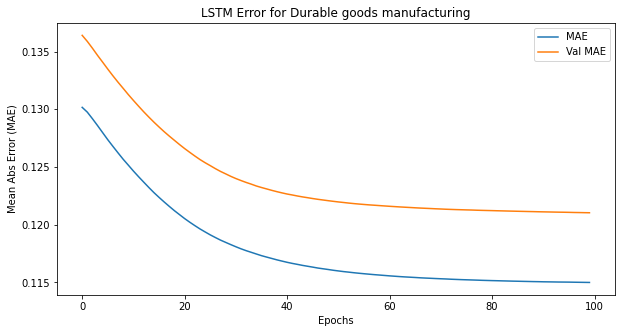

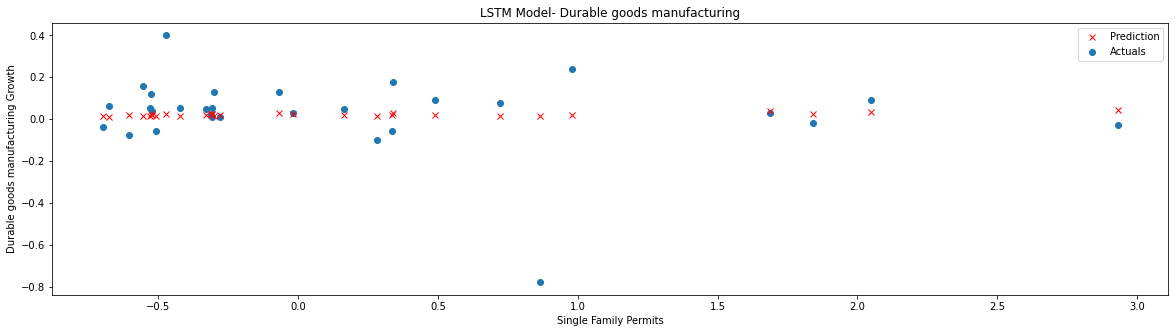

Train on 4095 samples
Epoch 1/100
4095/4095 [==============================] - 2s 434us/sample - loss: 0.5273 - mae: 0.8153
Epoch 2/100
4095/4095 [==============================] - 2s 429us/sample - loss: 0.5272 - mae: 0.8149
Epoch 3/100
4095/4095 [==============================] - 2s 441us/sample - loss: 0.5270 - mae: 0.8145
Epoch 4/100
4095/4095 [==============================] - 2s 428us/sample - loss: 0.5267 - mae: 0.8140
Epoch 5/100
4095/4095 [==============================] - 2s 428us/sample - loss: 0.5265 - mae: 0.8136
Epoch 6/100
4095/4095 [==============================] - 2s 424us/sample - loss: 0.5263 - mae: 0.8132
Epoch 7/100
4095/4095 [==============================] - 2s 428us/sample - loss: 0.5261 - mae: 0.8129
Epoch 8/100
4095/4095 [==============================] - 2s 428us/sample - loss: 0.5259 - mae: 0.8125
Epoch 9/100
4095/4095 [==============================] - 2s 431us/sample - loss: 0.5258 - mae: 0.8122
Epoch 10/100
4095/4095 [==============================] - 2s

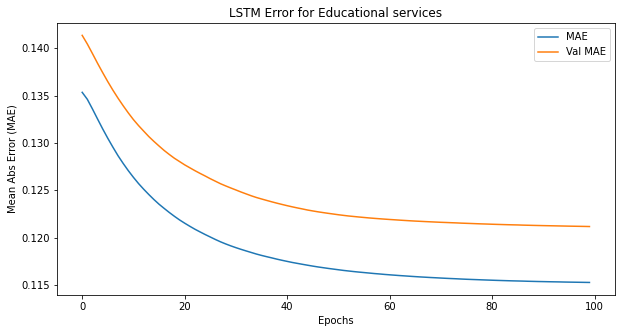

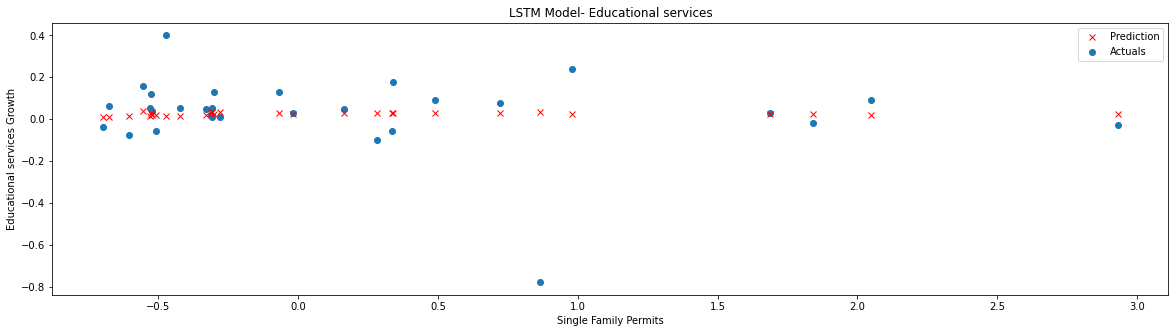

Train on 4095 samples
Epoch 1/100
4095/4095 [==============================] - 2s 429us/sample - loss: 0.0049 - mae: 0.0441
Epoch 2/100
4095/4095 [==============================] - 2s 427us/sample - loss: 0.0049 - mae: 0.0440
Epoch 3/100
4095/4095 [==============================] - 2s 416us/sample - loss: 0.0049 - mae: 0.0439
Epoch 4/100
4095/4095 [==============================] - 2s 416us/sample - loss: 0.0049 - mae: 0.0438
Epoch 5/100
4095/4095 [==============================] - 2s 425us/sample - loss: 0.0049 - mae: 0.0436
Epoch 6/100
4095/4095 [==============================] - 2s 426us/sample - loss: 0.0049 - mae: 0.0435
Epoch 7/100
4095/4095 [==============================] - 2s 424us/sample - loss: 0.0049 - mae: 0.0434
Epoch 8/100
4095/4095 [==============================] - 2s 419us/sample - loss: 0.0049 - mae: 0.0433
Epoch 9/100
4095/4095 [==============================] - 2s 422us/sample - loss: 0.0049 - mae: 0.0432
Epoch 10/100
4095/4095 [==============================] - 2s

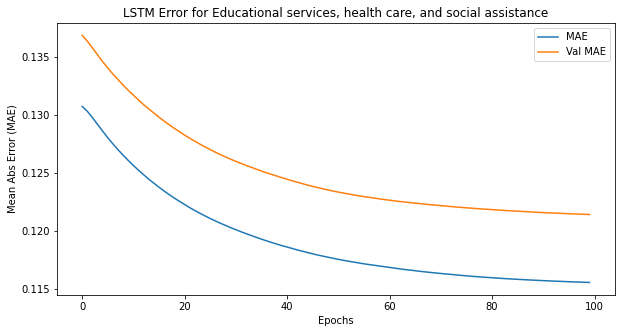

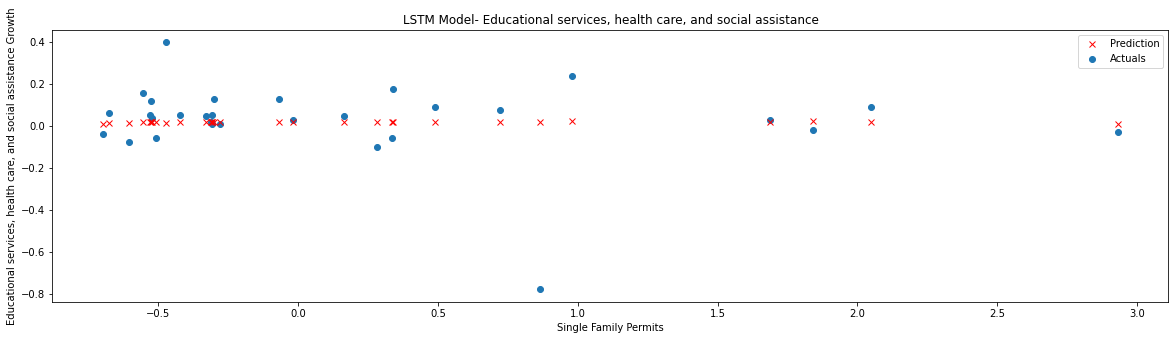

Train on 4095 samples
Epoch 1/100
4095/4095 [==============================] - 2s 429us/sample - loss: 0.0595 - mae: 0.2506
Epoch 2/100
4095/4095 [==============================] - 2s 422us/sample - loss: 0.0592 - mae: 0.2497
Epoch 3/100
4095/4095 [==============================] - 2s 418us/sample - loss: 0.0589 - mae: 0.2485
Epoch 4/100
4095/4095 [==============================] - 2s 420us/sample - loss: 0.0585 - mae: 0.2474
Epoch 5/100
4095/4095 [==============================] - 2s 428us/sample - loss: 0.0581 - mae: 0.2463
Epoch 6/100
4095/4095 [==============================] - 2s 430us/sample - loss: 0.0578 - mae: 0.2453
Epoch 7/100
4095/4095 [==============================] - 2s 420us/sample - loss: 0.0574 - mae: 0.2443
Epoch 8/100
4095/4095 [==============================] - 2s 426us/sample - loss: 0.0571 - mae: 0.2433
Epoch 9/100
4095/4095 [==============================] - 2s 423us/sample - loss: 0.0568 - mae: 0.2424
Epoch 10/100
4095/4095 [==============================] - 2s

In [0]:
################################################ LSTM & DNN
os.chdir(LSTM_img)
var=var_pca
df_pred_lstm=pd.DataFrame()
epoch=100
for label in var_bed:
  model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=64,kernel_size=5,strides=1,padding='causal',activation='relu',input_shape=(16,1)),
    #tf.keras.layers.LSTM(128, input_shape=(16,1),return_sequences=True),
    tf.keras.layers.LSTM(64),#, return_sequences=True),
   # tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
  #tf.keras.layers.Lambda(lambda x: x * 400)
    ])

  optimizer = tf.keras.optimizers.SGD(lr=1e-6, momentum=.99)
  model.compile(loss=tf.keras.losses.Huber(),
                optimizer=optimizer,
                metrics=["mae"])


#ds = ds.map(lambda window: (window[:-1], window[-1:])) #All but the last entry; The last entry
#ds = ds.batch(10).prefetch(1)
  history = model.fit(dt,df_train_label,epochs=epoch,validation_data=(dv,df_val_label))
  plt.figure(figsize=(10, 5))
  plt.plot(np.arange(epoch),history.history["mae"],label="MAE")
  plt.plot(np.arange(epoch),history.history["val_mae"],label="Val MAE")
  plt.legend(loc="upper right")
  plt.title("LSTM Error for {}".format(label))
  plt.xlabel("Epochs")
  plt.ylabel("Mean Abs Error (MAE)")
  plt.savefig("{}.png".format(label))
    #'Total Construction Spending',
  plt_var='Single Family Permits'
  plt.figure(figsize=(20, 5))
  plt.title('LSTM Model- {}'.format(label))
  plt.scatter(df_val[0:30][plt_var], df_val_label[0:30],label="Actuals")
  plt.plot(df_val[0:30][plt_var], model.predict(dv[0:30]),'x',color='r',label="Prediction")
  plt.xlabel(plt_var)
  plt.ylabel("{} Growth".format(label))
  plt.legend(loc="upper right")
  plt.savefig("LSTM_predictions_{}.png".format(label))
  plt.show()
  #########REFIT DATA WITH ENTIRE DATASET
  model.fit(dt_whole,np.array(df_final_rand[label]),epochs=epoch)
  mod=model.predict(dtest)
  df_pred_lstm=pd.concat([df_pred_lstm,pd.DataFrame(mod,columns=[label])],axis=1) ####OUTPUT DATA
  

In [0]:

df_pred_lstm_final=pd.concat([df_complete_pca_test.reset_index()[["Year","Geo (MSA)","State"]],df_pred_lstm],axis=1)
df_pred_lstm_final=df_pred_lstm_final.sort_values(["Geo (MSA)","Year"])

os.chdir(base_dir)
df_pred_lstm_final.to_csv("LSTM_predictions_v2.csv",index=False)

In [0]:
###########################################################################################################################################################################################################
####################################################################################################################################################################################################

Train on 3276 samples, validate on 819 samples
Epoch 1/30
3276/3276 [==============================] - 0s 77us/sample - loss: 0.0467 - mae: 0.2232 - val_loss: 0.0430 - val_mae: 0.2084
Epoch 2/30
3276/3276 [==============================] - 0s 49us/sample - loss: 0.0335 - mae: 0.1793 - val_loss: 0.0340 - val_mae: 0.1700
Epoch 3/30
3276/3276 [==============================] - 0s 48us/sample - loss: 0.0281 - mae: 0.1551 - val_loss: 0.0321 - val_mae: 0.1622
Epoch 4/30
3276/3276 [==============================] - 0s 46us/sample - loss: 0.0269 - mae: 0.1507 - val_loss: 0.0314 - val_mae: 0.1605
Epoch 5/30
3276/3276 [==============================] - 0s 47us/sample - loss: 0.0260 - mae: 0.1467 - val_loss: 0.0304 - val_mae: 0.1555
Epoch 6/30
3276/3276 [==============================] - 0s 43us/sample - loss: 0.0251 - mae: 0.1423 - val_loss: 0.0298 - val_mae: 0.1522
Epoch 7/30
3276/3276 [==============================] - 0s 47us/sample - loss: 0.0246 - mae: 0.1396 - val_loss: 0.0293 - val_mae: 0

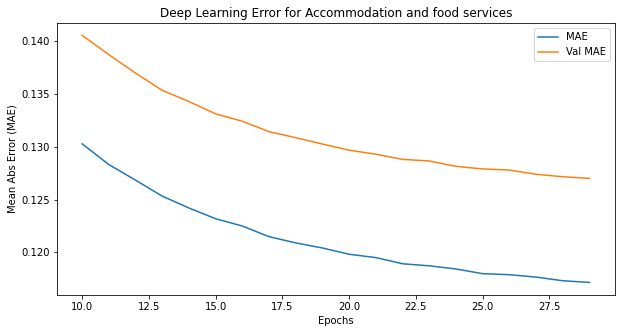

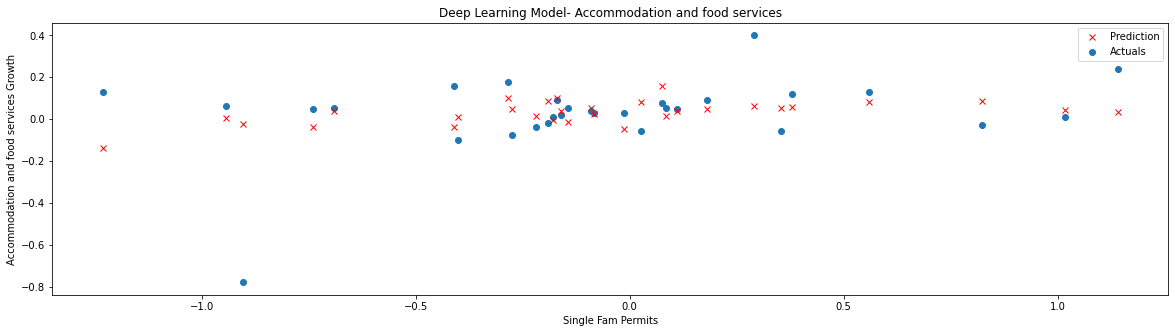

Train on 4095 samples
4095/4095 [==============================] - 0s 39us/sample - loss: 0.0214 - mae: 0.1190
Train on 3276 samples, validate on 819 samples
Epoch 1/30
3276/3276 [==============================] - 0s 75us/sample - loss: 0.1840 - mae: 0.4653 - val_loss: 0.1228 - val_mae: 0.4207
Epoch 2/30
3276/3276 [==============================] - 0s 49us/sample - loss: 0.0743 - mae: 0.3027 - val_loss: 0.0379 - val_mae: 0.2027
Epoch 3/30
3276/3276 [==============================] - 0s 44us/sample - loss: 0.0413 - mae: 0.2162 - val_loss: 0.0373 - val_mae: 0.2014
Epoch 4/30
3276/3276 [==============================] - 0s 44us/sample - loss: 0.0350 - mae: 0.1898 - val_loss: 0.0361 - val_mae: 0.1962
Epoch 5/30
3276/3276 [==============================] - 0s 47us/sample - loss: 0.0297 - mae: 0.1715 - val_loss: 0.0316 - val_mae: 0.1780
Epoch 6/30
3276/3276 [==============================] - 0s 48us/sample - loss: 0.0284 - mae: 0.1657 - val_loss: 0.0311 - val_mae: 0.1767
Epoch 7/30
3276/3276

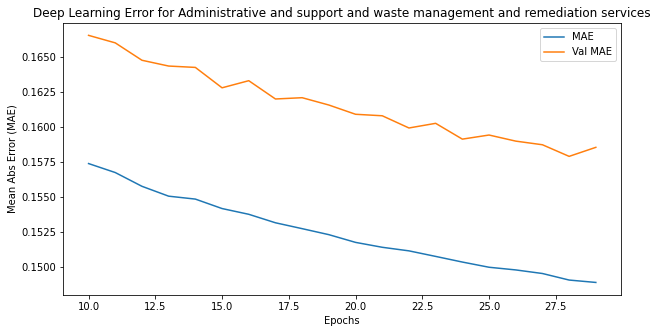

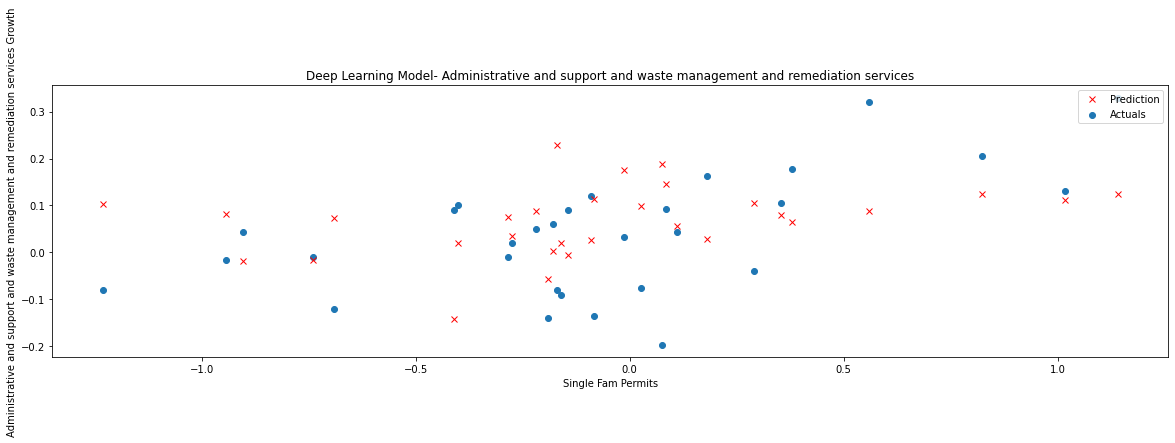

Train on 4095 samples
4095/4095 [==============================] - 0s 38us/sample - loss: 0.0249 - mae: 0.1504
Train on 3276 samples, validate on 819 samples
Epoch 1/30
3276/3276 [==============================] - 0s 76us/sample - loss: 0.7521 - mae: 1.1076 - val_loss: 0.6838 - val_mae: 1.0442
Epoch 2/30
3276/3276 [==============================] - 0s 45us/sample - loss: 0.6302 - mae: 0.9726 - val_loss: 0.5838 - val_mae: 0.8499
Epoch 3/30
3276/3276 [==============================] - 0s 49us/sample - loss: 0.5795 - mae: 0.8722 - val_loss: 0.5829 - val_mae: 0.8567
Epoch 4/30
3276/3276 [==============================] - 0s 46us/sample - loss: 0.5653 - mae: 0.8443 - val_loss: 0.5940 - val_mae: 0.8783
Epoch 5/30
3276/3276 [==============================] - 0s 46us/sample - loss: 0.5615 - mae: 0.8328 - val_loss: 0.5791 - val_mae: 0.8418
Epoch 6/30
3276/3276 [==============================] - 0s 48us/sample - loss: 0.5587 - mae: 0.8260 - val_loss: 0.5811 - val_mae: 0.8445
Epoch 7/30
3276/3276

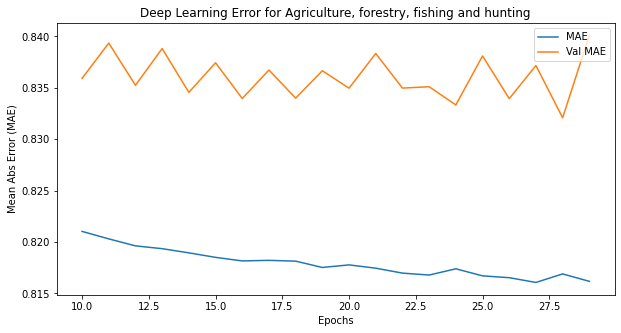

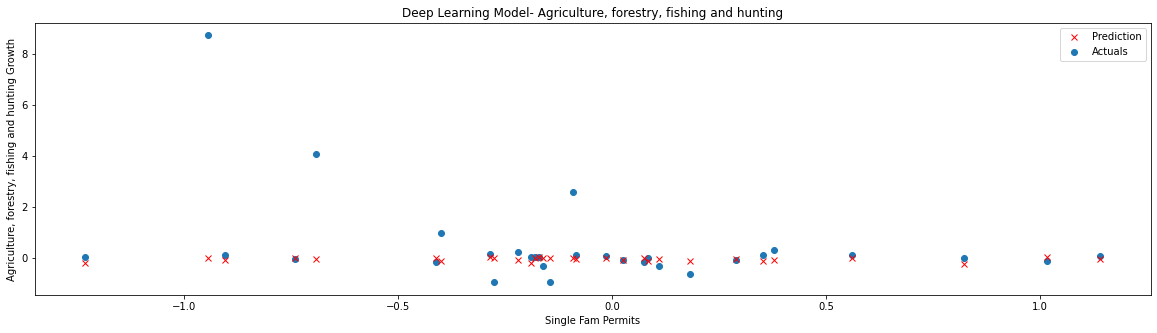

Train on 4095 samples
4095/4095 [==============================] - 0s 38us/sample - loss: 0.5590 - mae: 0.8198
Train on 3276 samples, validate on 819 samples
Epoch 1/30
3276/3276 [==============================] - 0s 77us/sample - loss: 2.6647 - mae: 3.1223 - val_loss: 2.7138 - val_mae: 3.1720
Epoch 2/30
3276/3276 [==============================] - 0s 46us/sample - loss: 2.5677 - mae: 3.0222 - val_loss: 2.6718 - val_mae: 3.1295
Epoch 3/30
3276/3276 [==============================] - 0s 45us/sample - loss: 2.5460 - mae: 2.9981 - val_loss: 2.6676 - val_mae: 3.1253
Epoch 4/30
3276/3276 [==============================] - 0s 48us/sample - loss: 2.5391 - mae: 2.9918 - val_loss: 2.6569 - val_mae: 3.1146
Epoch 5/30
3276/3276 [==============================] - 0s 46us/sample - loss: 2.5329 - mae: 2.9858 - val_loss: 2.6486 - val_mae: 3.1065
Epoch 6/30
3276/3276 [==============================] - 0s 49us/sample - loss: 2.5293 - mae: 2.9822 - val_loss: 2.6438 - val_mae: 3.1015
Epoch 7/30
3276/3276

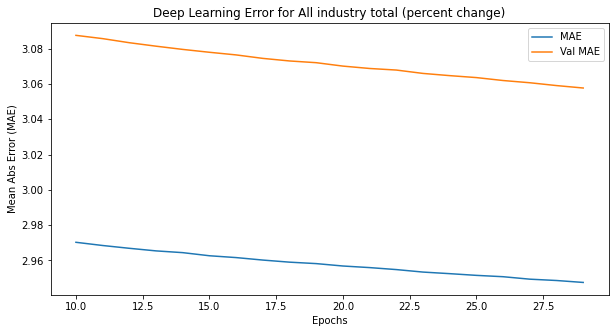

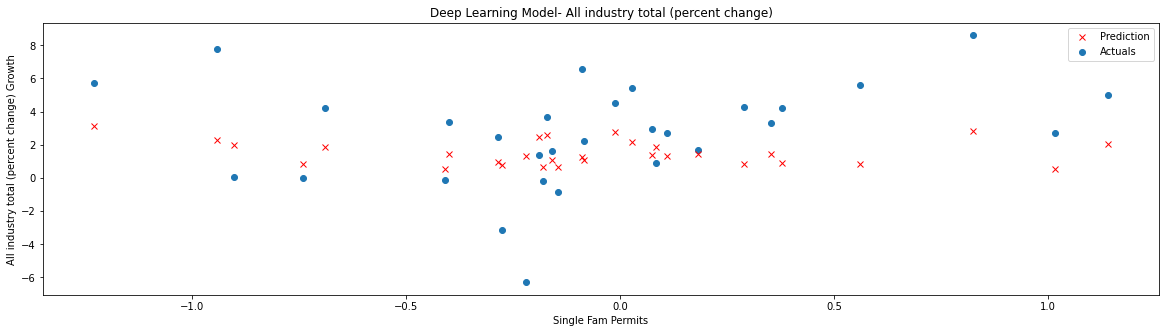

Train on 4095 samples
4095/4095 [==============================] - 0s 39us/sample - loss: 2.5165 - mae: 2.9687
Train on 3276 samples, validate on 819 samples
Epoch 1/30
3276/3276 [==============================] - 0s 78us/sample - loss: 0.1218 - mae: 0.3188 - val_loss: 0.0688 - val_mae: 0.3018
Epoch 2/30
3276/3276 [==============================] - 0s 46us/sample - loss: 0.0463 - mae: 0.2330 - val_loss: 0.0201 - val_mae: 0.1329
Epoch 3/30
3276/3276 [==============================] - 0s 46us/sample - loss: 0.0244 - mae: 0.1527 - val_loss: 0.0227 - val_mae: 0.1548
Epoch 4/30
3276/3276 [==============================] - 0s 47us/sample - loss: 0.0226 - mae: 0.1410 - val_loss: 0.0189 - val_mae: 0.1291
Epoch 5/30
3276/3276 [==============================] - 0s 51us/sample - loss: 0.0185 - mae: 0.1194 - val_loss: 0.0150 - val_mae: 0.1112
Epoch 6/30
3276/3276 [==============================] - 0s 46us/sample - loss: 0.0166 - mae: 0.1099 - val_loss: 0.0136 - val_mae: 0.1012
Epoch 7/30
3276/3276

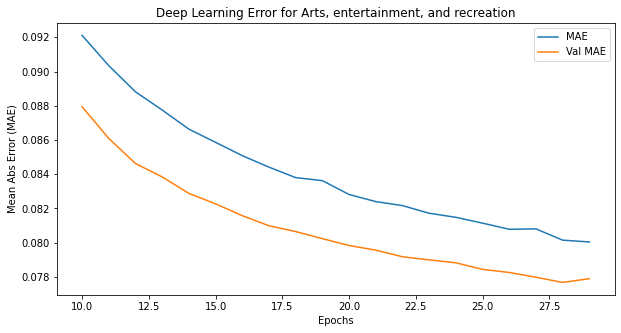

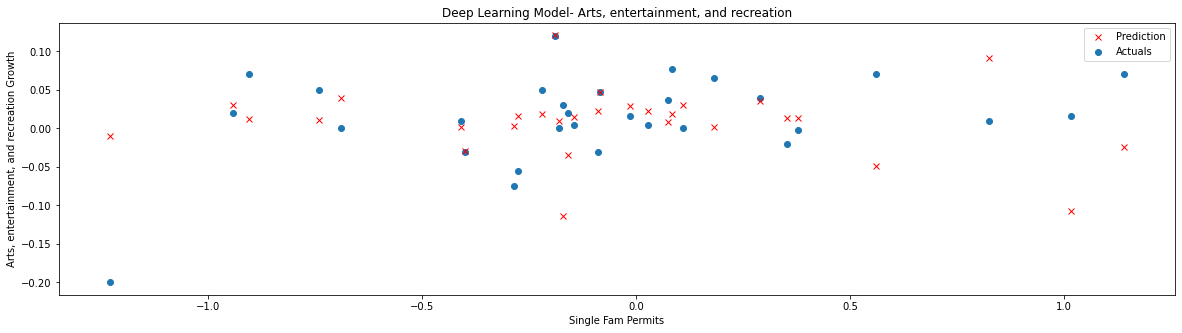

Train on 4095 samples
4095/4095 [==============================] - 0s 41us/sample - loss: 0.0116 - mae: 0.0793
Train on 3276 samples, validate on 819 samples
Epoch 1/30
3276/3276 [==============================] - 0s 126us/sample - loss: 0.0560 - mae: 0.2347 - val_loss: 0.0472 - val_mae: 0.2064
Epoch 2/30
3276/3276 [==============================] - 0s 49us/sample - loss: 0.0447 - mae: 0.1960 - val_loss: 0.0392 - val_mae: 0.1775
Epoch 3/30
3276/3276 [==============================] - 0s 44us/sample - loss: 0.0387 - mae: 0.1757 - val_loss: 0.0371 - val_mae: 0.1693
Epoch 4/30
3276/3276 [==============================] - 0s 44us/sample - loss: 0.0359 - mae: 0.1639 - val_loss: 0.0357 - val_mae: 0.1641
Epoch 5/30
3276/3276 [==============================] - 0s 47us/sample - loss: 0.0343 - mae: 0.1586 - val_loss: 0.0348 - val_mae: 0.1606
Epoch 6/30
3276/3276 [==============================] - 0s 47us/sample - loss: 0.0334 - mae: 0.1549 - val_loss: 0.0342 - val_mae: 0.1579
Epoch 7/30
3276/327

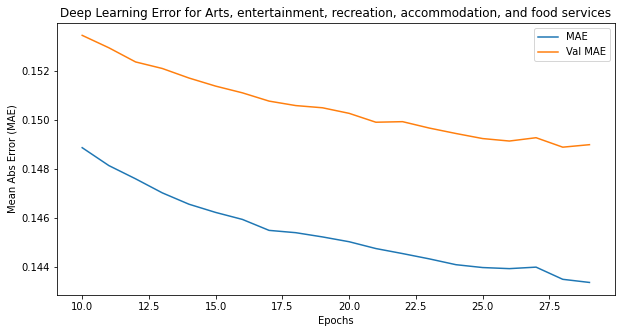

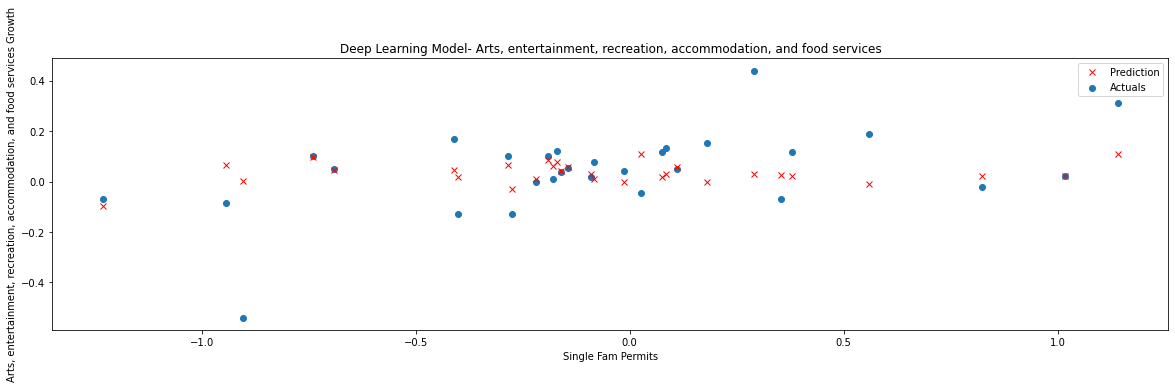

Train on 4095 samples
4095/4095 [==============================] - 0s 40us/sample - loss: 0.0309 - mae: 0.1445
Train on 3276 samples, validate on 819 samples
Epoch 1/30
3276/3276 [==============================] - 0s 82us/sample - loss: 0.2170 - mae: 0.4836 - val_loss: 0.2369 - val_mae: 0.5170
Epoch 2/30
3276/3276 [==============================] - 0s 47us/sample - loss: 0.2110 - mae: 0.4744 - val_loss: 0.2313 - val_mae: 0.5056
Epoch 3/30
3276/3276 [==============================] - 0s 45us/sample - loss: 0.2060 - mae: 0.4650 - val_loss: 0.2264 - val_mae: 0.4962
Epoch 4/30
3276/3276 [==============================] - 0s 48us/sample - loss: 0.2015 - mae: 0.4555 - val_loss: 0.2230 - val_mae: 0.4894
Epoch 5/30
3276/3276 [==============================] - 0s 48us/sample - loss: 0.1986 - mae: 0.4497 - val_loss: 0.2200 - val_mae: 0.4843
Epoch 6/30
3276/3276 [==============================] - 0s 48us/sample - loss: 0.1965 - mae: 0.4463 - val_loss: 0.2183 - val_mae: 0.4815
Epoch 7/30
3276/3276

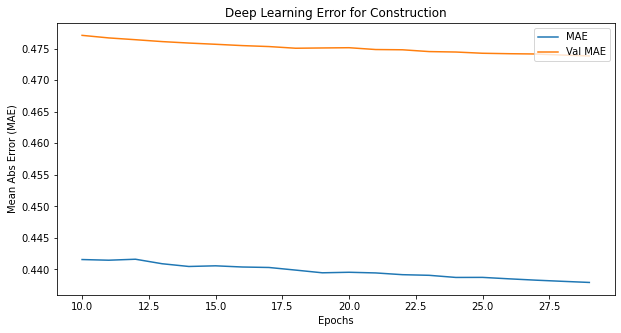

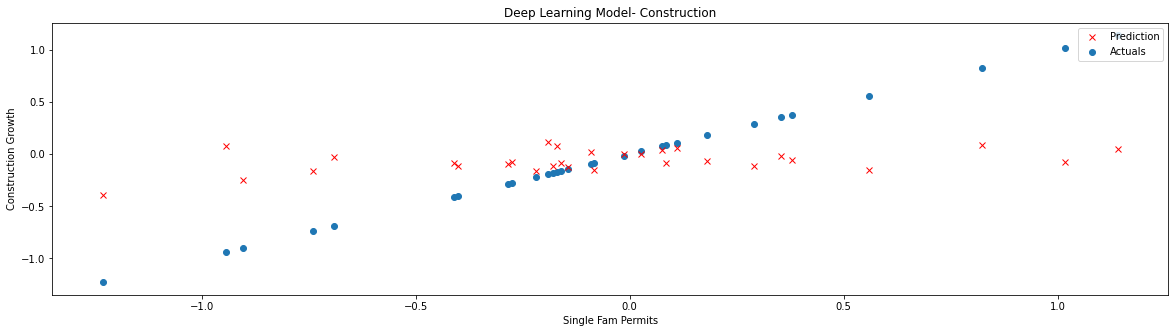

Train on 4095 samples
4095/4095 [==============================] - 0s 40us/sample - loss: 0.1949 - mae: 0.4451
Train on 3276 samples, validate on 819 samples
Epoch 1/30
3276/3276 [==============================] - 0s 79us/sample - loss: 0.8558 - mae: 1.2452 - val_loss: 0.5487 - val_mae: 0.8856
Epoch 2/30
3276/3276 [==============================] - 0s 48us/sample - loss: 0.6536 - mae: 1.0125 - val_loss: 0.5004 - val_mae: 0.8006
Epoch 3/30
3276/3276 [==============================] - 0s 46us/sample - loss: 0.5628 - mae: 0.8795 - val_loss: 0.5254 - val_mae: 0.8524
Epoch 4/30
3276/3276 [==============================] - 0s 48us/sample - loss: 0.5445 - mae: 0.8446 - val_loss: 0.4928 - val_mae: 0.7865
Epoch 5/30
3276/3276 [==============================] - 0s 44us/sample - loss: 0.5409 - mae: 0.8337 - val_loss: 0.4857 - val_mae: 0.7751
Epoch 6/30
3276/3276 [==============================] - 0s 44us/sample - loss: 0.5361 - mae: 0.8289 - val_loss: 0.4871 - val_mae: 0.7824
Epoch 7/30
3276/3276

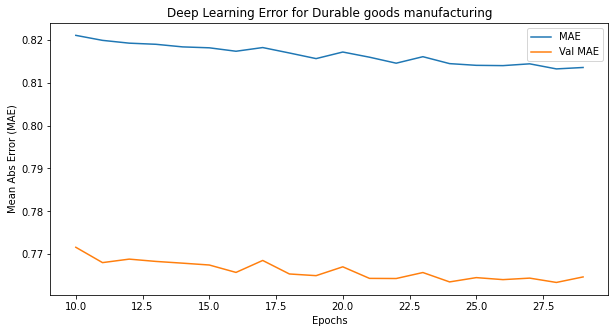

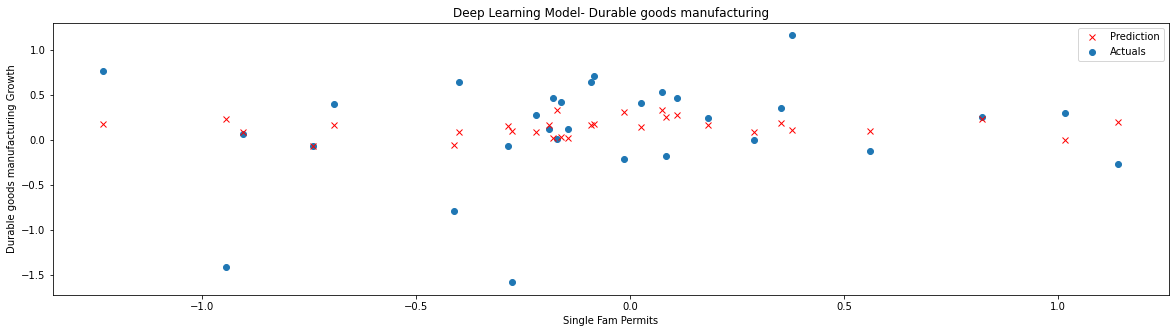

Train on 4095 samples
4095/4095 [==============================] - 0s 40us/sample - loss: 0.5172 - mae: 0.8031
Train on 3276 samples, validate on 819 samples
Epoch 1/30
3276/3276 [==============================] - 0s 74us/sample - loss: 0.0854 - mae: 0.2729 - val_loss: 0.0464 - val_mae: 0.2324
Epoch 2/30
3276/3276 [==============================] - 0s 46us/sample - loss: 0.0331 - mae: 0.1995 - val_loss: 0.0169 - val_mae: 0.1128
Epoch 3/30
3276/3276 [==============================] - 0s 46us/sample - loss: 0.0144 - mae: 0.1190 - val_loss: 0.0187 - val_mae: 0.1330
Epoch 4/30
3276/3276 [==============================] - 0s 47us/sample - loss: 0.0120 - mae: 0.0976 - val_loss: 0.0148 - val_mae: 0.0981
Epoch 5/30
3276/3276 [==============================] - 0s 46us/sample - loss: 0.0100 - mae: 0.0841 - val_loss: 0.0124 - val_mae: 0.0820
Epoch 6/30
3276/3276 [==============================] - 0s 47us/sample - loss: 0.0087 - mae: 0.0762 - val_loss: 0.0117 - val_mae: 0.0783
Epoch 7/30
3276/3276

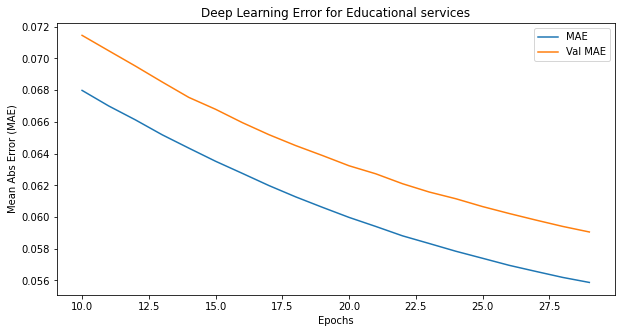

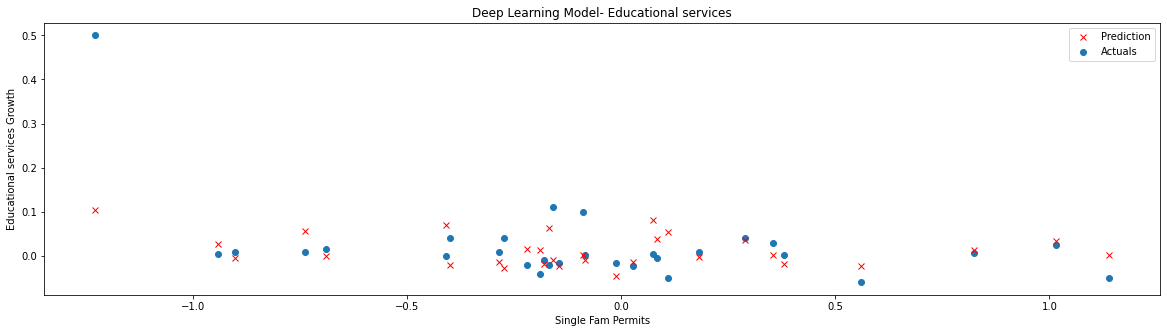

Train on 4095 samples
4095/4095 [==============================] - 0s 38us/sample - loss: 0.0060 - mae: 0.0562
Train on 3276 samples, validate on 819 samples
Epoch 1/30
3276/3276 [==============================] - 0s 78us/sample - loss: 0.1169 - mae: 0.3464 - val_loss: 0.0797 - val_mae: 0.2993
Epoch 2/30
3276/3276 [==============================] - 0s 48us/sample - loss: 0.0687 - mae: 0.2861 - val_loss: 0.0669 - val_mae: 0.2758
Epoch 3/30
3276/3276 [==============================] - 0s 46us/sample - loss: 0.0546 - mae: 0.2468 - val_loss: 0.0539 - val_mae: 0.2322
Epoch 4/30
3276/3276 [==============================] - 0s 47us/sample - loss: 0.0494 - mae: 0.2262 - val_loss: 0.0528 - val_mae: 0.2270
Epoch 5/30
3276/3276 [==============================] - 0s 51us/sample - loss: 0.0483 - mae: 0.2250 - val_loss: 0.0524 - val_mae: 0.2291
Epoch 6/30
3276/3276 [==============================] - 0s 51us/sample - loss: 0.0480 - mae: 0.2262 - val_loss: 0.0525 - val_mae: 0.2298
Epoch 7/30
3276/3276

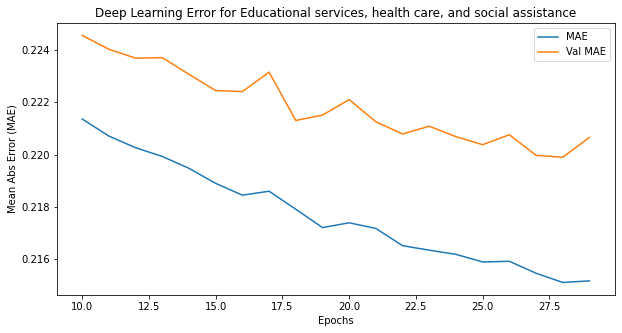

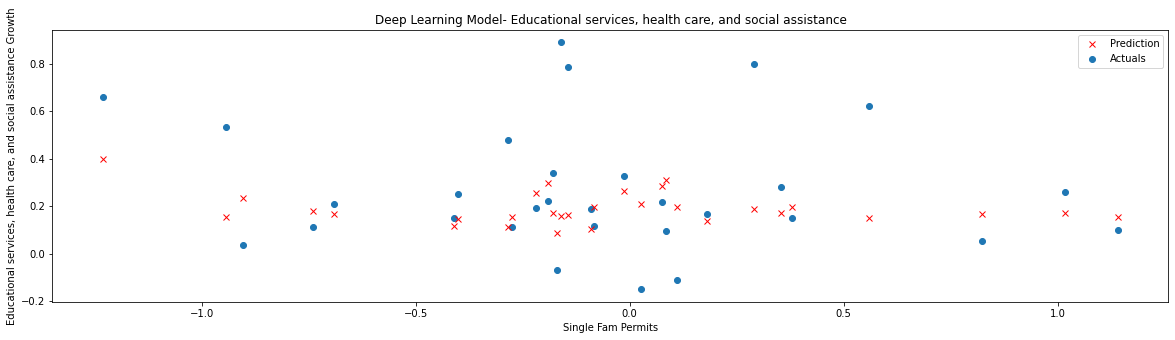

Train on 4095 samples
4095/4095 [==============================] - 0s 40us/sample - loss: 0.0461 - mae: 0.2161
Train on 3276 samples, validate on 819 samples
Epoch 1/30
3276/3276 [==============================] - 0s 83us/sample - loss: 0.1468 - mae: 0.3830 - val_loss: 0.1354 - val_mae: 0.3650
Epoch 2/30
3276/3276 [==============================] - 0s 47us/sample - loss: 0.1424 - mae: 0.3704 - val_loss: 0.1318 - val_mae: 0.3539
Epoch 3/30
3276/3276 [==============================] - 0s 48us/sample - loss: 0.1395 - mae: 0.3623 - val_loss: 0.1299 - val_mae: 0.3496
Epoch 4/30
3276/3276 [==============================] - 0s 48us/sample - loss: 0.1375 - mae: 0.3571 - val_loss: 0.1291 - val_mae: 0.3474
Epoch 5/30
3276/3276 [==============================] - 0s 46us/sample - loss: 0.1365 - mae: 0.3545 - val_loss: 0.1285 - val_mae: 0.3462
Epoch 6/30
3276/3276 [==============================] - 0s 50us/sample - loss: 0.1358 - mae: 0.3528 - val_loss: 0.1280 - val_mae: 0.3452
Epoch 7/30
3276/3276

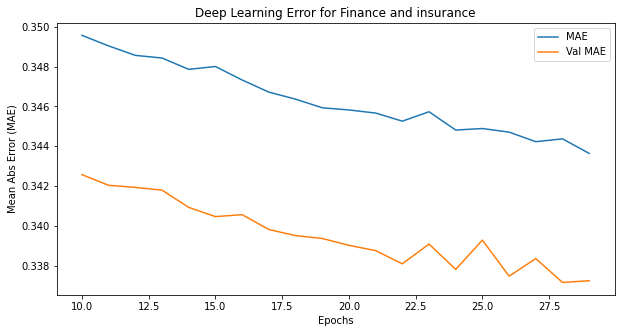

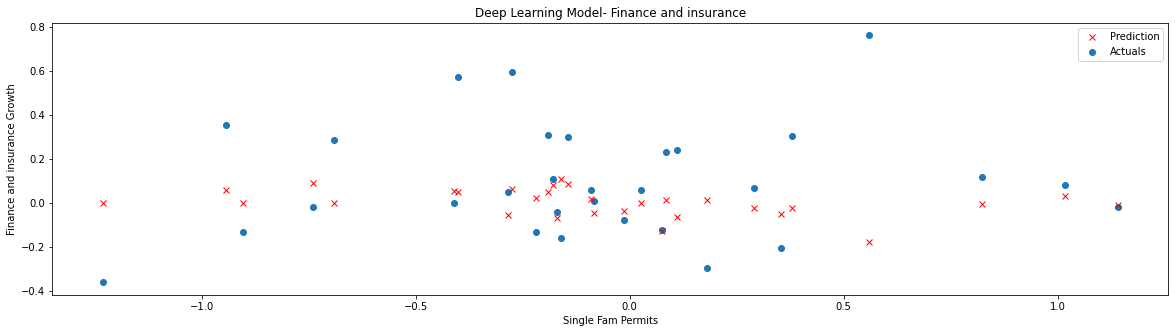

Train on 4095 samples
4095/4095 [==============================] - 0s 40us/sample - loss: 0.1304 - mae: 0.3423
Train on 3276 samples, validate on 819 samples
Epoch 1/30
3276/3276 [==============================] - 0s 76us/sample - loss: 0.6652 - mae: 1.0590 - val_loss: 0.5033 - val_mae: 0.8540
Epoch 2/30
3276/3276 [==============================] - 0s 48us/sample - loss: 0.4947 - mae: 0.8405 - val_loss: 0.4617 - val_mae: 0.7991
Epoch 3/30
3276/3276 [==============================] - 0s 49us/sample - loss: 0.4339 - mae: 0.7642 - val_loss: 0.4579 - val_mae: 0.7996
Epoch 4/30
3276/3276 [==============================] - 0s 46us/sample - loss: 0.4339 - mae: 0.7652 - val_loss: 0.4441 - val_mae: 0.7771
Epoch 5/30
3276/3276 [==============================] - 0s 45us/sample - loss: 0.4288 - mae: 0.7528 - val_loss: 0.4424 - val_mae: 0.7743
Epoch 6/30
3276/3276 [==============================] - 0s 50us/sample - loss: 0.4246 - mae: 0.7501 - val_loss: 0.4407 - val_mae: 0.7737
Epoch 7/30
3276/3276

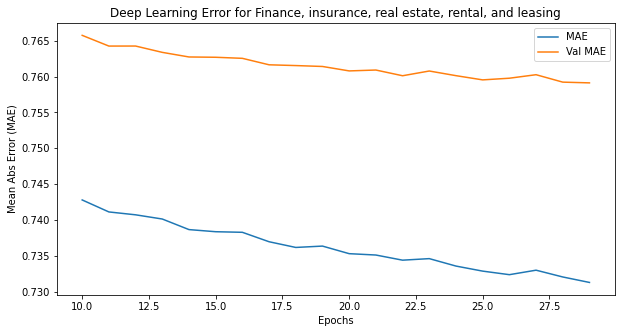

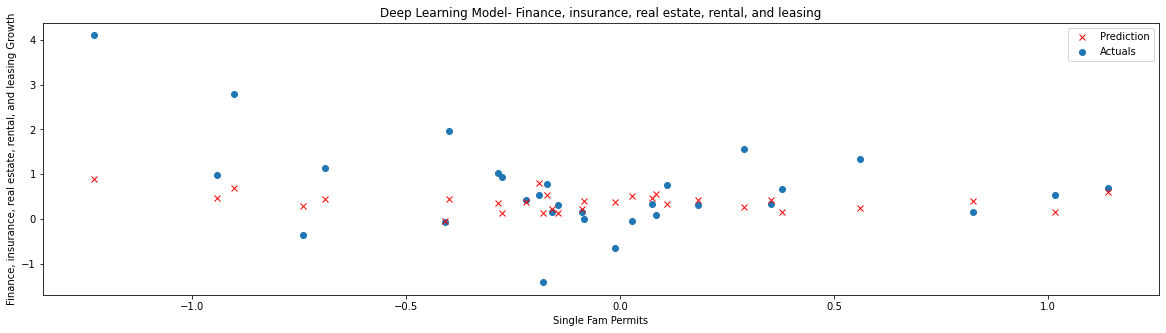

Train on 4095 samples
4095/4095 [==============================] - 0s 40us/sample - loss: 0.4141 - mae: 0.7370
Train on 3276 samples, validate on 819 samples
Epoch 1/30
3276/3276 [==============================] - 0s 80us/sample - loss: 0.1952 - mae: 0.4605 - val_loss: 0.1961 - val_mae: 0.4692
Epoch 2/30
3276/3276 [==============================] - 0s 46us/sample - loss: 0.1782 - mae: 0.4310 - val_loss: 0.1738 - val_mae: 0.4185
Epoch 3/30
3276/3276 [==============================] - 0s 50us/sample - loss: 0.1694 - mae: 0.4112 - val_loss: 0.1664 - val_mae: 0.4066
Epoch 4/30
3276/3276 [==============================] - 0s 46us/sample - loss: 0.1640 - mae: 0.3993 - val_loss: 0.1600 - val_mae: 0.3896
Epoch 5/30
3276/3276 [==============================] - 0s 47us/sample - loss: 0.1603 - mae: 0.3917 - val_loss: 0.1576 - val_mae: 0.3849
Epoch 6/30
3276/3276 [==============================] - 0s 48us/sample - loss: 0.1587 - mae: 0.3886 - val_loss: 0.1551 - val_mae: 0.3780
Epoch 7/30
3276/3276

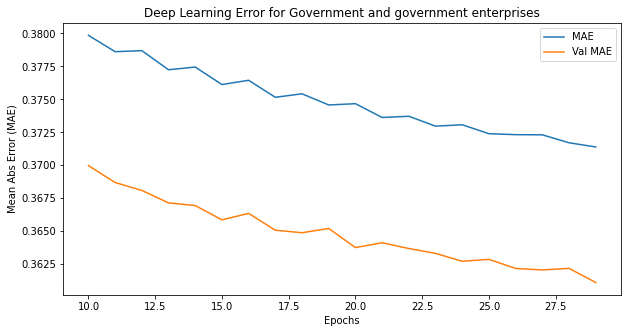

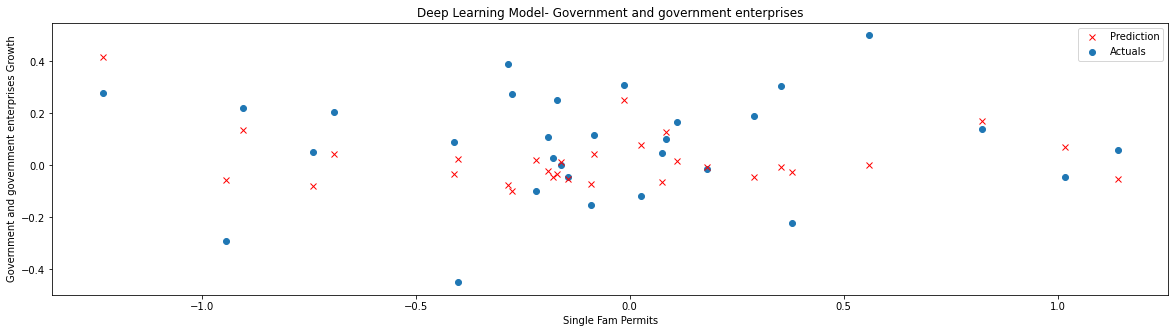

Train on 4095 samples
4095/4095 [==============================] - 0s 40us/sample - loss: 0.1504 - mae: 0.3693
Train on 3276 samples, validate on 819 samples
Epoch 1/30
3276/3276 [==============================] - 0s 82us/sample - loss: 0.0627 - mae: 0.2640 - val_loss: 0.0585 - val_mae: 0.2507
Epoch 2/30
3276/3276 [==============================] - 0s 46us/sample - loss: 0.0529 - mae: 0.2428 - val_loss: 0.0517 - val_mae: 0.2349
Epoch 3/30
3276/3276 [==============================] - 0s 48us/sample - loss: 0.0487 - mae: 0.2325 - val_loss: 0.0496 - val_mae: 0.2282
Epoch 4/30
3276/3276 [==============================] - 0s 47us/sample - loss: 0.0467 - mae: 0.2261 - val_loss: 0.0479 - val_mae: 0.2226
Epoch 5/30
3276/3276 [==============================] - 0s 50us/sample - loss: 0.0449 - mae: 0.2211 - val_loss: 0.0463 - val_mae: 0.2185
Epoch 6/30
3276/3276 [==============================] - 0s 51us/sample - loss: 0.0436 - mae: 0.2164 - val_loss: 0.0453 - val_mae: 0.2146
Epoch 7/30
3276/3276

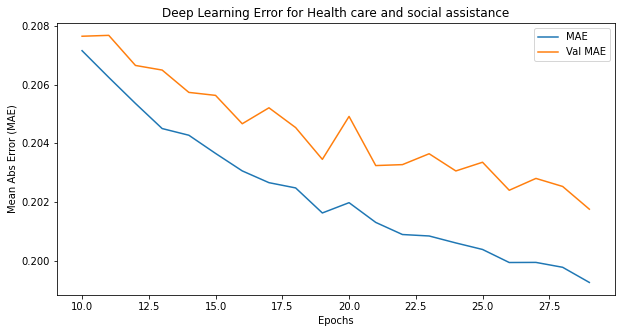

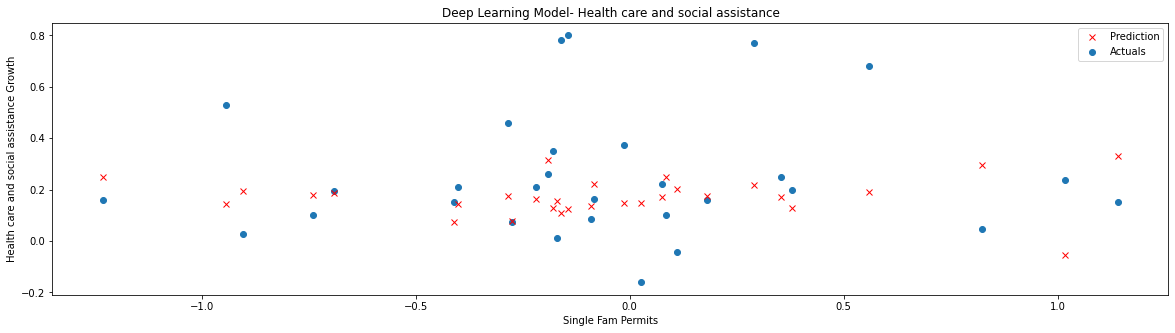

Train on 4095 samples
4095/4095 [==============================] - 0s 37us/sample - loss: 0.0389 - mae: 0.2000
Train on 3276 samples, validate on 819 samples
Epoch 1/30
3276/3276 [==============================] - 0s 80us/sample - loss: 0.1736 - mae: 0.4646 - val_loss: 0.1690 - val_mae: 0.4877
Epoch 2/30
3276/3276 [==============================] - 0s 47us/sample - loss: 0.0999 - mae: 0.3309 - val_loss: 0.1024 - val_mae: 0.3421
Epoch 3/30
3276/3276 [==============================] - 0s 46us/sample - loss: 0.0720 - mae: 0.2604 - val_loss: 0.0768 - val_mae: 0.2741
Epoch 4/30
3276/3276 [==============================] - 0s 47us/sample - loss: 0.0637 - mae: 0.2306 - val_loss: 0.0710 - val_mae: 0.2445
Epoch 5/30
3276/3276 [==============================] - 0s 48us/sample - loss: 0.0612 - mae: 0.2253 - val_loss: 0.0679 - val_mae: 0.2389
Epoch 6/30
3276/3276 [==============================] - 0s 47us/sample - loss: 0.0604 - mae: 0.2175 - val_loss: 0.0667 - val_mae: 0.2293
Epoch 7/30
3276/3276

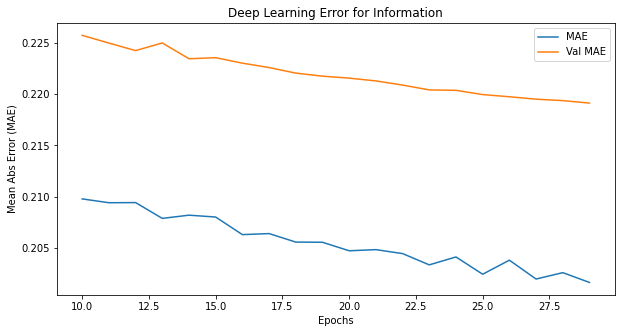

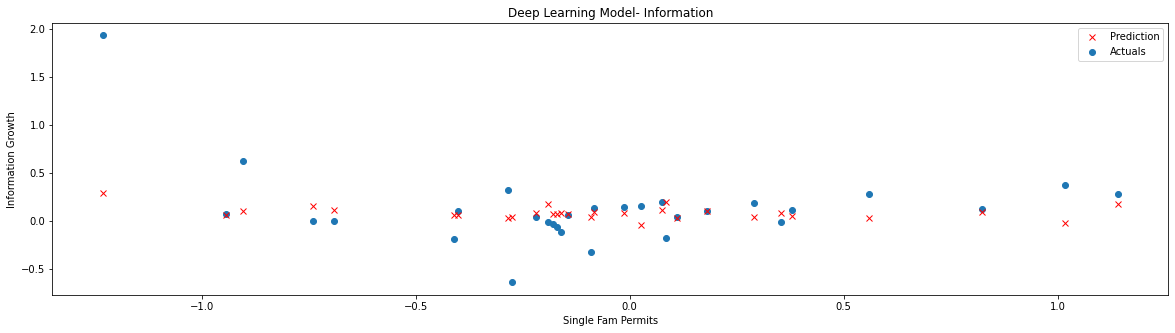

Train on 4095 samples
4095/4095 [==============================] - 0s 39us/sample - loss: 0.0575 - mae: 0.2059
Train on 3276 samples, validate on 819 samples
Epoch 1/30
3276/3276 [==============================] - 0s 136us/sample - loss: 0.1137 - mae: 0.3324 - val_loss: 0.0647 - val_mae: 0.2798
Epoch 2/30
3276/3276 [==============================] - 0s 50us/sample - loss: 0.0678 - mae: 0.2625 - val_loss: 0.0380 - val_mae: 0.1699
Epoch 3/30
3276/3276 [==============================] - 0s 45us/sample - loss: 0.0533 - mae: 0.2115 - val_loss: 0.0407 - val_mae: 0.1876
Epoch 4/30
3276/3276 [==============================] - 0s 48us/sample - loss: 0.0492 - mae: 0.1871 - val_loss: 0.0384 - val_mae: 0.1704
Epoch 5/30
3276/3276 [==============================] - 0s 46us/sample - loss: 0.0472 - mae: 0.1777 - val_loss: 0.0355 - val_mae: 0.1606
Epoch 6/30
3276/3276 [==============================] - 0s 47us/sample - loss: 0.0462 - mae: 0.1748 - val_loss: 0.0349 - val_mae: 0.1562
Epoch 7/30
3276/327

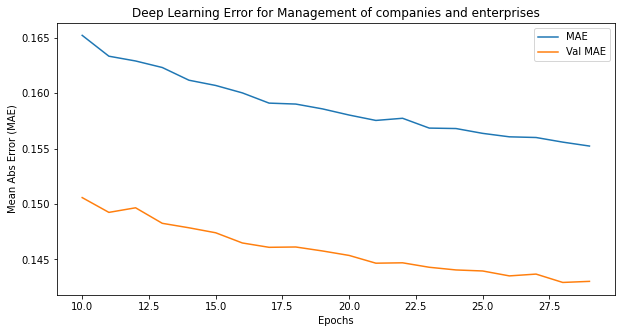

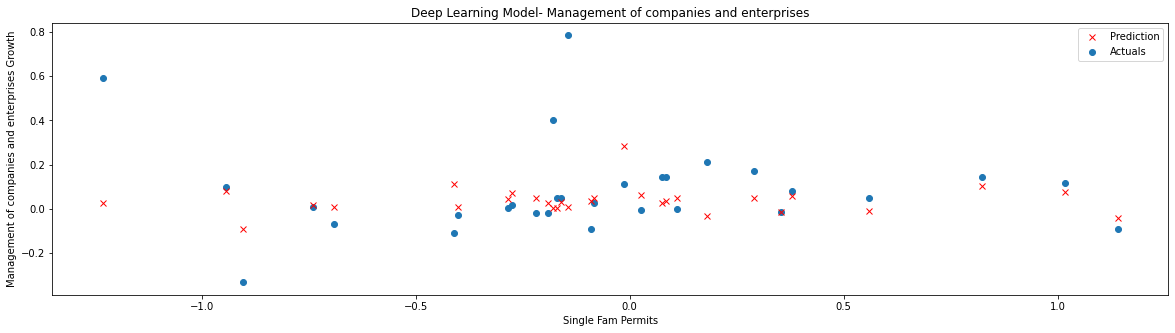

Train on 4095 samples
4095/4095 [==============================] - 0s 38us/sample - loss: 0.0403 - mae: 0.1530
Train on 3276 samples, validate on 819 samples
Epoch 1/30
3276/3276 [==============================] - 0s 82us/sample - loss: 0.9123 - mae: 1.2731 - val_loss: 0.8627 - val_mae: 1.2153
Epoch 2/30
3276/3276 [==============================] - 0s 48us/sample - loss: 0.9007 - mae: 1.2592 - val_loss: 0.8570 - val_mae: 1.2054
Epoch 3/30
3276/3276 [==============================] - 0s 45us/sample - loss: 0.8967 - mae: 1.2531 - val_loss: 0.8555 - val_mae: 1.2040
Epoch 4/30
3276/3276 [==============================] - 0s 49us/sample - loss: 0.8939 - mae: 1.2490 - val_loss: 0.8525 - val_mae: 1.1997
Epoch 5/30
3276/3276 [==============================] - 0s 48us/sample - loss: 0.8915 - mae: 1.2450 - val_loss: 0.8506 - val_mae: 1.1968
Epoch 6/30
3276/3276 [==============================] - 0s 49us/sample - loss: 0.8901 - mae: 1.2430 - val_loss: 0.8492 - val_mae: 1.1952
Epoch 7/30
3276/3276

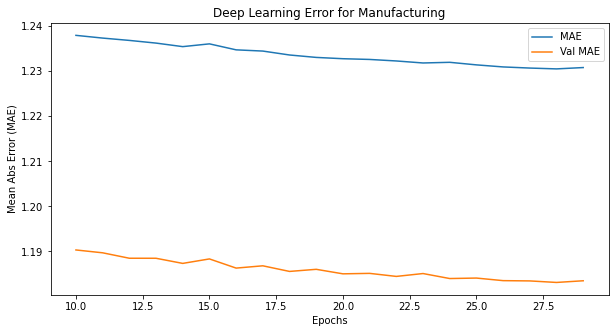

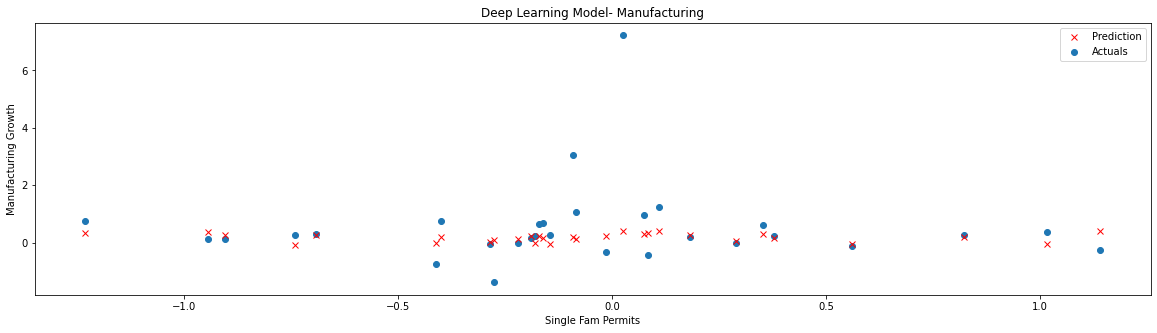

Train on 4095 samples
4095/4095 [==============================] - 0s 41us/sample - loss: 0.8710 - mae: 1.2203
Train on 3276 samples, validate on 819 samples
Epoch 1/30
3276/3276 [==============================] - 0s 79us/sample - loss: 1.0019 - mae: 1.3856 - val_loss: 0.9288 - val_mae: 1.2990
Epoch 2/30
3276/3276 [==============================] - 0s 47us/sample - loss: 0.9565 - mae: 1.3310 - val_loss: 0.9282 - val_mae: 1.2992
Epoch 3/30
3276/3276 [==============================] - 0s 48us/sample - loss: 0.9412 - mae: 1.3068 - val_loss: 0.9207 - val_mae: 1.2854
Epoch 4/30
3276/3276 [==============================] - 0s 48us/sample - loss: 0.9357 - mae: 1.3004 - val_loss: 0.9136 - val_mae: 1.2771
Epoch 5/30
3276/3276 [==============================] - 0s 48us/sample - loss: 0.9342 - mae: 1.2994 - val_loss: 0.9118 - val_mae: 1.2755
Epoch 6/30
3276/3276 [==============================] - 0s 48us/sample - loss: 0.9323 - mae: 1.2947 - val_loss: 0.9098 - val_mae: 1.2719
Epoch 7/30
3276/3276

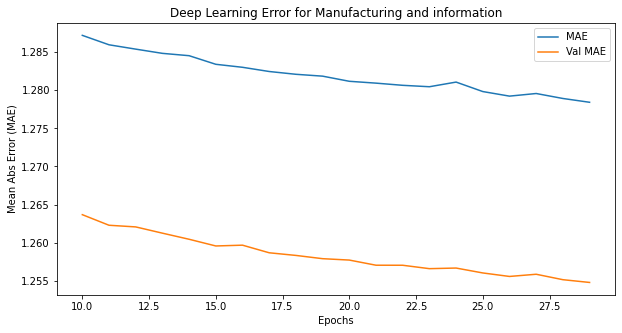

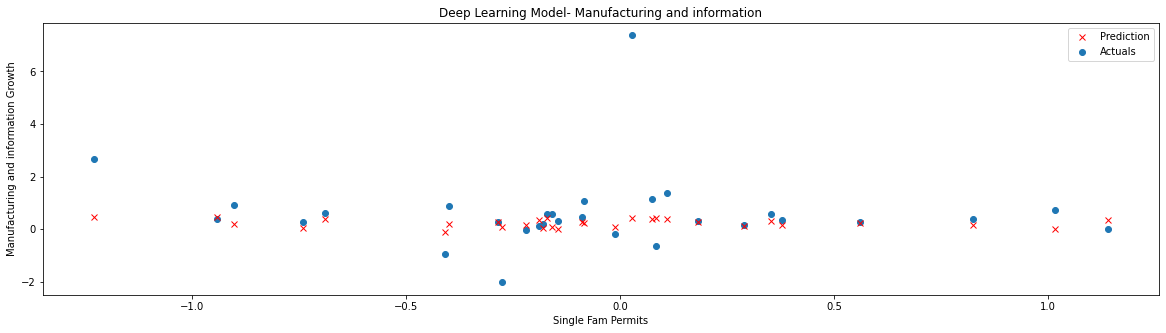

Train on 4095 samples
4095/4095 [==============================] - 0s 39us/sample - loss: 0.9152 - mae: 1.2735
Train on 3276 samples, validate on 819 samples
Epoch 1/30
3276/3276 [==============================] - 0s 77us/sample - loss: 0.4085 - mae: 0.6192 - val_loss: 0.3902 - val_mae: 0.6010
Epoch 2/30
3276/3276 [==============================] - 0s 49us/sample - loss: 0.4014 - mae: 0.6056 - val_loss: 0.3853 - val_mae: 0.5806
Epoch 3/30
3276/3276 [==============================] - 0s 46us/sample - loss: 0.3965 - mae: 0.5825 - val_loss: 0.3829 - val_mae: 0.5654
Epoch 4/30
3276/3276 [==============================] - 0s 47us/sample - loss: 0.3934 - mae: 0.5707 - val_loss: 0.3802 - val_mae: 0.5593
Epoch 5/30
3276/3276 [==============================] - 0s 45us/sample - loss: 0.3912 - mae: 0.5597 - val_loss: 0.3785 - val_mae: 0.5476
Epoch 6/30
3276/3276 [==============================] - 0s 49us/sample - loss: 0.3897 - mae: 0.5520 - val_loss: 0.3773 - val_mae: 0.5420
Epoch 7/30
3276/3276

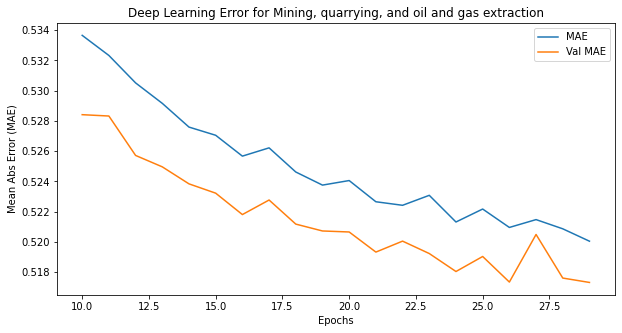

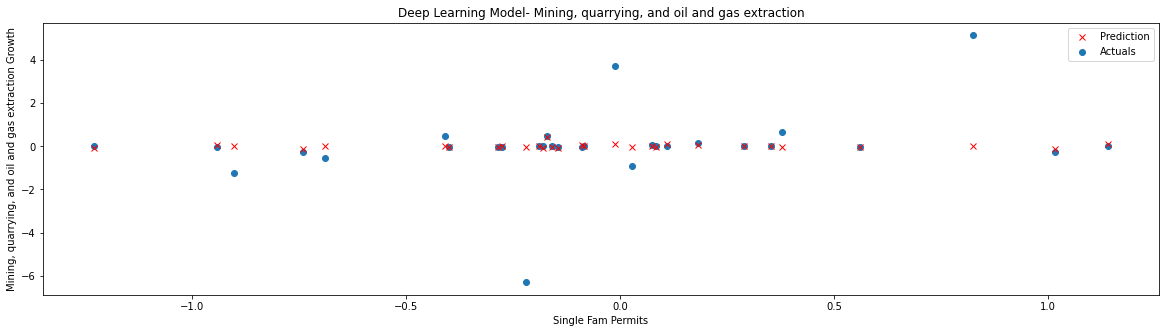

Train on 4095 samples
4095/4095 [==============================] - 0s 39us/sample - loss: 0.3817 - mae: 0.5193
Train on 3276 samples, validate on 819 samples
Epoch 1/30
3276/3276 [==============================] - 0s 143us/sample - loss: 0.9782 - mae: 1.3259 - val_loss: 0.9291 - val_mae: 1.2535
Epoch 2/30
3276/3276 [==============================] - 0s 47us/sample - loss: 0.9240 - mae: 1.2627 - val_loss: 0.9278 - val_mae: 1.2515
Epoch 3/30
3276/3276 [==============================] - 0s 50us/sample - loss: 0.9036 - mae: 1.2155 - val_loss: 0.9347 - val_mae: 1.2482
Epoch 4/30
3276/3276 [==============================] - 0s 46us/sample - loss: 0.8992 - mae: 1.2079 - val_loss: 0.9227 - val_mae: 1.2301
Epoch 5/30
3276/3276 [==============================] - 0s 46us/sample - loss: 0.8966 - mae: 1.2053 - val_loss: 0.9215 - val_mae: 1.2308
Epoch 6/30
3276/3276 [==============================] - 0s 45us/sample - loss: 0.8955 - mae: 1.2023 - val_loss: 0.9248 - val_mae: 1.2313
Epoch 7/30
3276/327

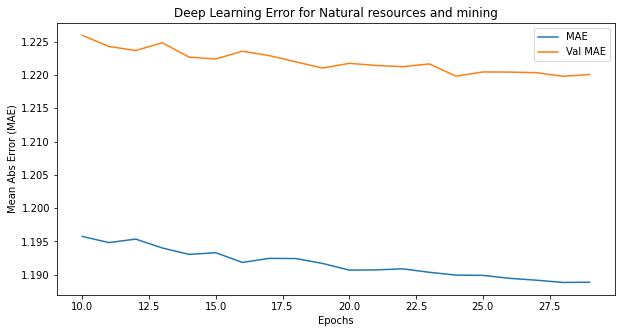

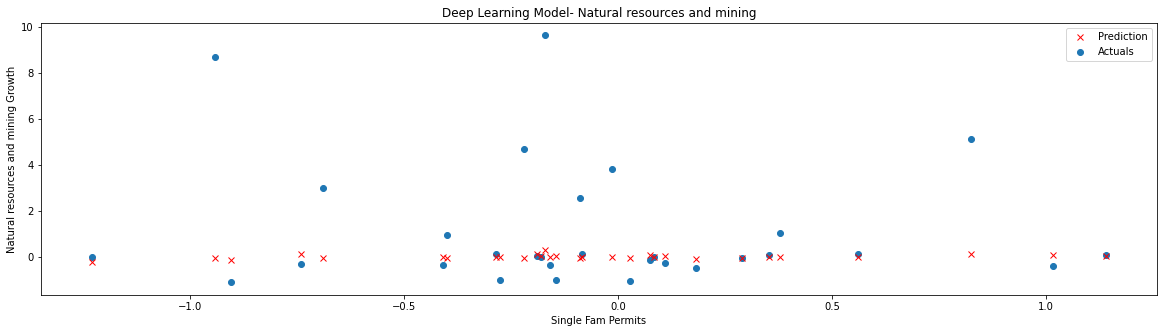

Train on 4095 samples
4095/4095 [==============================] - 0s 38us/sample - loss: 0.8938 - mae: 1.1959
Train on 3276 samples, validate on 819 samples
Epoch 1/30
3276/3276 [==============================] - 0s 84us/sample - loss: 0.4655 - mae: 0.7743 - val_loss: 0.4490 - val_mae: 0.7408
Epoch 2/30
3276/3276 [==============================] - 0s 47us/sample - loss: 0.4273 - mae: 0.7137 - val_loss: 0.4294 - val_mae: 0.6933
Epoch 3/30
3276/3276 [==============================] - 0s 46us/sample - loss: 0.4162 - mae: 0.6838 - val_loss: 0.4277 - val_mae: 0.6888
Epoch 4/30
3276/3276 [==============================] - 0s 49us/sample - loss: 0.4154 - mae: 0.6815 - val_loss: 0.4284 - val_mae: 0.6884
Epoch 5/30
3276/3276 [==============================] - 0s 48us/sample - loss: 0.4145 - mae: 0.6793 - val_loss: 0.4272 - val_mae: 0.6854
Epoch 6/30
3276/3276 [==============================] - 0s 47us/sample - loss: 0.4140 - mae: 0.6777 - val_loss: 0.4263 - val_mae: 0.6829
Epoch 7/30
3276/3276

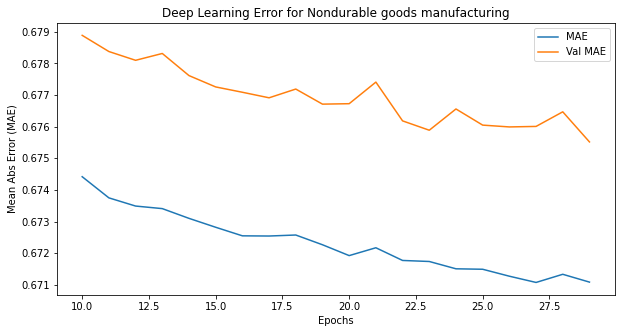

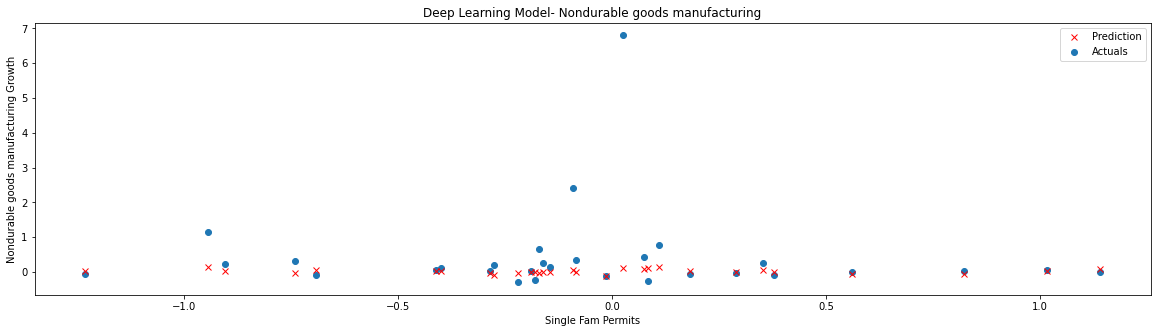

Train on 4095 samples
4095/4095 [==============================] - 0s 38us/sample - loss: 0.4138 - mae: 0.6719
Train on 3276 samples, validate on 819 samples
Epoch 1/30
3276/3276 [==============================] - 0s 78us/sample - loss: 0.1032 - mae: 0.3496 - val_loss: 0.0649 - val_mae: 0.2866
Epoch 2/30
3276/3276 [==============================] - 0s 48us/sample - loss: 0.0564 - mae: 0.2606 - val_loss: 0.0277 - val_mae: 0.1721
Epoch 3/30
3276/3276 [==============================] - 0s 45us/sample - loss: 0.0329 - mae: 0.1922 - val_loss: 0.0263 - val_mae: 0.1687
Epoch 4/30
3276/3276 [==============================] - 0s 46us/sample - loss: 0.0227 - mae: 0.1569 - val_loss: 0.0221 - val_mae: 0.1555
Epoch 5/30
3276/3276 [==============================] - 0s 46us/sample - loss: 0.0190 - mae: 0.1426 - val_loss: 0.0190 - val_mae: 0.1398
Epoch 6/30
3276/3276 [==============================] - 0s 45us/sample - loss: 0.0169 - mae: 0.1336 - val_loss: 0.0165 - val_mae: 0.1306
Epoch 7/30
3276/3276

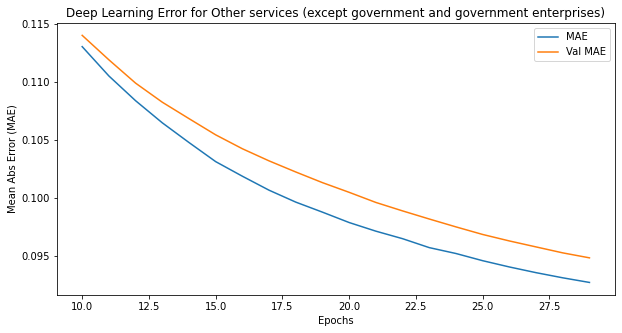

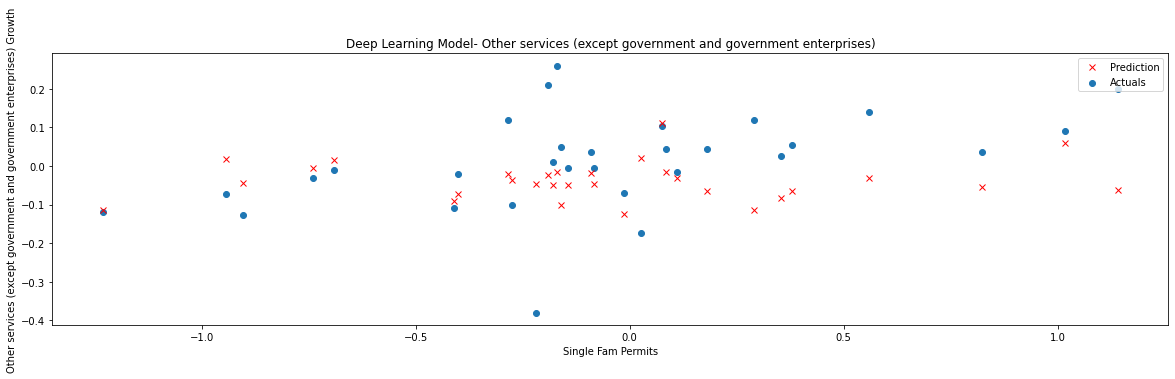

Train on 4095 samples
4095/4095 [==============================] - 0s 38us/sample - loss: 0.0085 - mae: 0.0926
Train on 3276 samples, validate on 819 samples
Epoch 1/30
3276/3276 [==============================] - 0s 80us/sample - loss: 1.8371 - mae: 2.2565 - val_loss: 1.7856 - val_mae: 2.2048
Epoch 2/30
3276/3276 [==============================] - 0s 49us/sample - loss: 1.8003 - mae: 2.2185 - val_loss: 1.7940 - val_mae: 2.2108
Epoch 3/30
3276/3276 [==============================] - 0s 46us/sample - loss: 1.8010 - mae: 2.2206 - val_loss: 1.7875 - val_mae: 2.2038
Epoch 4/30
3276/3276 [==============================] - 0s 47us/sample - loss: 1.7946 - mae: 2.2116 - val_loss: 1.7819 - val_mae: 2.1990
Epoch 5/30
3276/3276 [==============================] - 0s 46us/sample - loss: 1.7931 - mae: 2.2095 - val_loss: 1.7804 - val_mae: 2.1975
Epoch 6/30
3276/3276 [==============================] - 0s 45us/sample - loss: 1.7918 - mae: 2.2080 - val_loss: 1.7798 - val_mae: 2.1967
Epoch 7/30
3276/3276

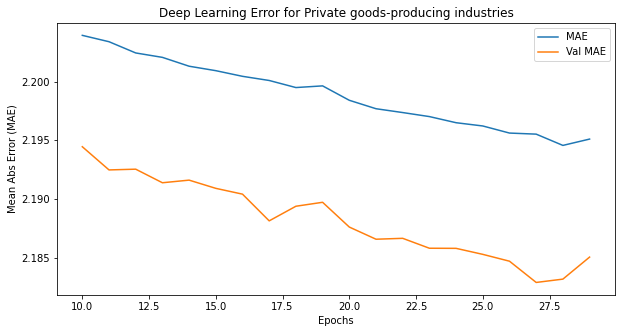

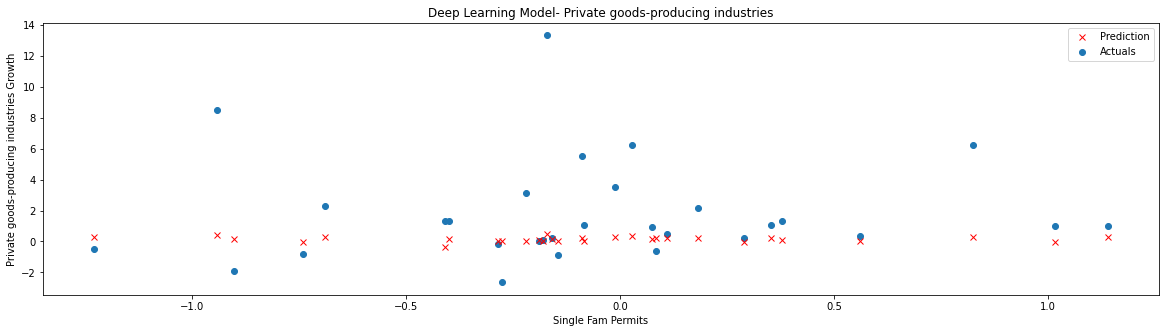

Train on 4095 samples
4095/4095 [==============================] - 0s 37us/sample - loss: 1.7761 - mae: 2.1918
Train on 3276 samples, validate on 819 samples
Epoch 1/30
3276/3276 [==============================] - 0s 81us/sample - loss: 2.6186 - mae: 3.0748 - val_loss: 2.5903 - val_mae: 3.0442
Epoch 2/30
3276/3276 [==============================] - 0s 45us/sample - loss: 2.4816 - mae: 2.9318 - val_loss: 2.5804 - val_mae: 3.0357
Epoch 3/30
3276/3276 [==============================] - 0s 49us/sample - loss: 2.4663 - mae: 2.9172 - val_loss: 2.5372 - val_mae: 2.9887
Epoch 4/30
3276/3276 [==============================] - 0s 47us/sample - loss: 2.4406 - mae: 2.8906 - val_loss: 2.5233 - val_mae: 2.9750
Epoch 5/30
3276/3276 [==============================] - 0s 46us/sample - loss: 2.4364 - mae: 2.8859 - val_loss: 2.5139 - val_mae: 2.9664
Epoch 6/30
3276/3276 [==============================] - 0s 45us/sample - loss: 2.4303 - mae: 2.8794 - val_loss: 2.5100 - val_mae: 2.9615
Epoch 7/30
3276/3276

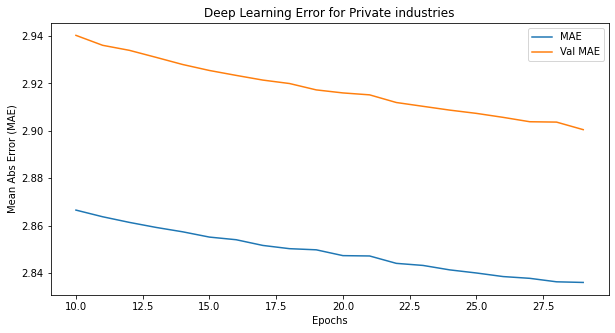

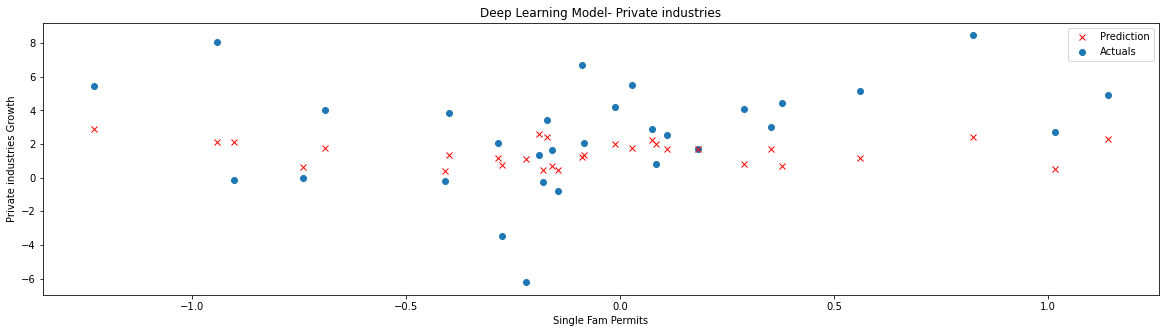

Train on 4095 samples
4095/4095 [==============================] - 0s 40us/sample - loss: 2.3996 - mae: 2.8467
Train on 3276 samples, validate on 819 samples
Epoch 1/30
3276/3276 [==============================] - 0s 81us/sample - loss: 1.0693 - mae: 1.4841 - val_loss: 1.0738 - val_mae: 1.4943
Epoch 2/30
3276/3276 [==============================] - 0s 48us/sample - loss: 1.0447 - mae: 1.4588 - val_loss: 1.0762 - val_mae: 1.4995
Epoch 3/30
3276/3276 [==============================] - 0s 49us/sample - loss: 1.0327 - mae: 1.4450 - val_loss: 1.0639 - val_mae: 1.4839
Epoch 4/30
3276/3276 [==============================] - 0s 46us/sample - loss: 1.0251 - mae: 1.4366 - val_loss: 1.0593 - val_mae: 1.4810
Epoch 5/30
3276/3276 [==============================] - 0s 48us/sample - loss: 1.0195 - mae: 1.4312 - val_loss: 1.0565 - val_mae: 1.4784
Epoch 6/30
3276/3276 [==============================] - 0s 49us/sample - loss: 1.0153 - mae: 1.4264 - val_loss: 1.0525 - val_mae: 1.4741
Epoch 7/30
3276/3276

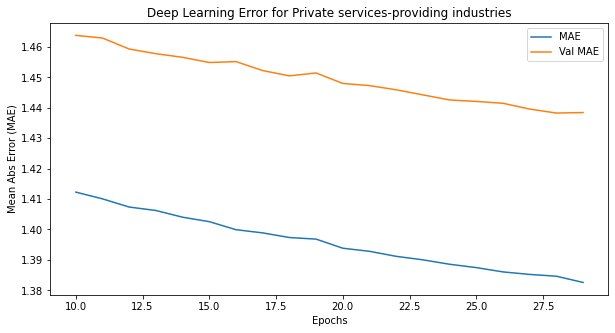

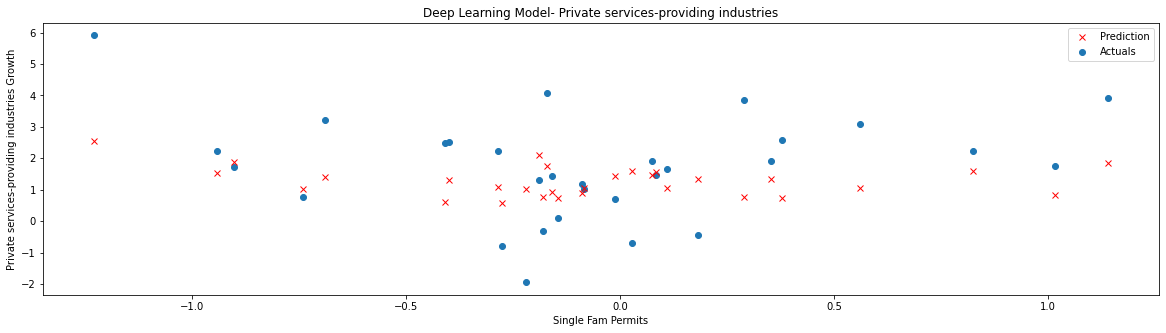

Train on 4095 samples
4095/4095 [==============================] - 0s 40us/sample - loss: 0.9834 - mae: 1.3929
Train on 3276 samples, validate on 819 samples
Epoch 1/30
3276/3276 [==============================] - 0s 80us/sample - loss: 0.2450 - mae: 0.5606 - val_loss: 0.2028 - val_mae: 0.5053
Epoch 2/30
3276/3276 [==============================] - 0s 44us/sample - loss: 0.1699 - mae: 0.4453 - val_loss: 0.1346 - val_mae: 0.3870
Epoch 3/30
3276/3276 [==============================] - 0s 45us/sample - loss: 0.1416 - mae: 0.3967 - val_loss: 0.1255 - val_mae: 0.3695
Epoch 4/30
3276/3276 [==============================] - 0s 46us/sample - loss: 0.1296 - mae: 0.3718 - val_loss: 0.1232 - val_mae: 0.3650
Epoch 5/30
3276/3276 [==============================] - 0s 47us/sample - loss: 0.1240 - mae: 0.3585 - val_loss: 0.1201 - val_mae: 0.3572
Epoch 6/30
3276/3276 [==============================] - 0s 49us/sample - loss: 0.1212 - mae: 0.3522 - val_loss: 0.1198 - val_mae: 0.3574
Epoch 7/30
3276/3276

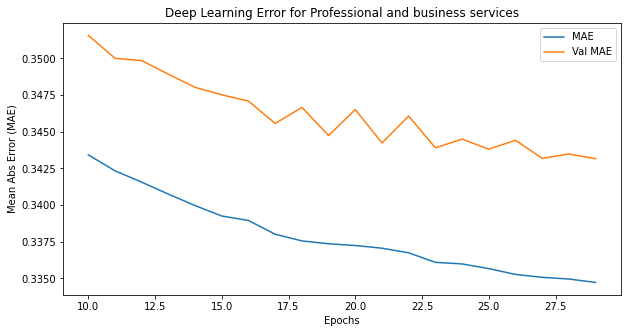

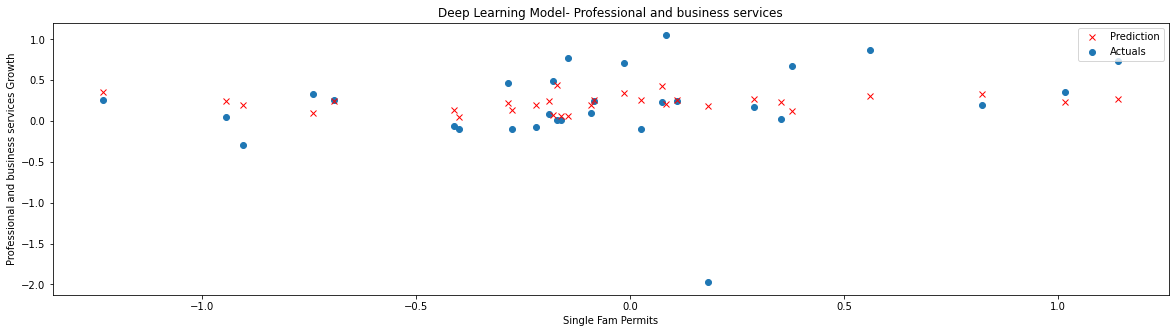

Train on 4095 samples
4095/4095 [==============================] - 0s 41us/sample - loss: 0.1134 - mae: 0.3361
Train on 3276 samples, validate on 819 samples
Epoch 1/30
3276/3276 [==============================] - 0s 79us/sample - loss: 0.1874 - mae: 0.4800 - val_loss: 0.1308 - val_mae: 0.4057
Epoch 2/30
3276/3276 [==============================] - 0s 50us/sample - loss: 0.0966 - mae: 0.3310 - val_loss: 0.0533 - val_mae: 0.2307
Epoch 3/30
3276/3276 [==============================] - 0s 49us/sample - loss: 0.0588 - mae: 0.2663 - val_loss: 0.0497 - val_mae: 0.2164
Epoch 4/30
3276/3276 [==============================] - 0s 46us/sample - loss: 0.0480 - mae: 0.2140 - val_loss: 0.0485 - val_mae: 0.2074
Epoch 5/30
3276/3276 [==============================] - 0s 47us/sample - loss: 0.0433 - mae: 0.2042 - val_loss: 0.0473 - val_mae: 0.2064
Epoch 6/30
3276/3276 [==============================] - 0s 46us/sample - loss: 0.0422 - mae: 0.1991 - val_loss: 0.0451 - val_mae: 0.1951
Epoch 7/30
3276/3276

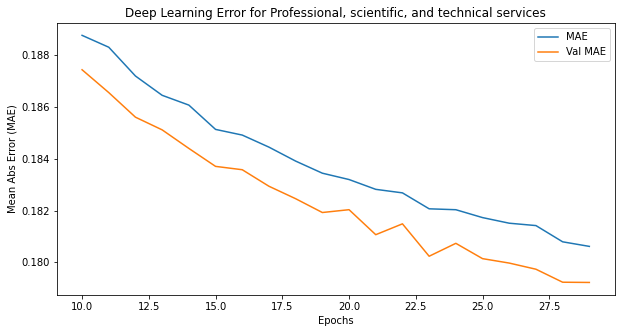

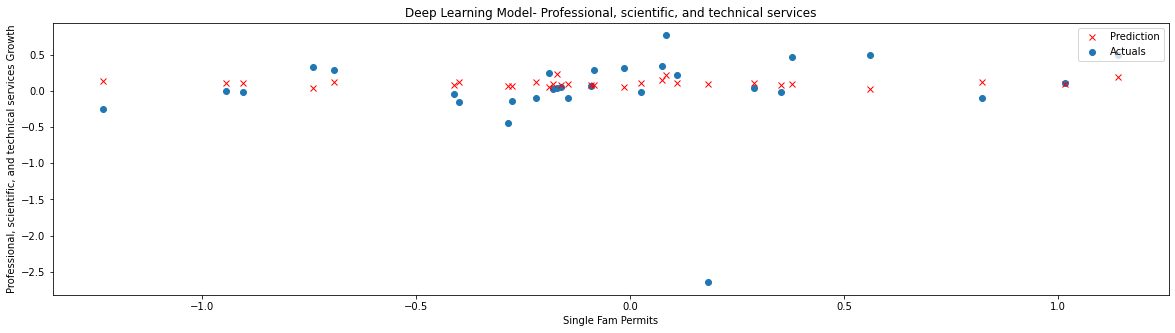

Train on 4095 samples
4095/4095 [==============================] - 0s 40us/sample - loss: 0.0382 - mae: 0.1801
Train on 3276 samples, validate on 819 samples
Epoch 1/30
3276/3276 [==============================] - 0s 78us/sample - loss: 0.3291 - mae: 0.6261 - val_loss: 0.3378 - val_mae: 0.6393
Epoch 2/30
3276/3276 [==============================] - 0s 47us/sample - loss: 0.3105 - mae: 0.5999 - val_loss: 0.3258 - val_mae: 0.6237
Epoch 3/30
3276/3276 [==============================] - 0s 48us/sample - loss: 0.3024 - mae: 0.5920 - val_loss: 0.3235 - val_mae: 0.6199
Epoch 4/30
3276/3276 [==============================] - 0s 48us/sample - loss: 0.2989 - mae: 0.5837 - val_loss: 0.3217 - val_mae: 0.6160
Epoch 5/30
3276/3276 [==============================] - 0s 47us/sample - loss: 0.2960 - mae: 0.5811 - val_loss: 0.3180 - val_mae: 0.6126
Epoch 6/30
3276/3276 [==============================] - 0s 45us/sample - loss: 0.2940 - mae: 0.5796 - val_loss: 0.3157 - val_mae: 0.6095
Epoch 7/30
3276/3276

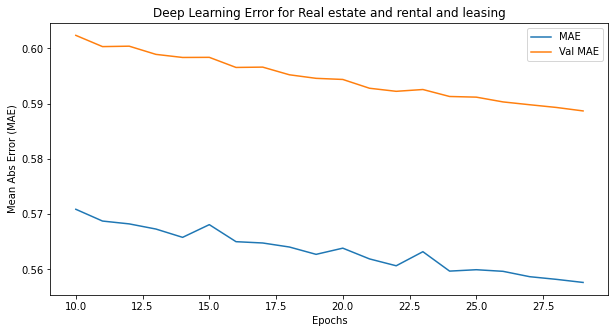

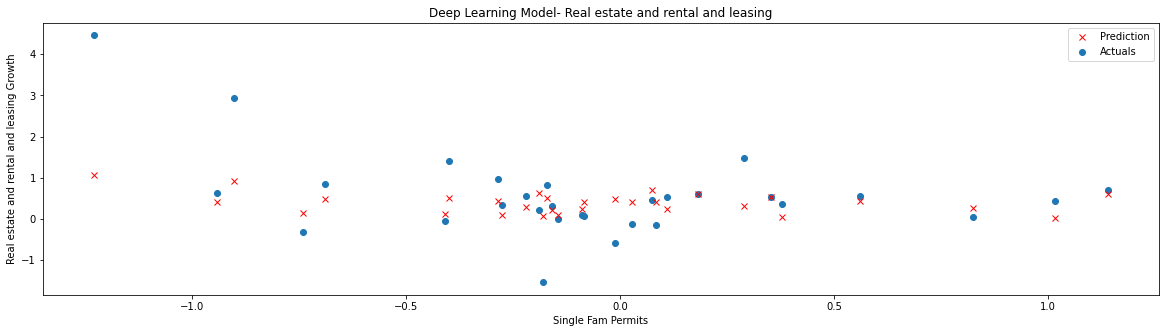

Train on 4095 samples
4095/4095 [==============================] - 0s 42us/sample - loss: 0.2820 - mae: 0.5636
Train on 3276 samples, validate on 819 samples
Epoch 1/30
3276/3276 [==============================] - 0s 81us/sample - loss: 0.0571 - mae: 0.2459 - val_loss: 0.0608 - val_mae: 0.2441
Epoch 2/30
3276/3276 [==============================] - 0s 52us/sample - loss: 0.0541 - mae: 0.2376 - val_loss: 0.0567 - val_mae: 0.2388
Epoch 3/30
3276/3276 [==============================] - 0s 48us/sample - loss: 0.0519 - mae: 0.2306 - val_loss: 0.0557 - val_mae: 0.2341
Epoch 4/30
3276/3276 [==============================] - 0s 50us/sample - loss: 0.0506 - mae: 0.2279 - val_loss: 0.0545 - val_mae: 0.2318
Epoch 5/30
3276/3276 [==============================] - 0s 47us/sample - loss: 0.0497 - mae: 0.2249 - val_loss: 0.0538 - val_mae: 0.2297
Epoch 6/30
3276/3276 [==============================] - 0s 46us/sample - loss: 0.0491 - mae: 0.2234 - val_loss: 0.0534 - val_mae: 0.2282
Epoch 7/30
3276/3276

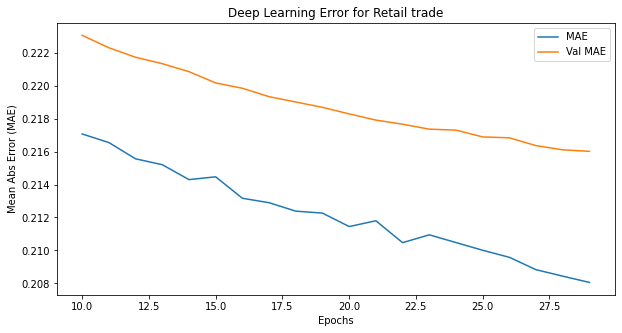

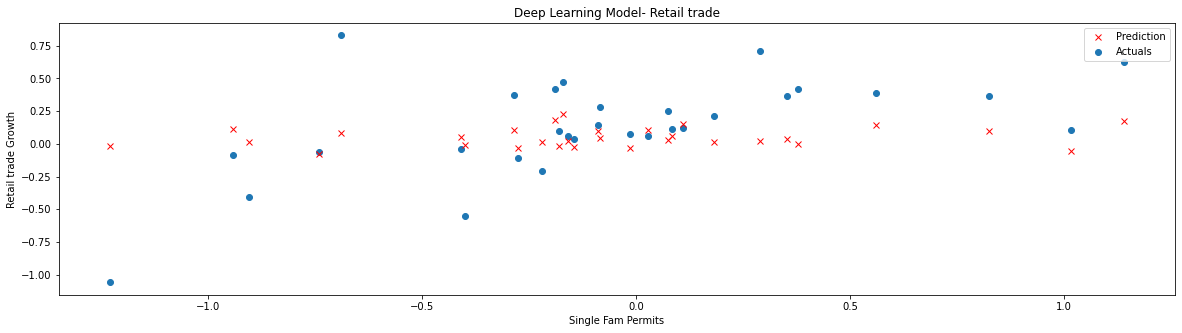

Train on 4095 samples
4095/4095 [==============================] - 0s 39us/sample - loss: 0.0450 - mae: 0.2094
Train on 3276 samples, validate on 819 samples
Epoch 1/30
3276/3276 [==============================] - 0s 80us/sample - loss: 0.1836 - mae: 0.4689 - val_loss: 0.1799 - val_mae: 0.4678
Epoch 2/30
3276/3276 [==============================] - 0s 47us/sample - loss: 0.1434 - mae: 0.4046 - val_loss: 0.1366 - val_mae: 0.3855
Epoch 3/30
3276/3276 [==============================] - 0s 50us/sample - loss: 0.1312 - mae: 0.3771 - val_loss: 0.1307 - val_mae: 0.3807
Epoch 4/30
3276/3276 [==============================] - 0s 49us/sample - loss: 0.1231 - mae: 0.3696 - val_loss: 0.1266 - val_mae: 0.3705
Epoch 5/30
3276/3276 [==============================] - 0s 47us/sample - loss: 0.1188 - mae: 0.3566 - val_loss: 0.1250 - val_mae: 0.3673
Epoch 6/30
3276/3276 [==============================] - 0s 48us/sample - loss: 0.1167 - mae: 0.3554 - val_loss: 0.1248 - val_mae: 0.3693
Epoch 7/30
3276/3276

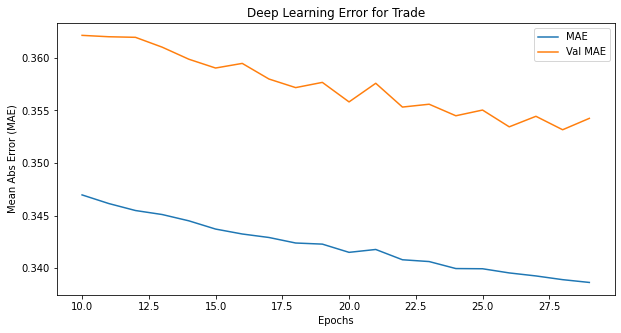

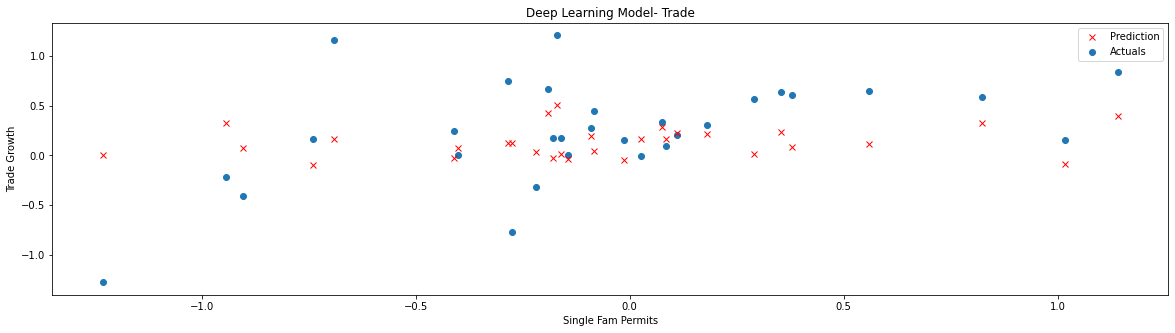

Train on 4095 samples
4095/4095 [==============================] - 0s 37us/sample - loss: 0.1093 - mae: 0.3414
Train on 3276 samples, validate on 819 samples
Epoch 1/30
3276/3276 [==============================] - 0s 82us/sample - loss: 0.4573 - mae: 0.8074 - val_loss: 0.2998 - val_mae: 0.5877
Epoch 2/30
3276/3276 [==============================] - 0s 47us/sample - loss: 0.3186 - mae: 0.6344 - val_loss: 0.2731 - val_mae: 0.5365
Epoch 3/30
3276/3276 [==============================] - 0s 49us/sample - loss: 0.2569 - mae: 0.4996 - val_loss: 0.2808 - val_mae: 0.5349
Epoch 4/30
3276/3276 [==============================] - 0s 48us/sample - loss: 0.2561 - mae: 0.4955 - val_loss: 0.2611 - val_mae: 0.4943
Epoch 5/30
3276/3276 [==============================] - 0s 48us/sample - loss: 0.2512 - mae: 0.4896 - val_loss: 0.2613 - val_mae: 0.4992
Epoch 6/30
3276/3276 [==============================] - 0s 47us/sample - loss: 0.2491 - mae: 0.4814 - val_loss: 0.2621 - val_mae: 0.4932
Epoch 7/30
3276/3276

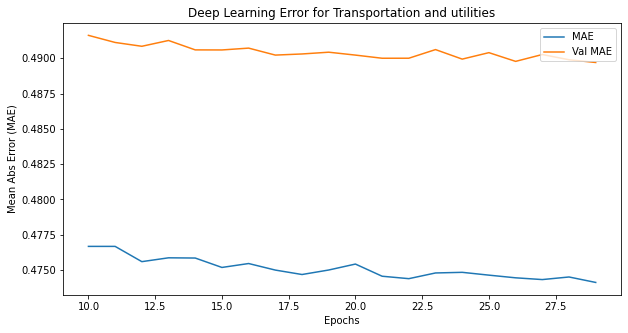

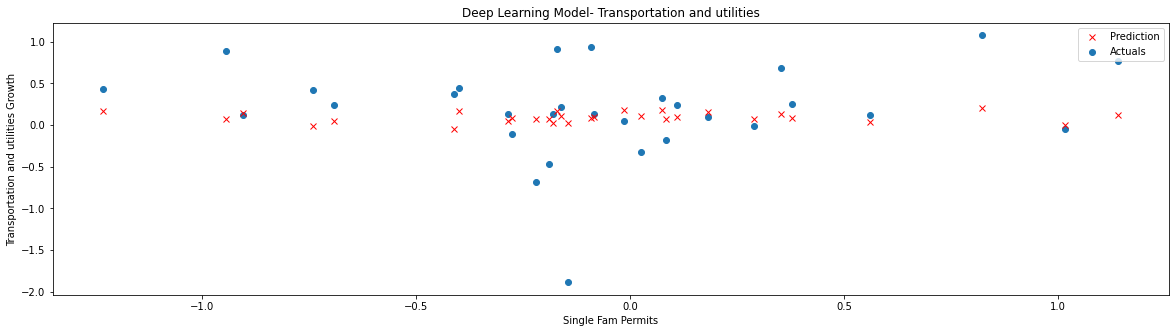

Train on 4095 samples
4095/4095 [==============================] - 0s 41us/sample - loss: 0.2493 - mae: 0.4773
Train on 3276 samples, validate on 819 samples
Epoch 1/30
3276/3276 [==============================] - 0s 79us/sample - loss: 0.1091 - mae: 0.3306 - val_loss: 0.0740 - val_mae: 0.2806
Epoch 2/30
3276/3276 [==============================] - 0s 45us/sample - loss: 0.0854 - mae: 0.2982 - val_loss: 0.0632 - val_mae: 0.2407
Epoch 3/30
3276/3276 [==============================] - 0s 45us/sample - loss: 0.0718 - mae: 0.2431 - val_loss: 0.0633 - val_mae: 0.2320
Epoch 4/30
3276/3276 [==============================] - 0s 47us/sample - loss: 0.0680 - mae: 0.2310 - val_loss: 0.0579 - val_mae: 0.2217
Epoch 5/30
3276/3276 [==============================] - 0s 45us/sample - loss: 0.0661 - mae: 0.2289 - val_loss: 0.0564 - val_mae: 0.2141
Epoch 6/30
3276/3276 [==============================] - 0s 45us/sample - loss: 0.0645 - mae: 0.2215 - val_loss: 0.0560 - val_mae: 0.2122
Epoch 7/30
3276/3276

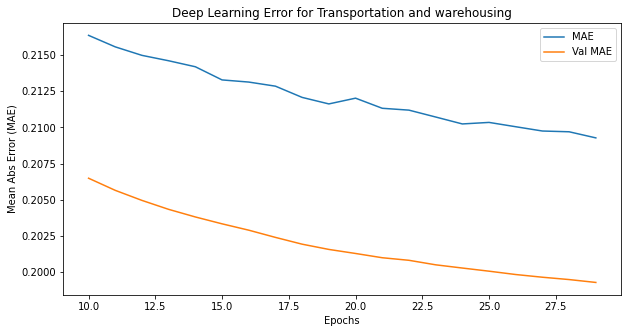

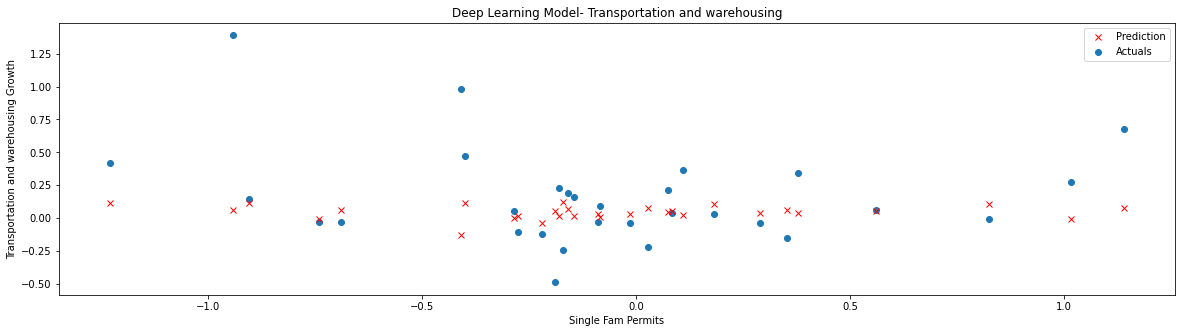

Train on 4095 samples
4095/4095 [==============================] - 0s 39us/sample - loss: 0.0578 - mae: 0.2076
Train on 3276 samples, validate on 819 samples
Epoch 1/30
3276/3276 [==============================] - 0s 76us/sample - loss: 0.3767 - mae: 0.6707 - val_loss: 0.3320 - val_mae: 0.6552
Epoch 2/30
3276/3276 [==============================] - 0s 46us/sample - loss: 0.2574 - mae: 0.5230 - val_loss: 0.2305 - val_mae: 0.4629
Epoch 3/30
3276/3276 [==============================] - 0s 47us/sample - loss: 0.2256 - mae: 0.4589 - val_loss: 0.2153 - val_mae: 0.4278
Epoch 4/30
3276/3276 [==============================] - 0s 46us/sample - loss: 0.2136 - mae: 0.4206 - val_loss: 0.2082 - val_mae: 0.4027
Epoch 5/30
3276/3276 [==============================] - 0s 49us/sample - loss: 0.2053 - mae: 0.3934 - val_loss: 0.2088 - val_mae: 0.3935
Epoch 6/30
3276/3276 [==============================] - 0s 49us/sample - loss: 0.2034 - mae: 0.3944 - val_loss: 0.2067 - val_mae: 0.3962
Epoch 7/30
3276/3276

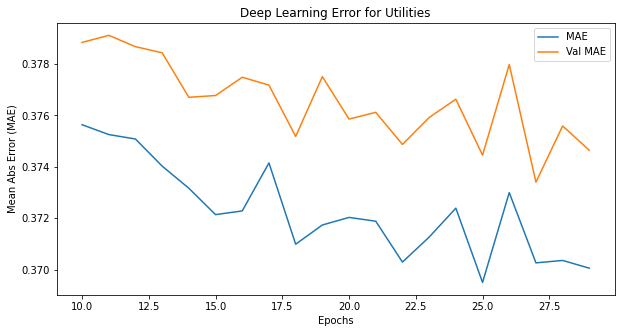

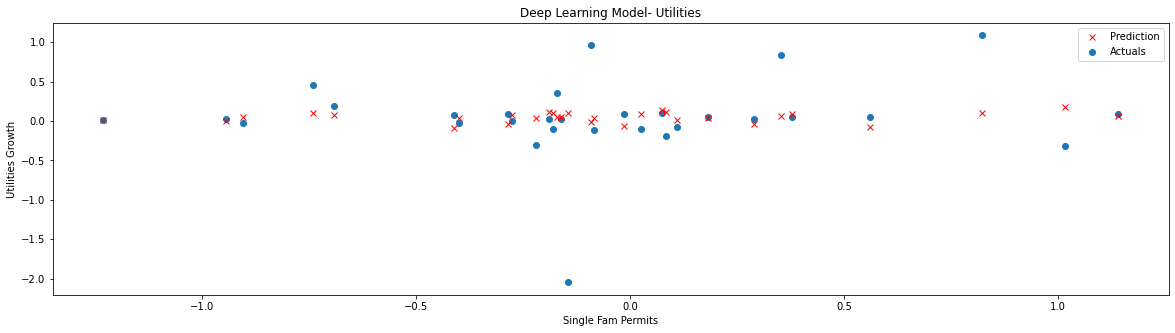

Train on 4095 samples
4095/4095 [==============================] - 0s 39us/sample - loss: 0.1985 - mae: 0.3712
Train on 3276 samples, validate on 819 samples
Epoch 1/30
3276/3276 [==============================] - 0s 81us/sample - loss: 0.1024 - mae: 0.3531 - val_loss: 0.0626 - val_mae: 0.2477
Epoch 2/30
3276/3276 [==============================] - 0s 49us/sample - loss: 0.0744 - mae: 0.2751 - val_loss: 0.0589 - val_mae: 0.2405
Epoch 3/30
3276/3276 [==============================] - 0s 47us/sample - loss: 0.0636 - mae: 0.2456 - val_loss: 0.0639 - val_mae: 0.2509
Epoch 4/30
3276/3276 [==============================] - 0s 47us/sample - loss: 0.0619 - mae: 0.2410 - val_loss: 0.0574 - val_mae: 0.2342
Epoch 5/30
3276/3276 [==============================] - 0s 48us/sample - loss: 0.0604 - mae: 0.2376 - val_loss: 0.0564 - val_mae: 0.2309
Epoch 6/30
3276/3276 [==============================] - 0s 49us/sample - loss: 0.0594 - mae: 0.2358 - val_loss: 0.0567 - val_mae: 0.2323
Epoch 7/30
3276/3276

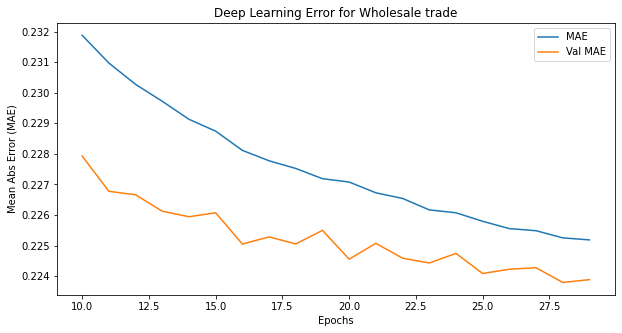

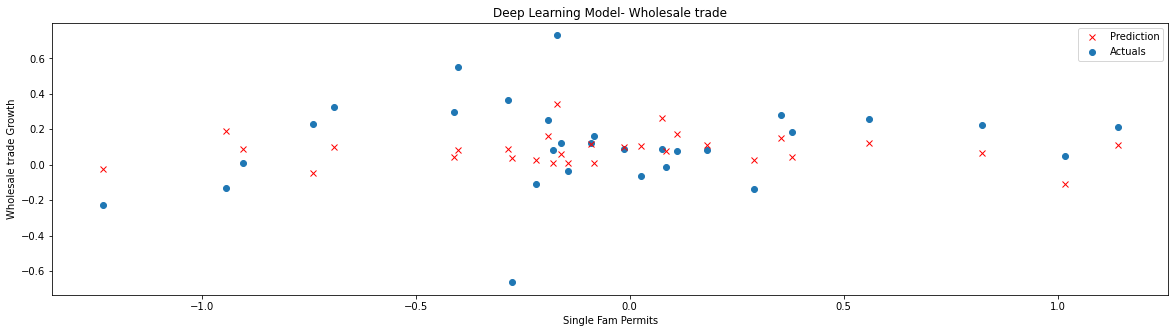

Train on 4095 samples
4095/4095 [==============================] - 0s 40us/sample - loss: 0.0549 - mae: 0.2247


In [24]:
################################################## DEEP NEURAL NETWORKS 

os.chdir(deep_learning_img)
#df_train_label=df_train[label]
#df_val_label=df_val[label]


var=var_pca
df_pred_dl=pd.DataFrame()
epoch=30

for label in var_bed:
  model = tf.keras.models.Sequential([
   # tf.keras.layers.LSTM(64, input_shape=(16,1),return_sequences=True),
   # tf.keras.layers.LSTM(32, return_sequences=True),
    #tf.keras.layers.GlobalAveragePooling1D(),
  #  tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation="relu",input_shape=(16,)),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1)
  #tf.keras.layers.Lambda(lambda x: x * 400)
    ])

  optimizer = tf.keras.optimizers.SGD(lr=1e-5, momentum=0.99)
  model.compile(loss=tf.keras.losses.Huber(),
                optimizer=optimizer,
                metrics=["mae"])



  history = model.fit(df_train[var_pca],df_train[label],epochs=epoch,validation_data=(df_val[var_pca],df_val[label]))
  plt.figure(figsize=(10, 5))
  plt.plot(np.arange(10,epoch),history.history["mae"][10:epoch],label="MAE") #######Plot only after epoch #5
  plt.plot(np.arange(10,epoch),history.history["val_mae"][10:epoch],label="Val MAE")
  plt.legend(loc="upper right")
  plt.title("Deep Learning Error for {}".format(label))
  plt.xlabel("Epochs")
  plt.ylabel("Mean Abs Error (MAE)")
  plt.savefig("{}.png".format(label))

    #'Total Construction Spending',
  plt_var='Construction'
  plt.figure(figsize=(20, 5))
  plt.title('Deep Learning Model- {}'.format(label))
  #plt.scatter(df_train[plt_var][0:30], df_train[label][0:30],label="Actuals")
 # plt.plot(df_train[plt_var][0:30], model.predict(df_train[var_pca][0:30]),'x',color='r',label="Prediction")
  plt.scatter(df_val[plt_var][0:30], df_val[label][0:30],label="Actuals")
  plt.plot(df_val[plt_var][0:30], model.predict(df_val[var_pca][0:30]),'x',color='r',label="Prediction")
  plt.xlabel("Single Fam Permits")
  plt.ylabel("{} Growth".format(label))
  plt.legend(loc="upper right")
  plt.savefig("Deep_Learning_predictions_{}.png".format(label))
  plt.show()
  model.fit(df_final_rand[var_pca],df_final_rand[label]) ######## fit the full dataset
  mod=model.predict(df_pca_test)
  df_pred_dl=pd.concat([df_pred_dl,pd.DataFrame(mod,columns=[label])],axis=1)


In [0]:
df_pred_dl_final=pd.concat([df_complete_pca_test.reset_index()[["Year","Geo (MSA)","State"]],df_pred_dl],axis=1)
df_pred_dl_final=df_pred_dl_final.sort_values(["Geo (MSA)","Year"])

os.chdir(base_dir)
df_pred_dl_final.to_csv("Deep_learning_predictions_v2.csv",index=False)

In [0]:
df_pred_grad_boost_final=pd.read_csv("df_pred_gb_v2.csv")
df_pred_lstm_final=pd.read_csv("LSTM_predictions_v2.csv")
df_pred_dl_final=pd.read_csv("Deep_learning_predictions_v2.csv")

In [27]:
df_pred_grad_boost_final
df_pred_lstm_final
df_pred_dl_final



Year                          Geo (MSA)  ... Utilities  Wholesale trade
0     2019                        Abilene, TX  ...  0.037666         0.172827
1     2020                        Abilene, TX  ...  0.083026         0.146822
2     2021                        Abilene, TX  ...  0.079848         0.055949
3     2022                        Abilene, TX  ...  0.055375         0.036300
4     2023                        Abilene, TX  ...  0.031133         0.008882
...    ...                                ...  ...       ...              ...
2059  2020  Youngstown-Warren-Boardman, OH-PA  ...  0.066910         0.135421
2060  2021  Youngstown-Warren-Boardman, OH-PA  ...  0.066453         0.142311
2061  2022  Youngstown-Warren-Boardman, OH-PA  ...  0.068556         0.137419
2062  2023  Youngstown-Warren-Boardman, OH-PA  ...  0.069363         0.136738
2063  2024  Youngstown-Warren-Boardman, OH-PA  ...  0.076312         0.131854

[2064 rows x 37 columns]

In [0]:
var_label="Volume"
var_agg=['Dodge Starts',
       #Agricultural Cement'
       'Cement Intensity (MT/Mil$2009)',
       'Cement Per Capita', 'Cement Per GSP (MT/Mil$2009)',
       'Commercial Cement Consumption', 'Commercial Construction Spending',
       'Government Cement Consumption',
       'Gross State Product, Real ($2012, Millions)', 'Multi Family Permits',
       'Public Construction Spending', 'Residential Cement Consumption',
       'Residential Construction Spending', 'Single Family Permits',
       'Total Construction Spending', 'Total Portland Cement',
       'Unemployment Rate (%)', 'Accommodation and food services',
       'Administrative and support and waste management and remediation services',
       'Agriculture, forestry, fishing and hunting',
       'All industry total (percent change)',
       'Arts, entertainment, and recreation',
       'Arts, entertainment, recreation, accommodation, and food services',
       'Construction', 'Durable goods manufacturing', 'Educational services',
       'Educational services, health care, and social assistance',
       'Finance and insurance',
       'Finance, insurance, real estate, rental, and leasing',
       'Government and government enterprises',
       'Health care and social assistance', 'Information',
       'Management of companies and enterprises', 'Manufacturing',
       'Manufacturing and information',
       'Mining, quarrying, and oil and gas extraction',
       'Natural resources and mining', 'Nondurable goods manufacturing',
       'Other services (except government and government enterprises)',
       'Private goods-producing industries', 'Private industries',
       'Private services-providing industries',
       'Professional and business services',
       'Professional, scientific, and technical services',
       'Real estate and rental and leasing', 'Retail trade', 'Trade',
       'Transportation and utilities', 'Transportation and warehousing',
       'Utilities', 'Wholesale trade']

In [100]:
os.chdir(base_dir)
ensemble_data=pd.read_excel("Predictions_3models.xlsm",sheet_name="Ensemble-3 Models")
ensemble_data.head()

Year    Geo (MSA)  ... Utilities  Wholesale trade
0  2019  Abilene, TX  ...  0.042059         0.161478
1  2020  Abilene, TX  ...  0.066294         0.153448
2  2021  Abilene, TX  ...  0.065417         0.122760
3  2022  Abilene, TX  ...  0.057511         0.115887
4  2023  Abilene, TX  ...  0.051560         0.088361

[5 rows x 37 columns]

In [154]:
#########################################################################
######################################################################### merge df_pca_dodge which has pca & dodge data up to 2024 with df_pred_grad_boost_final
df_pca_dodge=pd.read_csv("df_pca_dodge.csv")
df_complete_2024=pd.merge(df_pca_dodge,ensemble_data) ######## which contains generated data from Bureau of Economic Development
df_complete_2024

Geo (MSA) State  ...  Utilities  Wholesale trade
0                           Abilene, TX    TX  ...   0.042059         0.161478
1                           Abilene, TX    TX  ...   0.066294         0.153448
2                           Abilene, TX    TX  ...   0.065417         0.122760
3                           Abilene, TX    TX  ...   0.057511         0.115887
4                           Abilene, TX    TX  ...   0.051560         0.088361
...                                 ...   ...  ...        ...              ...
2059  Youngstown-Warren-Boardman, OH-PA    OH  ...   0.042860         0.084965
2060  Youngstown-Warren-Boardman, OH-PA    OH  ...   0.042925         0.087172
2061  Youngstown-Warren-Boardman, OH-PA    OH  ...   0.043691         0.085436
2062  Youngstown-Warren-Boardman, OH-PA    OH  ...   0.044044         0.085179
2063  Youngstown-Warren-Boardman, OH-PA    OH  ...   0.046621         0.135365

[2064 rows x 54 columns]

In [155]:
######CONNECT 
os.chdir(base_dir)
df_complete=pd.read_csv("df_complete.csv").drop("MSA",axis=1)
df_complete.head()


Geo (MSA) State  ...  Utilities  Wholesale trade
0  Abilene, TX    TX  ...   0.546667         0.536667
1  Abilene, TX    TX  ...   0.163333         0.250000
2  Abilene, TX    TX  ...   0.070000         0.366667
3  Abilene, TX    TX  ...  -0.135000        -0.586667
4  Abilene, TX    TX  ...   0.025000         0.293333

[5 rows x 54 columns]

In [0]:
df_complete_2006_2024=pd.concat([df_complete_2024,df_complete]) ###merge data from df_complete (2006-2018) with df_complete_2024 (2019-2024)
df_complete_2006_2024.to_csv("df_complete_2006-2024.csv",index=False)

In [173]:
df_complete

Geo (MSA) State  ...  Utilities  Wholesale trade
0                           Abilene, TX    TX  ...   0.546667         0.536667
1                           Abilene, TX    TX  ...   0.163333         0.250000
2                           Abilene, TX    TX  ...   0.070000         0.366667
3                           Abilene, TX    TX  ...  -0.135000        -0.586667
4                           Abilene, TX    TX  ...   0.025000         0.293333
...                                 ...   ...  ...        ...              ...
4090  Youngstown-Warren-Boardman, OH-PA    OH  ...  -0.026667         0.260000
4091  Youngstown-Warren-Boardman, OH-PA    OH  ...   0.020000         0.095000
4092  Youngstown-Warren-Boardman, OH-PA    OH  ...   0.036667        -0.243333
4093  Youngstown-Warren-Boardman, OH-PA    OH  ...   0.003333         0.120000
4094  Youngstown-Warren-Boardman, OH-PA    OH  ...  -0.005000         0.085000

[4095 rows x 54 columns]

In [8]:
################# AGGREGATE MODEL#################################
os.chdir(base_dir)
agg_col=["MSA","Year","Volume"]
agg_sales=pd.read_excel("US AGG shipments 2017 through YTD 2020.xlsx",sheet_name="Agg Sales",parse_dates=True)
agg_sales.head()


Key             MSA    Year     Volume
0       Akron, OH 2017       Akron, OH  2017.0  41754.420
1       Akron, OH 2018       Akron, OH  2018.0  59141.335
2       Akron, OH 2019       Akron, OH  2019.0  34396.216
3  Alexandria, LA 2018  Alexandria, LA  2018.0  29886.392
4  Alexandria, LA 2019  Alexandria, LA  2019.0   9903.829

In [157]:
agg_sales_complete=pd.merge(agg_sales,df_complete_2006_2024,left_on=["MSA","Year"],right_on=["Geo (MSA)","Year"])
agg_sales_complete.head()

Key             MSA  ...  Utilities  Wholesale trade
0       Akron, OH 2017       Akron, OH  ...   0.020000         0.500000
1       Akron, OH 2018       Akron, OH  ...  -0.005000         0.215000
2       Akron, OH 2019       Akron, OH  ...   0.047549         0.081106
3  Alexandria, LA 2018  Alexandria, LA  ...   0.300000         0.030000
4  Alexandria, LA 2019  Alexandria, LA  ...   0.048429         0.077114

[5 rows x 57 columns]

In [0]:
for var in var_agg:
  agg_sales_complete[var]=agg_sales_complete[var].ffill()
  agg_sales_complete[var]=agg_sales_complete[var].bfill()


In [0]:
agg_sales_rand=agg_sales_complete.sample(frac=1,random_state=3)
agg_sales_rand.to_csv("agg_sales_rand.csv",index=False)



In [23]:
agg_sales_rand=pd.read_csv("agg_sales_rand.csv")
agg_sales_train=agg_sales_rand.iloc[:np.int(.8*len(agg_sales_rand))]
agg_sales_val=agg_sales_rand.iloc[np.int(.8*len(agg_sales_rand)):]
df_complete_2006_2024=pd.read_csv("df_complete_2006-2024.csv")


print("Total dset: {}, total train: {}, total val:{}".format(len(agg_sales_rand),len(agg_sales_train),len(agg_sales_val)))

Total dset: 308, total train: 246, total val:62


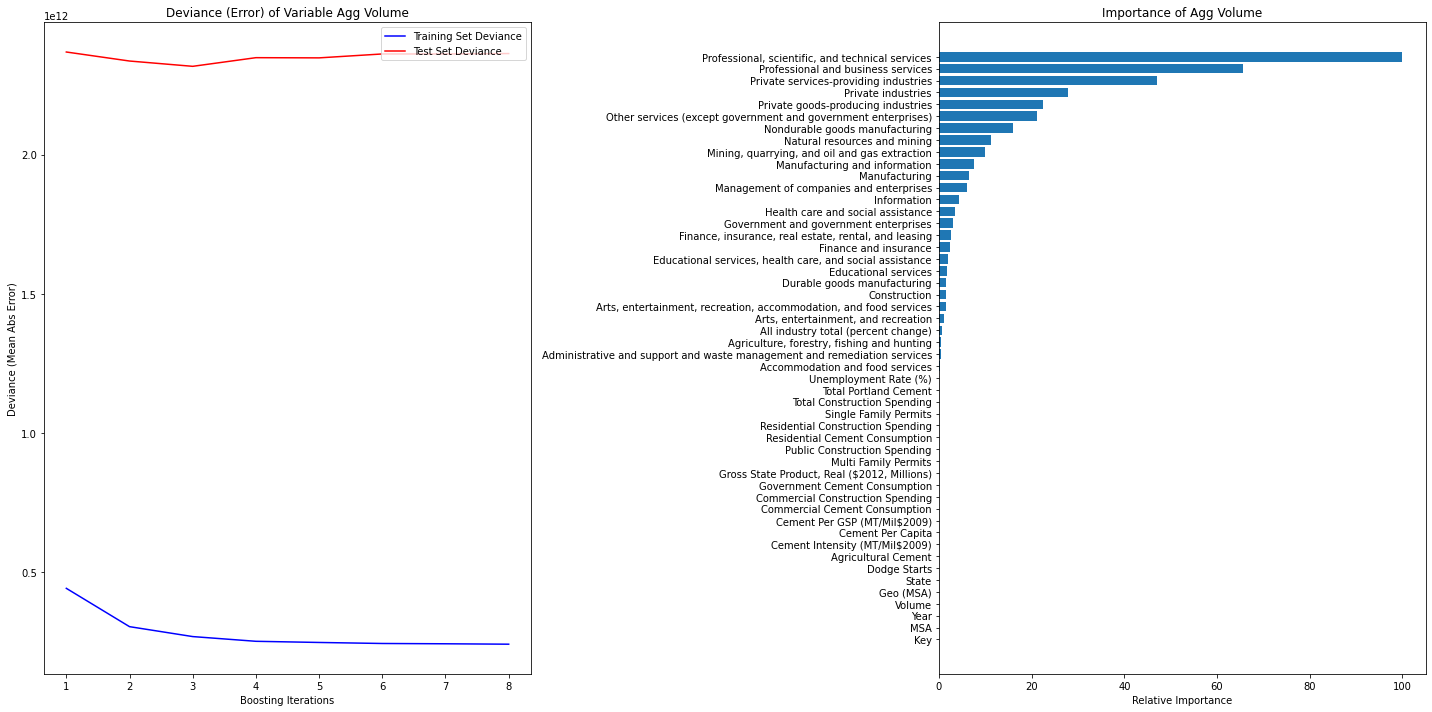

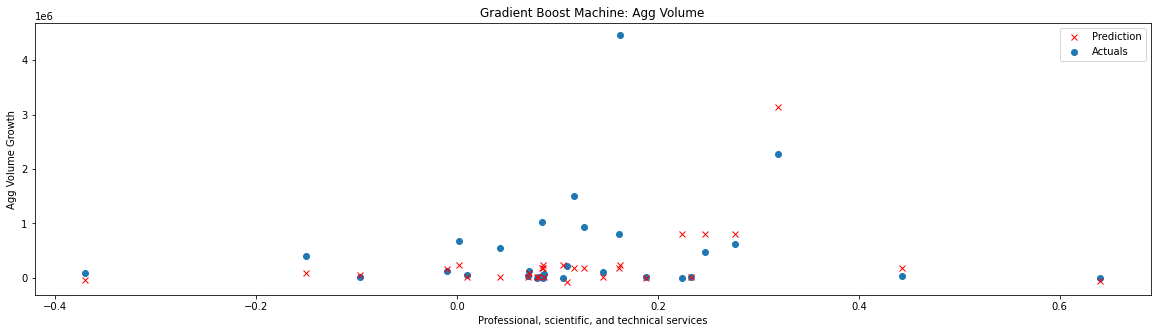

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='mae', init=None,
                          learning_rate=0.9, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=8,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

<Figure size 432x288 with 0 Axes>

In [55]:
#####using statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.discrete import discrete_model
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

#var=['Cement Per Capita','Commercial Construction Spending',"Unemployment Rate (%)",'Gross State Product, Real ($2012, Millions)','Transportation and utilities','Transportation and warehousing',]

#label="Construction"
os.chdir(base_dir) ###CHANGE DIRECTORY OF IMAGES
########################################
params = {
    'n_estimators': 8,
    'max_depth': 3,
    'learning_rate': .9,
    'criterion': 'mae'}
#########################################

  
clf = ensemble.GradientBoostingRegressor(**params)
clf.fit(agg_sales_train[var_agg], agg_sales_train[var_label])
  # compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(agg_sales_val[var_agg])):
    test_score[i] = clf.loss_(agg_sales_val[var_label], y_pred)

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.title('Deviance (Error) of Variable {}'.format("Agg Volume"))
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
        label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
        label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance (Mean Abs Error)')
  #axes=plt.gca()
  #axes.set_ylim([0,1.8])

# #############################################################################
# Plot feature importance
#plt.figure(figsize=(10,5))
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, agg_sales_rand.columns)
plt.xlabel('Relative Importance')
plt.title('Importance of {}'.format("Agg Volume"))
plt.tight_layout()
plt.savefig("Grad_boost_agg_factors.png")



  #'Total Construction Spending',
plt_var='Professional, scientific, and technical services'
plt.figure(figsize=(20, 5))
plt.title('Gradient Boost Machine: {}'.format("Agg Volume"))
plt.scatter(agg_sales_val[plt_var][0:30], agg_sales_val[var_label][0:30],label="Actuals")
plt.plot(agg_sales_val[plt_var][0:30], clf.predict(agg_sales_val[var_agg][0:30]),'x',color='r',label="Prediction")
plt.xlabel(plt_var)
plt.ylabel("{} Growth".format("Agg Volume"))
plt.legend(loc="upper right")
plt.show()
plt.savefig("Grad_boost_agg_prediction.png")
clf.fit(agg_sales_rand[var_agg], agg_sales_rand[var_label])


In [0]:
df_agg_test=df_complete_2006_2024.set_index("Year")
df_agg_test=df_agg_test[df_agg_test.index>2019]

results=clf.predict(df_agg_test[var_agg])

In [57]:
results_final=pd.DataFrame(results,columns=["Estimated Volume"])
col_keep=["Geo (MSA)"]
results=pd.concat([results_final,df_agg_test.reset_index()],axis=1)
results=results.set_index("Year")
results.to_csv("Results.csv")
results.head()
##########################################################################################################

Estimated Volume    Geo (MSA)  ... Utilities  Wholesale trade
Year                                 ...                           
2020      39927.765393  Abilene, TX  ...  0.066294         0.153448
2021      39927.765393  Abilene, TX  ...  0.065417         0.122760
2022       1222.003106  Abilene, TX  ...  0.057511         0.115887
2023       1222.003106  Abilene, TX  ...  0.051560         0.088361
2024       1222.003106  Abilene, TX  ...  0.083090         0.015720

[5 rows x 54 columns]

In [0]:
######################USE FOR REGULAR DEEP LEARNING ARCHITECTURE
agg_sales_rand=pd.read_csv("agg_sales_rand.csv")
agg_sales_train=agg_sales_rand.iloc[:np.int(.8*len(agg_sales_rand))]
agg_sales_val=agg_sales_rand.iloc[np.int(.8*len(agg_sales_rand)):]

df_agg_test=df_complete_2006_2024.set_index("Year")
df_agg_test=df_agg_test[df_agg_test.index>2019]


Train on 246 samples, validate on 62 samples
Epoch 1/30
246/246 [==============================] - 0s 385us/sample - loss: 514288.3425 - mae: 514288.8125 - val_loss: 589092.1210 - val_mae: 589092.6250
Epoch 2/30
246/246 [==============================] - 0s 53us/sample - loss: 514288.3257 - mae: 514288.8125 - val_loss: 589092.1351 - val_mae: 589092.6250
Epoch 3/30
246/246 [==============================] - 0s 63us/sample - loss: 514288.3296 - mae: 514288.8438 - val_loss: 589092.1300 - val_mae: 589092.5625
Epoch 4/30
246/246 [==============================] - 0s 55us/sample - loss: 514288.3415 - mae: 514288.8438 - val_loss: 589092.1421 - val_mae: 589092.6250
Epoch 5/30
246/246 [==============================] - 0s 51us/sample - loss: 514288.3379 - mae: 514288.8438 - val_loss: 589092.1290 - val_mae: 589092.6250
Epoch 6/30
246/246 [==============================] - 0s 57us/sample - loss: 514288.3377 - mae: 514288.8125 - val_loss: 589092.1290 - val_mae: 589092.6250
Epoch 7/30
246/246 [====

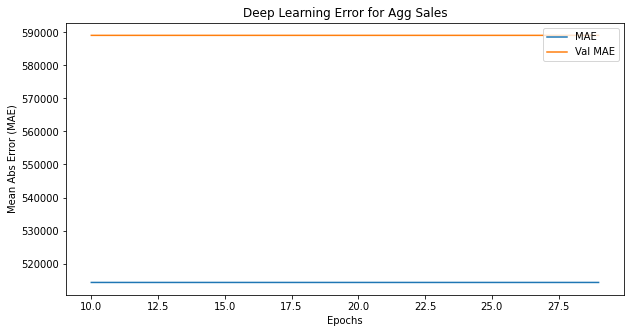

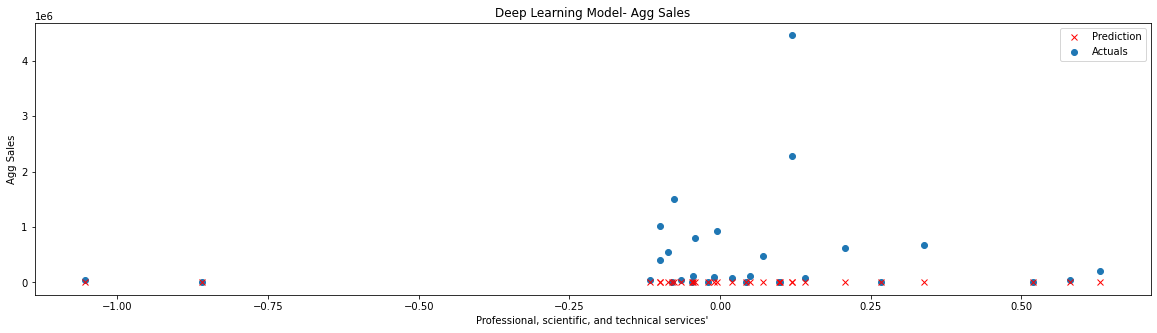

Train on 308 samples
308/308 [==============================] - 0s 49us/sample - loss: 529346.2468 - mae: 529346.6875


In [33]:
os.chdir(base_dir)

epoch=30
model = tf.keras.models.Sequential([
#tf.keras.layers.LSTM(64, input_shape=(16,1),return_sequences=True),
   # tf.keras.layers.LSTM(32, return_sequences=True),
    #tf.keras.layers.GlobalAveragePooling1D(),
  #  tf.keras.layers.Flatten(),
tf.keras.layers.Dense(32,activation="relu",input_shape=(50,)),

tf.keras.layers.Dense(1)
  #tf.keras.layers.Lambda(lambda x: x * 400)
  ])

optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.99)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])



history = model.fit(agg_sales_train[var_agg], agg_sales_train[var_label],epochs=epoch,validation_data=(agg_sales_val[var_agg],agg_sales_val[var_label]))
plt.figure(figsize=(10, 5))
plt.plot(np.arange(10,epoch),history.history["mae"][10:epoch],label="MAE") #######Plot only after epoch #5
plt.plot(np.arange(10,epoch),history.history["val_mae"][10:epoch],label="Val MAE")
plt.legend(loc="upper right")
plt.title("Deep Learning Error for Agg Sales")
plt.xlabel("Epochs")
plt.ylabel("Mean Abs Error (MAE)")
plt.savefig("Deep_learning_factors.png")

    #'Total Construction Spending',
plt_var='Construction'
plt.figure(figsize=(20, 5))
plt.title('Deep Learning Model- Agg Sales')
  #plt.scatter(df_train[plt_var][0:30], df_train[label][0:30],label="Actuals")
 # plt.plot(df_train[plt_var][0:30], model.predict(df_train[var_pca][0:30]),'x',color='r',label="Prediction")
plt.scatter(agg_sales_val[plt_var][0:30], agg_sales_val[var_label][0:30],label="Actuals")
plt.plot(agg_sales_val[plt_var][0:30], model.predict(agg_sales_val[var_agg][0:30]),'x',color='r',label="Prediction")
plt.xlabel("Professional, scientific, and technical services'")
plt.ylabel("Agg Sales")
plt.legend(loc="upper right")
plt.savefig("Deep_learning_agg_predictions.png")
plt.show()
model.fit(agg_sales_rand[var_agg], agg_sales_rand[var_label]) ######## fit the full dataset
mod=model.predict(df_agg_test[var_agg])
 